# Bank GoodCredit wants to predict cred score for current credit card customers.

                                                     ________ Business_Case________

* Bank GoodCredit wants to predict cred score for current credit card 
customers. The cred score will denote a customer’s credit worthiness 
and help the bank in reducing credit default risk.

                                                    _______Dataset_Information______

* Target variable → Bad_label \
0 – Customer has Good credit history \
1 – Customer has Bad credit history (falls into 30 DPD + bucket)

* There are three tables inside database

  1. **Cust_Account**
  2. **Cust_Enquiry**
  3. **Cust_Demographics**

                                                     _______Domain_Analysis_________

* Bank credit analysis involves verifying and determining the creditworthiness of a potential client by looking at their financial state, credit reports, and business cash flows.The goal of credit analysis is to determine the level of default risk that a client presents to the company and the losses that the bank will suffer if the client defaults.The risk level that a client presents determines whether the bank will approve or reject the loan application, and if approved, the amount to be awarded.some of the major table this data has and every tables has there own important columns which are Customers Account, Customers Demographics and Customers Enquiry.

    **Cust_Account :-** This table contains customer’s historical accounts data and payments history.

    **Cust_Demographics :-** This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.

    **Cust_Enquiry :-** Current customer applications with demographic data

* Note that demographics features are renamed as features and obscured in accordance with privacy policies.

* I will explain every necesseary columns when i'll do Data Cleaning.

                                                    ______Pyhon_Implimentation_______

In [1]:
import os # used for stystem version
import mysql.connector # useed for load the dataset
import pandas as pd # used for data cleaning or data analysis
import numpy as np  # used for numeical function
import matplotlib.pyplot as plt # used for data visulization
import seaborn as sns # used for data visulization
import warnings # used for ignore the warnings
warnings.filterwarnings("ignore") # call the warnings

In [2]:
## making connections to database server
connection = mysql.connector.connect(host = "18.136.157.135",
                                    user = "dm_team1",
                                    password = "DM!$Team&279@20!")

In [3]:
## Check the number of databases available on the server
cursor = connection.cursor()
cursor.execute("show databases")
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [4]:
## connecting the database
connection = mysql.connector.connect(host = "18.136.157.135",
                                    user = "dm_team1",
                                    password = "DM!$Team&279@20!",
                                    database = "project_banking")

In [5]:
# getting all tables of bank goodcredi
db_tables = pd.read_sql_query("show tables",connection)
db_tables

,Tables_in_project_banking
0,Cust_Account
1,Cust_Demographics
2,Cust_Enquiry


In [6]:
pd.set_option("display.max_columns",None) # showing all columns

In [7]:
Customer_Account = pd.read_sql_query("select * from Cust_Account",connection) # create variable for Cust_Account
Customer_Account

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,24228,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,0,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,0,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,0,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


In [8]:
Cust_Demography = pd.read_sql_query("select * from Cust_Demographics",connection) # create variable for Cust_Demographics
Cust_Demography

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card 

In [9]:
Cust_Enquiry = pd.read_sql_query("select * from Cust_Enquiry",connection) # create variable for Cust_Enquiry
Cust_Enquiry

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


In [10]:
# Merge the Cust_Account and Cust_Cust_Demographics tables using inner join
data = pd.merge(Customer_Account,Cust_Demography,how="inner",on="customer_no")
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,,N,,0,,17-Jun-16,1,13,,N,Y,N,,Y,2009-0,13,39,121003,0,1,100000,0-0,13,R,,,0000-00-00,0,XXXXX,1,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indi

## Basic Check

In [11]:
data.head() #showing first 5 rows of data set

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,,N,,0,,17-Jun-16,1,13,,N,Y,N,,Y,2009-0,13,39,121003,0,1,100000,0-0,13,R,,,0000-00-00,0,XXXXX,1,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indi

In [12]:
data.tail() #showing last 5 rows of data set

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,24228,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self,Y,1,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,0,Hyderabad,500003,,PAN Card,AOSPPXXXXX,HDFC Bank,,N,,0,,17-Jun-16,1,2,,N,Y,N,,Y,1995-0,2,14,500017,0,1,45800,0-0,2,R,,,0000-00-00,0,80085XXXXX,1,N,0
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,0,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self,Y,1,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,0,Hyderabad,500003,,PAN Card,AOSPPXXXXX,HDFC Bank,,N,,0,,17-Jun-16,1,2,,N,Y,N,,Y,1995-0,2,14,500017,0,1,45800,0-0,2,R,,,0000-00-00,0,80085XXXXX,1,N,0
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,0,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self,Y,1,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,0,Hyderabad,500003,,PAN Card,AOSPPXXXXX,HDFC Bank,,N,,0,,17-Jun-16,1,2,,N,Y,N,,Y,1995-0,2,14,500017,0,1,45800,0-0,2,R,,,0000-00-00,0,80085XXXXX,1,N,0
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,0,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self,Y,1,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,0,Hyderabad,500003,,PAN Card,AOSPPXXXXX,HDFC Bank,,N,,0,,17-Jun-16,1,2,,N,Y,N,,Y,1995-0,2,14,500017,0,1,45800,0-0,2,R,,,0000-00-00,0,80085XXXXX,1,N,0
186328,11-Jun-15,1611,25-May-15,6,1,29-Nov-05,,31-Dec-08,11-Jun-10,26000,0,,"""""""000000000000000000000000000XXXXXXXXXXXXXXX0...",,01-Dec-08,01-Oct-07,,,,,,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,Card Setup,14,138000,,,,Y,TD1,,0,BBOL,H004,,,1,AOSPPXXXXX,10-Feb-76,80085XXXXX,N,@gmail.com,1,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,0,Self

In [13]:
data.describe(include="O") # showing categorical column's information

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
count,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329
unique,197,23896,75,31,4,6246,4511,4840,1877,67555,56425,630,18311,11912,234,235,1380,1456,1476,3,18300,197,297,8,282,263,4,2,2,485,20,20,8,3,17,15,3,365,523,303,13,3,10610,8463,3251,3,722,3,12,11,63,965,53,14,6,3,4,4334,10,12,5664,19,14,13,13,71,937,4473,6,11250,57,19,3,11,660,181,2,5,13,3,3,3,3,9,3,492,28,425,3013,3,4,4334,134,14,3,3,4,63,6,3124,4,3,2
top,16-Nov-15,8516,21-Apr-15,10,1,13-Apr-12,,,31-Jul-15,,0,,"""""""0000000000000000000000000000000000000000000...",,01-Jul-15,01-Jan-15,,,,,,16-Nov-15,23-Oct-15,Platinum Maxima,,,3,Card Setup,14,150000,,,,Y,PM1,,12,SA03,AS03,,,1,AAIPKXXXXX,01-Jan-86,98100XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110059,2010,0,Self,Y,1,1,Private Ltd. Co.,Banking/Financial Services,,0,0,0,0,New Delhi,201301,,PAN Card,XXXXX,,,Y,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2010-0,10,157,110059,0,1,1,0-0,10,R,,,0000-00-00,0,XXXXX,1,N,0
freq,4643,120,5128,100239,177287,514,25487,109075,12654,8875,89872,185453,44979,107824,16747,5640,137477,151047,161496,122436,145276,4643,1478,76014,20401,20401,114716,186196,186196,5985,176212,176212,185958,177801,74160,108074,78255,68912,9382,176325,186121,178862,173,176,1672,164440,112409,156610,109617,110025,87577,7498,13905,167805,92451,160573,133980,61597,61860,97943,52349,52216,60444,53877,182249,70243,15257,103193,176024,940,140986,185406,103897,83203,85133,84043,186196,178905,87577,169092,182223,177801,183578,186217,186161,12813,75473,75473,6646,160573,133980,61597,134163,70243,130100,164759,186132,185399,185462,16349,179451,186166,179716


In [14]:
data.info()#showing information about all columns of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Columns: 103 entries, dt_opened_x to Bad_label
dtypes: object(103)
memory usage: 146.4+ MB


## Basic Data Preprocessing

In [15]:
for column in data: #show all columns
    print(column)

dt_opened_x
customer_no
upload_dt
acct_type
owner_indic
opened_dt
last_paymt_dt
closed_dt
reporting_dt
high_credit_amt
cur_balance_amt
amt_past_due
paymenthistory1
paymenthistory2
paymt_str_dt
paymt_end_dt
creditlimit
cashlimit
rateofinterest
paymentfrequency
actualpaymentamount
dt_opened_y
entry_time
feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
feature_9
feature_10
feature_11
feature_12
feature_13
feature_14
feature_15
feature_16
feature_17
feature_18
feature_19
feature_20
feature_21
feature_22
feature_23
feature_24
feature_25
feature_26
feature_27
feature_28
feature_29
feature_30
feature_31
feature_32
feature_33
feature_34
feature_35
feature_36
feature_37
feature_38
feature_39
feature_40
feature_41
feature_42
feature_43
feature_44
feature_45
feature_46
feature_47
feature_48
feature_49
feature_50
feature_51
feature_52
feature_53
feature_54
feature_55
feature_56
feature_57
feature_58
feature_59
feature_60
feature_61
feature_62
feature_63
feature_64
fe

In [16]:
# show all columns and it's unique values and unique value numbers
for column in data:
    print(f"Unique values in {column}:")
    print(data[column].unique())
    print("\n")
    print(len(data[column].unique()))
    print("_______________________________________________________________________________________________________")
    print("\n")  # Adds a newline for better readability

Unique values in dt_opened_x:
['10-Nov-15' '20-Jul-15' '02-Nov-15' '16-Nov-15' '27-Aug-15' '05-May-15'
 '29-Dec-15' '18-Dec-15' '07-May-15' '06-Nov-15' '05-Nov-15' '03-Oct-15'
 '21-May-15' '28-Nov-15' '26-Oct-15' '04-Aug-15' '09-Oct-15' '30-Nov-15'
 '27-Oct-15' '30-Jun-15' '29-Sep-15' '19-Oct-15' '21-Jul-15' '14-Jul-15'
 '27-Jul-15' '04-Nov-15' '06-Jun-15' '22-Jul-15' '16-Sep-15' '15-Sep-15'
 '24-Sep-15' '28-Jul-15' '26-Nov-15' '26-Dec-15' '15-Jul-15' '14-Sep-15'
 '15-Oct-15' '30-Dec-15' '24-Dec-15' '25-Sep-15' '26-Aug-15' '10-Dec-15'
 '25-Aug-15' '25-Jul-15' '25-May-15' '21-Oct-15' '17-Dec-15' '05-Aug-15'
 '01-Oct-15' '29-Oct-15' '03-Sep-15' '13-May-15' '11-Aug-15' '07-Sep-15'
 '08-Sep-15' '03-Nov-15' '20-May-15' '28-May-15' '07-Jul-15' '02-Jun-15'
 '29-Jul-15' '07-Dec-15' '15-May-15' '06-Jul-15' '17-Jul-15' '08-Jun-15'
 '17-Oct-15' '21-Nov-15' '03-Aug-15' '26-Jun-15' '21-Dec-15' '17-Nov-15'
 '24-Nov-15' '27-May-15' '24-Apr-15' '13-Oct-15' '12-Oct-15' '23-Jun-15'
 '18-Nov-15' '22-Sep-

In [17]:
def find_columns_with_nulls(data, threshold=0.4):
    drop_column = []
    data = data.replace("", float("NaN"))  # Treat empty strings as NaN
    
    for column in data.columns:
        if data[column].isnull().mean() > threshold:  # Check if nulls > 40%
            drop_column.append(column)
    
    return drop_column

# Example usage
columns_to_drop = find_columns_with_nulls(data, 0.4)
print("Columns to drop:", columns_to_drop)


Columns to drop: ['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73', 'feature_74']


In [18]:
print(len(columns_to_drop)) #shoe length 

23


In [19]:
#drop columns
data1 = data.drop(['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73', 'feature_74'],axis=1)
data1

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymenthistory1,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_11,feature_12,feature_14,feature_15,feature_16,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_47,feature_50,feature_52,feature_54,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,30-Sep-15,20900,0,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",01-Sep-15,01-Jul-14,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,Y,PM1,,SA05,MA01,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,PAN Card,ASWPKXXXXX,N,0,17-Jun-16,1,10,N,Y,N,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,0000-00-00,0,88009XXXXX,1,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,03-Oct-15,16201,10390,"""""""0000000000000000000000000000000000000000000...",01-Oct-15,01-Nov-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,Y,PM1,,SA05,MA01,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,PAN Card,ASWPKXXXXX,N,0,17-Jun-16,1,10,N,Y,N,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,0000-00-00,0,88009XXXXX,1,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,30-Sep-15,41028,34420,"""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,Y,PM1,,SA05,MA01,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,PAN Card,ASWPKXXXXX,N,0,17-Jun-16,1,10,N,Y,N,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,0000-00-00,0,88009XXXXX,1,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,31-Jan-09,93473,0,"""""""1200900600600600300000000000000000000000000...",01-Jul-07,01-Feb-06,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,Y,PD1,12,SA35,S001,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,PAN Card,AHRPMXXXXX,N,0,17-Jun-16,1,13,N,Y,N,Y,2009-0,13,39,121003,0,1,100000,0-0,13,R,0000-00-00,0,XXXXX,1,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,31-May-15,20250,13500,"""""""000000000000000""""""",01-May-15,01-Jan-15,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,Y,PD1,12,SA35,S001,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,PAN Card,AHRPMXXXXX,N,0,17-Jun-16,1,13,N,Y,N,Y,2009-0,13,39,121003,0,1,100000,0-0,13,R,0000-00-00,0,XXXXX,1,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,30-Apr-15,24228,24228,"""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,11-Jun-15,21-May-1

In [20]:
#getting less variations columns
def find_low_variation_columns(data1, threshold=0.3):
    low_variation_columns = []
    
    # Check each column for variation
    for column in data1:
        top_value_percentage = data1[column].value_counts(normalize=True).iloc[0]
        
        # If the top value appears more than (1 - threshold) times, consider low variation
        if top_value_percentage > (1 - threshold):
            low_variation_columns.append(column)
    
    return low_variation_columns

# Usage example:
columns_with_low_variation = find_low_variation_columns(data1)
print("Columns with low variation:", columns_with_low_variation)


Columns with low variation: ['owner_indic', 'feature_5', 'feature_6', 'feature_11', 'feature_19', 'feature_23', 'feature_25', 'feature_31', 'feature_33', 'feature_34', 'feature_42', 'feature_46', 'feature_54', 'feature_55', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 'feature_67', 'feature_68', 'feature_70', 'feature_75', 'feature_76', 'feature_78', 'feature_79', 'Bad_label']


In [21]:
print(len(columns_with_low_variation)) #show length

26


In [22]:
# drop the columns
data2 = data1.drop(["paymenthistory1",'owner_indic', 'feature_5', "feature_63",'feature_6', 'feature_11', 'feature_19', 'feature_23', 'feature_25', 'feature_31', 'feature_33', 'feature_34', 'feature_42', 'feature_46', 'feature_54', 'feature_55', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 'feature_67', 'feature_68', 'feature_70', 'feature_75', 'feature_76', 'feature_78', 'feature_79'],axis=1)
data2

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_20,feature_21,feature_22,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_47,feature_50,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71,feature_72,feature_77,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,09-Jun-13,30-Jun-14,30-Sep-15,20900,0,01-Sep-15,01-Jul-14,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,56000,PM1,,SA05,MA01,ASWPKXXXXX,15-Jun-84,88009XXXXX,@GMAIL.COM,0,MBA/MMS,New Delhi,110059,2006,Paren,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,Gurgaon,122001,ASWPKXXXXX,N,0,10,10,157,110059,35000,13,R,88009XXXXX,1
1,10-Nov-15,12265,20-Oct-15,10,25-May-12,06-Sep-15,03-Oct-15,16201,10390,01-Oct-15,01-Nov-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,56000,PM1,,SA05,MA01,ASWPKXXXXX,15-Jun-84,88009XXXXX,@GMAIL.COM,0,MBA/MMS,New Delhi,110059,2006,Paren,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,Gurgaon,122001,ASWPKXXXXX,N,0,10,10,157,110059,35000,13,R,88009XXXXX,1
2,10-Nov-15,12265,20-Oct-15,10,22-Mar-12,31-Aug-15,30-Sep-15,41028,34420,01-Sep-15,01-Oct-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,56000,PM1,,SA05,MA01,ASWPKXXXXX,15-Jun-84,88009XXXXX,@GMAIL.COM,0,MBA/MMS,New Delhi,110059,2006,Paren,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,Gurgaon,122001,ASWPKXXXXX,N,0,10,10,157,110059,35000,13,R,88009XXXXX,1
3,20-Jul-15,15606,09-Jul-15,10,13-Jan-06,,31-Jan-09,93473,0,01-Jul-07,01-Feb-06,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,125000,PD1,12,SA35,S001,AHRPMXXXXX,20-Jun-80,88009XXXXX,@YAHOO.COM,2,Post-Graduate,Faridabad,121003,2009,Self,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,Faridabad,121003,AHRPMXXXXX,N,0,13,13,39,121003,100000,13,R,XXXXX,1
4,20-Jul-15,15606,09-Jul-15,6,18-Jan-15,05-May-15,31-May-15,20250,13500,01-May-15,01-Jan-15,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,125000,PD1,12,SA35,S001,AHRPMXXXXX,20-Jun-80,88009XXXXX,@YAHOO.COM,2,Post-Graduate,Faridabad,121003,2009,Self,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,Faridabad,121003,AHRPMXXXXX,N,0,13,13,39,121003,100000,13,R,XXXXX,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,02-May-07,21-Apr-15,30-Apr-15,24228,24228,01-Apr-15,01-May-12,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,138000,TD1,0,BBOL,H004,AOSPPXXXXX,10-Feb-76,80085XXXXX,@gmail.com,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,Self,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,Hyderabad,500003,AOSPPXXXXX,N,0,2,2,14,500017,45800,2,R,80085XXXXX,0
186325,11-Jun-15,1611,25-May-15,10,11-Apr-07,22-Jun-09,30-Apr-15,19584,0,01-Apr-10,01-Aug-09,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,138000,TD1,0,BBOL,H004,AOSPPXXXXX,10-Feb-76,80085XXXXX,@gmail.com,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,Self,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,Hyderabad,500003,AOSPPXXXXX,N,0,2,2,14,500017,45800,2,R,80085XXXXX,0
186326,11-Jun-15,1611,25-May-15,10,20-Nov-06,,31-Dec-13,50844,0,01-Apr-12,01-Dec-10,11-Jun-15,21-May-15,Titanium Deligh,21-May-15,746,3,138000,TD1,0,BBOL,H004,AOSPPXXXXX,10-Feb-76,80085XXXXX,@gmail.com,3,Post-Graduate,Hyderabad / Secunderabad,500017,1995,Self,45800,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999,0,11,Hyderabad,500003,AOSPPXXXXX,N,0,2,2,14,500017,45800,2,R,80085XXXXX,0
186327,11-Jun-15,1611,25-May-15,10,17-Oct-06,,15-Apr-15,35587,0,01-Mar-12,01-Apr-09

In [23]:
for columns_with_low_variation in data2:
    print(f"Unique values in {columns_with_low_variation}:")
    print(data2[columns_with_low_variation].value_counts())
    print("\n")
    print(len(data2[columns_with_low_variation].value_counts()))
    print("_______________________________________________________________________________________________________")
    print("\n")  # Adds a newline for better readability

Unique values in dt_opened_x:
dt_opened_x
16-Nov-15    4643
21-Dec-15    2395
18-Aug-15    2158
13-Oct-15    2062
26-Oct-15    2004
             ... 
22-Apr-15      36
18-Apr-15      18
24-Oct-15       8
16-Apr-15       2
21-Apr-15       2
Name: count, Length: 197, dtype: int64


197
_______________________________________________________________________________________________________


Unique values in customer_no:
customer_no
8516     120
10076    112
6391      88
8872      77
8814      76
        ... 
20548      1
21356      1
6941       1
362        1
23434      1
Name: count, Length: 23896, dtype: int64


23896
_______________________________________________________________________________________________________


Unique values in upload_dt:
upload_dt
21-Apr-15    5128
23-Oct-15    3591
16-Jul-15    3512
28-Sep-15    3507
20-Oct-15    3486
             ... 
17-Dec-15    1154
24-Dec-15     334
28-Dec-15     106
31-Dec-15      53
29-Nov-15      36
Name: count, Length: 75, dtype: i

* Here High variance column is acct_type, high_credit_amt, cur_balance_amt, feature_2, feature_3, feature_4, feature_14, feature_15, feature_24, feature_27, feature_38, feature_39, feature_52,

In [24]:
# show all columns and it's unique values and unique value numbers
for columns_with_low_variation in data2:
    print(f"Unique values in {columns_with_low_variation}:")
    print(data2[columns_with_low_variation].unique())
    print("\n")
    print(len(data2[columns_with_low_variation].unique()))
    print("_______________________________________________________________________________________________________")
    print("\n")  # Adds a newline for better readability

Unique values in dt_opened_x:
['10-Nov-15' '20-Jul-15' '02-Nov-15' '16-Nov-15' '27-Aug-15' '05-May-15'
 '29-Dec-15' '18-Dec-15' '07-May-15' '06-Nov-15' '05-Nov-15' '03-Oct-15'
 '21-May-15' '28-Nov-15' '26-Oct-15' '04-Aug-15' '09-Oct-15' '30-Nov-15'
 '27-Oct-15' '30-Jun-15' '29-Sep-15' '19-Oct-15' '21-Jul-15' '14-Jul-15'
 '27-Jul-15' '04-Nov-15' '06-Jun-15' '22-Jul-15' '16-Sep-15' '15-Sep-15'
 '24-Sep-15' '28-Jul-15' '26-Nov-15' '26-Dec-15' '15-Jul-15' '14-Sep-15'
 '15-Oct-15' '30-Dec-15' '24-Dec-15' '25-Sep-15' '26-Aug-15' '10-Dec-15'
 '25-Aug-15' '25-Jul-15' '25-May-15' '21-Oct-15' '17-Dec-15' '05-Aug-15'
 '01-Oct-15' '29-Oct-15' '03-Sep-15' '13-May-15' '11-Aug-15' '07-Sep-15'
 '08-Sep-15' '03-Nov-15' '20-May-15' '28-May-15' '07-Jul-15' '02-Jun-15'
 '29-Jul-15' '07-Dec-15' '15-May-15' '06-Jul-15' '17-Jul-15' '08-Jun-15'
 '17-Oct-15' '21-Nov-15' '03-Aug-15' '26-Jun-15' '21-Dec-15' '17-Nov-15'
 '24-Nov-15' '27-May-15' '24-Apr-15' '13-Oct-15' '12-Oct-15' '23-Jun-15'
 '18-Nov-15' '22-Sep-

In [25]:
data2.info() #showing information about all columns of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   dt_opened_x      186329 non-null  object
 1   customer_no      186329 non-null  object
 2   upload_dt        186329 non-null  object
 3   acct_type        186329 non-null  object
 4   opened_dt        186329 non-null  object
 5   last_paymt_dt    186329 non-null  object
 6   reporting_dt     186329 non-null  object
 7   high_credit_amt  186329 non-null  object
 8   cur_balance_amt  186329 non-null  object
 9   paymt_str_dt     186329 non-null  object
 10  paymt_end_dt     186329 non-null  object
 11  dt_opened_y      186329 non-null  object
 12  entry_time       186329 non-null  object
 13  feature_1        186329 non-null  object
 14  feature_2        186329 non-null  object
 15  feature_3        186329 non-null  object
 16  feature_4        186329 non-null  object
 17  feature_7 

In [26]:
data2.head(3) #showing first 5 rows of data set

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_20,feature_21,feature_22,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_47,feature_50,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71,feature_72,feature_77,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,09-Jun-13,30-Jun-14,30-Sep-15,20900,0,01-Sep-15,01-Jul-14,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,56000,PM1,,SA05,MA01,ASWPKXXXXX,15-Jun-84,88009XXXXX,@GMAIL.COM,0,MBA/MMS,New Delhi,110059,2006,Paren,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,Gurgaon,122001,ASWPKXXXXX,N,0,10,10,157,110059,35000,13,R,88009XXXXX,1
1,10-Nov-15,12265,20-Oct-15,10,25-May-12,06-Sep-15,03-Oct-15,16201,10390,01-Oct-15,01-Nov-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,56000,PM1,,SA05,MA01,ASWPKXXXXX,15-Jun-84,88009XXXXX,@GMAIL.COM,0,MBA/MMS,New Delhi,110059,2006,Paren,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,Gurgaon,122001,ASWPKXXXXX,N,0,10,10,157,110059,35000,13,R,88009XXXXX,1
2,10-Nov-15,12265,20-Oct-15,10,22-Mar-12,31-Aug-15,30-Sep-15,41028,34420,01-Sep-15,01-Oct-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,56000,PM1,,SA05,MA01,ASWPKXXXXX,15-Jun-84,88009XXXXX,@GMAIL.COM,0,MBA/MMS,New Delhi,110059,2006,Paren,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,Gurgaon,122001,ASWPKXXXXX,N,0,10,10,157,110059,35000,13,R,88009XXXXX,1


In [27]:

def replace_empty_with_nan(data, columns):
    # Replace empty strings with NaN for the specified columns
    data[columns] = data[columns].replace("", np.nan)

# Example usage:
columns_to_check = [
    'dt_opened_x', 'customer_no', 'upload_dt', 'acct_type', 'opened_dt',
    'last_paymt_dt', 'reporting_dt', 'high_credit_amt', 'cur_balance_amt',
    'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y', 'entry_time',
    'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_7',
    'feature_12', 'feature_14', 'feature_15', 'feature_16', 'feature_20',
    'feature_21', 'feature_22', 'feature_24', 'feature_26', 'feature_27',
    'feature_28', 'feature_29', 'feature_30', 'feature_32', 'feature_35',
    'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
    'feature_41', 'feature_43', 'feature_44', 'feature_47', 'feature_50',
    'feature_52', 'feature_56','feature_64', 'feature_65',
    'feature_66', 'feature_69', 'feature_71', 'feature_72', 'feature_77',
]

# Assuming 'data2' is your DataFrame
replace_empty_with_nan(data2, columns_to_check)

In [28]:
#change the data type 

data2["dt_opened_x"] = data2["dt_opened_x"].astype("datetime64[ns]")
data2["customer_no"] = data2["customer_no"].astype("int64")
data2["upload_dt"] = data2["upload_dt"].astype("datetime64[ns]")
data2["acct_type"] = data2["acct_type"].astype("int64")
data2["opened_dt"] = data2["opened_dt"].astype("datetime64[ns]")
data2["last_paymt_dt"] = data2["last_paymt_dt"].astype("datetime64[ns]")
data2["reporting_dt"] = data2["reporting_dt"].astype("datetime64[ns]")
data2["high_credit_amt"] = data2["high_credit_amt"].astype("float")
data2["cur_balance_amt"] = data2["cur_balance_amt"].astype("int64")
data2["paymt_str_dt"] = data2["paymt_str_dt"].astype("datetime64[ns]")
data2["paymt_end_dt"] = data2["paymt_end_dt"].astype("datetime64[ns]")
data2["dt_opened_y"] = data2["dt_opened_y"].astype("datetime64[ns]")
data2["entry_time"] = data2["entry_time"].astype("datetime64[ns]")
data2["feature_2"] = data2["feature_2"].astype("datetime64[ns]")
data2["feature_3"] = data2["feature_3"].astype("float")
data2["feature_4"] = data2["feature_4"].astype("float")
data2["feature_7"] = data2["feature_7"].astype("float")
data2["feature_21"] = data2["feature_21"].astype("datetime64[ns]")
data2["feature_26"] = data2["feature_26"].astype("float")
data2["feature_29"] = data2["feature_29"].astype("float")
data2["feature_30"] = data2["feature_30"].astype("float")
data2["feature_35"] = data2["feature_35"].astype("float")
data2["feature_39"] = data2["feature_39"].astype("float")
data2["feature_40"] = data2["feature_40"].astype("float")
data2["feature_41"] = data2["feature_41"].astype("float")
data2["feature_44"] = data2["feature_44"].astype("float")
data2["feature_52"] = data2["feature_52"].astype("float")
data2["feature_56"] = data2["feature_56"].astype("float")
data2["feature_64"] = data2["feature_64"].astype("float")
data2["feature_65"] = data2["feature_65"].astype("float")
data2["feature_66"] = data2["feature_66"].astype("float")
data2["feature_69"] = data2["feature_69"].astype("float")
data2["feature_71"] = data2["feature_71"].astype("float")

## Feature Engineering

### 1. Data Preprocessing

In [29]:
data2.isnull().sum() # show null values

dt_opened_x            0
customer_no            0
upload_dt              0
acct_type              0
opened_dt            455
last_paymt_dt      25487
reporting_dt           0
high_credit_amt     8875
cur_balance_amt        0
paymt_str_dt           1
paymt_end_dt           1
dt_opened_y            0
entry_time           133
feature_1            133
feature_2          20401
feature_3          20401
feature_4            133
feature_7            133
feature_12           133
feature_14         61388
feature_15           212
feature_16           259
feature_20             0
feature_21           133
feature_22             0
feature_24          5524
feature_26           133
feature_27         30236
feature_28           133
feature_29           133
feature_30           133
feature_32           133
feature_35           133
feature_36         52349
feature_37         52349
feature_38         52349
feature_39           133
feature_40           133
feature_41           133
feature_43           133


In [30]:
for column in data2: #show all columns
    print(column)

dt_opened_x
customer_no
upload_dt
acct_type
opened_dt
last_paymt_dt
reporting_dt
high_credit_amt
cur_balance_amt
paymt_str_dt
paymt_end_dt
dt_opened_y
entry_time
feature_1
feature_2
feature_3
feature_4
feature_7
feature_12
feature_14
feature_15
feature_16
feature_20
feature_21
feature_22
feature_24
feature_26
feature_27
feature_28
feature_29
feature_30
feature_32
feature_35
feature_36
feature_37
feature_38
feature_39
feature_40
feature_41
feature_43
feature_44
feature_47
feature_50
feature_52
feature_56
feature_64
feature_65
feature_66
feature_69
feature_71
feature_72
feature_77
Bad_label


In [31]:
data2.head()  #showing first 5 rows of data set

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_20,feature_21,feature_22,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_47,feature_50,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71,feature_72,feature_77,Bad_label
0,2015-11-10,12265,2015-10-20,6,2013-06-09,2014-06-30,2015-09-30,20900.0,0,2015-09-01,2014-07-01,2015-11-10,2015-10-15,Platinum Maxima,2015-10-15,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,ASWPKXXXXX,1984-06-15,88009XXXXX,@GMAIL.COM,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,ASWPKXXXXX,N,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,R,88009XXXXX,1
1,2015-11-10,12265,2015-10-20,10,2012-05-25,2015-09-06,2015-10-03,16201.0,10390,2015-10-01,2012-11-01,2015-11-10,2015-10-15,Platinum Maxima,2015-10-15,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,ASWPKXXXXX,1984-06-15,88009XXXXX,@GMAIL.COM,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,ASWPKXXXXX,N,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,R,88009XXXXX,1
2,2015-11-10,12265,2015-10-20,10,2012-03-22,2015-08-31,2015-09-30,41028.0,34420,2015-09-01,2012-10-01,2015-11-10,2015-10-15,Platinum Maxima,2015-10-15,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,ASWPKXXXXX,1984-06-15,88009XXXXX,@GMAIL.COM,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,ASWPKXXXXX,N,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,R,88009XXXXX,1
3,2015-07-20,15606,2015-07-09,10,2006-01-13,NaT,2009-01-31,93473.0,0,2007-07-01,2006-02-01,2015-07-20,2015-07-06,Platinum Deligh,2015-07-06,687.0,3.0,125000.0,PD1,12,SA35,S001,AHRPMXXXXX,1980-06-20,88009XXXXX,@YAHOO.COM,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,Faridabad,121003.0,AHRPMXXXXX,N,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,R,XXXXX,1
4,2015-07-20,15606,2015-07-09,6,2015-01-18,2015-05-05,2015-05-31,20250.0,13500,2015-05-01,2015-01-01,2015-07-20,2015-07-06,Platinum Deligh,2015-07-06,687.0,3.0,125000.0,PD1,12,SA35,S001,AHRPMXXXXX,1980-06-20,88009XXXXX,@YAHOO.COM,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,Faridabad,121003.0,AHRPMXXXXX,N,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,R,XXXXX,1


In [32]:
data2.opened_dt.mode() #getting mode

0   2012-04-13
Name: opened_dt, dtype: datetime64[ns]

In [33]:
data2.loc[data2["opened_dt"].isnull(),"opened_dt"] = "2012-04-13" # replace null value 

In [34]:
data2.last_paymt_dt.mode() # getting mode

0   2015-03-05
Name: last_paymt_dt, dtype: datetime64[ns]

In [35]:
data2.loc[data2["last_paymt_dt"].isnull(),"last_paymt_dt"] = "2015-03-05" # replace null value

In [36]:
data2.high_credit_amt.median()  # getting median

45223.5

In [37]:
data2.loc[data2["high_credit_amt"].isnull(),"high_credit_amt"] = 45223.5 # replace null value

In [38]:
data2.paymt_str_dt.mode() # getting mode

0   2015-07-01
Name: paymt_str_dt, dtype: datetime64[ns]

In [39]:
data2.loc[data2["paymt_str_dt"].isnull(),"paymt_str_dt"] = "2015-07-01" # replace null value

In [40]:
data2.paymt_end_dt.mode() # getting mode

0   2015-01-01
Name: paymt_end_dt, dtype: datetime64[ns]

In [41]:
data2.loc[data2["paymt_end_dt"].isnull(),"paymt_end_dt"] = "2015-01-01" # replace null value

In [42]:
data2.entry_time.mode() # getting mode

0   2015-10-23
Name: entry_time, dtype: datetime64[ns]

In [43]:
data2.loc[data2["entry_time"].isnull(),"entry_time"] = "2015-10-23" # replace null value

In [44]:
data2.feature_1.mode() # getting mode

0    Platinum Maxima
Name: feature_1, dtype: object

In [45]:
data2.loc[data2["feature_1"].isnull(),"feature_1"] = "Platinum Maxima" # replace null value

In [46]:
data2.feature_2.mode() # getting mode

0   2015-08-19
Name: feature_2, dtype: datetime64[ns]

In [47]:
data2.loc[data2["feature_2"].isnull(),"feature_2"] = "2015-08-19" # replace null value

In [48]:
data2.feature_3.median()# getting median

724.0

In [49]:
data2.loc[data2["feature_3"].isnull(),"feature_3"] = 724.0 # replace null value

In [50]:
data2.feature_4.median() # getting median

3.0

In [51]:
data2.loc[data2["feature_4"].isnull(),"feature_4"] = 3.0 # replace null value

In [52]:
data2.feature_7.median() # getting median

114000.0

In [53]:
data2.loc[data2["feature_7"].isnull(),"feature_7"] = 114000.0 # replace null value

In [54]:
data2.feature_12.mode() # getting mode

0    PM1
Name: feature_12, dtype: object

In [55]:
data2.loc[data2["feature_12"].isnull(),"feature_12"] = "PM1" # replace null value

In [56]:
data2.feature_14.median() # getting median

12.0

In [57]:
data2.loc[data2["feature_14"].isnull(),"feature_14"] = 12.0 # replace null value

In [58]:
data2.feature_15.mode() # getting mode

0    SA03
Name: feature_15, dtype: object

In [59]:
data2.loc[data2["feature_15"].isnull(),"feature_15"] = "SA03" # replace null value

In [60]:
data2.feature_16.mode() # getting mode

0    AS03
Name: feature_16, dtype: object

In [61]:
data2.loc[data2["feature_16"].isnull(),"feature_16"] = "AS03" # replace null value

In [62]:
data2.feature_21.mode() # getting mode

0   1986-01-01
Name: feature_21, dtype: datetime64[ns]

In [63]:
data2.loc[data2["feature_21"].isnull(),"feature_21"] = "1986-01-01" # replace null value

In [64]:
data2.feature_24.mode() # getting mode

0    @GMAIL.COM
Name: feature_24, dtype: object

In [65]:
data2.loc[data2["feature_24"].isnull(),"feature_24"] = "@GMAIL.COM" # replace null value

In [66]:
data2.feature_26.mode() # getting mode

0    0.0
Name: feature_26, dtype: float64

In [67]:
data2.loc[data2["feature_26"].isnull(),"feature_26"] = 0.0 # replace null value

In [68]:
data2.feature_27.mode() # getting mode

0    Graduate
Name: feature_27, dtype: object

In [69]:
data2.loc[data2["feature_27"].isnull(),"feature_27"] = "Graduate" # replace null value

In [70]:
data2.feature_28.mode() # getting mode

0    New Delhi
Name: feature_28, dtype: object

In [71]:
data2.loc[data2["feature_28"].isnull(),"feature_28"] = "New Delhi" # replace null value

In [72]:
data2.feature_29.median() # getting median

121004.0

In [73]:
data2.loc[data2["feature_29"].isnull(),"feature_29"] = 121004.0 # replace null value

In [74]:
data2.feature_30.median() # getting median

2005.0

In [75]:
data2.loc[data2["feature_30"].isnull(),"feature_30"] = 2005.0 # replace null value

In [76]:
data2.feature_32.mode() # getting mode

0    Self
Name: feature_32, dtype: object

In [77]:
data2.loc[data2["feature_32"].isnull(),"feature_32"] = "Self" # replace null value

In [78]:
data2.feature_35.median() # getting median

35000.0

In [79]:
data2.loc[data2["feature_35"].isnull(),"feature_35"] = 35000.0 # replace null value

In [80]:
data2.feature_36.mode() # getting mode

0    Private Ltd. Co.
Name: feature_36, dtype: object

In [81]:
data2.loc[data2["feature_36"].isnull(),"feature_36"] = "Private Ltd. Co." # replace null value

In [82]:
data2.feature_37.mode() # getting mode

0    Banking/Financial Services
Name: feature_37, dtype: object

In [83]:
data2.loc[data2["feature_37"].isnull(),"feature_37"] = "Banking/Financial Services" # replace null value

In [84]:
data2.feature_38.mode() # getting mode

0    MANAGER
Name: feature_38, dtype: object

In [85]:
data2.loc[data2["feature_38"].isnull(),"feature_38"] = "MANAGER" # replace null value

In [86]:
data2.feature_39.median() # getting median

2008.0

In [87]:
data2.loc[data2["feature_39"].isnull(),"feature_39"] = 2008.0 # replace null value

In [88]:
data2.feature_40.median() # getting median

1.0

In [89]:
data2.loc[data2["feature_40"].isnull(),"feature_40"] = 1.0 # replace null value

In [90]:
data2.feature_41.median()# getting mode

7.0

In [91]:
data2.loc[data2["feature_41"].isnull(),"feature_41"] = 7.0 # replace null value

In [92]:
data2.feature_43.mode()# getting mode

0    New Delhi
Name: feature_43, dtype: object

In [93]:
data2.loc[data2["feature_43"].isnull(),"feature_43"] = "New Delhi" # replace null value

In [94]:
data2.feature_44.median() # getting median

122002.0

In [95]:
data2.loc[data2["feature_44"].isnull(),"feature_44"] = 122002.0 # replace null value

In [96]:
data2.feature_50.mode()# getting mode

0    Y
Name: feature_50, dtype: object

In [97]:
data2.loc[data2["feature_50"].isnull(),"feature_50"] = "Y" # replace null value

In [98]:
data2.feature_52.median() # getting median

55000.0

In [99]:
data2.loc[data2["feature_52"].isnull(),"feature_52"] = 55000.0 # replace null value

In [100]:
data2.feature_56.median() # getting median

10.0

In [101]:
data2.loc[data2["feature_56"].isnull(),"feature_56"] = 10.0 # replace null value

In [102]:
data2.feature_64.median() # getting median

10.0

In [103]:
data2.loc[data2["feature_64"].isnull(),"feature_64"] = 10.0 # replace null value

In [104]:
data2.feature_65.median() # getting median

157.0

In [105]:
data2.loc[data2["feature_65"].isnull(),"feature_65"] = 157.0 # replace null value

In [106]:
data2.feature_66.median() # getting median

201001.0

In [107]:
data2.loc[data2["feature_66"].isnull(),"feature_66"] = 201001.0 # replace null value

In [108]:
data2.feature_69.median() # getting median

35000.0

In [109]:
data2.loc[data2["feature_69"].isnull(),"feature_69"] = 35000.0 # replace null value

In [110]:
data2.feature_71.median() # getting median

10.0

In [111]:
data2.loc[data2["feature_71"].isnull(),"feature_71"] = 10.0 # replace null value

In [112]:
data2.feature_72.mode() # getting mode

0    R
Name: feature_72, dtype: object

In [113]:
data2.loc[data2["feature_72"].isnull(),"feature_72"] = "R" # replace null value

In [114]:
data2.isnull().sum() # show null values

dt_opened_x        0
customer_no        0
upload_dt          0
acct_type          0
opened_dt          0
last_paymt_dt      0
reporting_dt       0
high_credit_amt    0
cur_balance_amt    0
paymt_str_dt       0
paymt_end_dt       0
dt_opened_y        0
entry_time         0
feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_7          0
feature_12         0
feature_14         0
feature_15         0
feature_16         0
feature_20         0
feature_21         0
feature_22         0
feature_24         0
feature_26         0
feature_27         0
feature_28         0
feature_29         0
feature_30         0
feature_32         0
feature_35         0
feature_36         0
feature_37         0
feature_38         0
feature_39         0
feature_40         0
feature_41         0
feature_43         0
feature_44         0
feature_47         0
feature_50         0
feature_52         0
feature_56         0
feature_64         0
feature_65         0
feature_66   

In [115]:
data2.info() #showing information about all columns of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   dt_opened_x      186329 non-null  datetime64[ns]
 1   customer_no      186329 non-null  int64         
 2   upload_dt        186329 non-null  datetime64[ns]
 3   acct_type        186329 non-null  int64         
 4   opened_dt        186329 non-null  datetime64[ns]
 5   last_paymt_dt    186329 non-null  datetime64[ns]
 6   reporting_dt     186329 non-null  datetime64[ns]
 7   high_credit_amt  186329 non-null  float64       
 8   cur_balance_amt  186329 non-null  int64         
 9   paymt_str_dt     186329 non-null  datetime64[ns]
 10  paymt_end_dt     186329 non-null  datetime64[ns]
 11  dt_opened_y      186329 non-null  datetime64[ns]
 12  entry_time       186329 non-null  datetime64[ns]
 13  feature_1        186329 non-null  object        
 14  feature_2        186

In [116]:
# Select continuous columns (both float and int)
continuous_columns = data2.select_dtypes(include=["float64", "int64"])
continuous_columns

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_3,feature_4,feature_7,feature_26,feature_29,feature_30,feature_35,feature_39,feature_40,feature_41,feature_44,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71
0,12265,6,20900.0,0,683.0,3.0,56000.0,0.0,110059.0,2006.0,35000.0,2009.0,1.0,4.0,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0
1,12265,10,16201.0,10390,683.0,3.0,56000.0,0.0,110059.0,2006.0,35000.0,2009.0,1.0,4.0,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0
2,12265,10,41028.0,34420,683.0,3.0,56000.0,0.0,110059.0,2006.0,35000.0,2009.0,1.0,4.0,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0
3,15606,10,93473.0,0,687.0,3.0,125000.0,2.0,121003.0,2009.0,100000.0,2013.0,1.0,2.0,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0
4,15606,6,20250.0,13500,687.0,3.0,125000.0,2.0,121003.0,2009.0,100000.0,2013.0,1.0,2.0,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228.0,24228,746.0,3.0,138000.0,3.0,500017.0,1995.0,45800.0,1999.0,0.0,11.0,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0
186325,1611,10,19584.0,0,746.0,3.0,138000.0,3.0,500017.0,1995.0,45800.0,1999.0,0.0,11.0,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0
186326,1611,10,50844.0,0,746.0,3.0,138000.0,3.0,500017.0,1995.0,45800.0,1999.0,0.0,11.0,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0
186327,1611,10,35587.0,0,746.0,3.0,138000.0,3.0,500017.0,1995.0,45800.0,1999.0,0.0,11.0,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0


In [117]:
continuous_columns.info() #showing information about continuous_columns of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      186329 non-null  int64  
 1   acct_type        186329 non-null  int64  
 2   high_credit_amt  186329 non-null  float64
 3   cur_balance_amt  186329 non-null  int64  
 4   feature_3        186329 non-null  float64
 5   feature_4        186329 non-null  float64
 6   feature_7        186329 non-null  float64
 7   feature_26       186329 non-null  float64
 8   feature_29       186329 non-null  float64
 9   feature_30       186329 non-null  float64
 10  feature_35       186329 non-null  float64
 11  feature_39       186329 non-null  float64
 12  feature_40       186329 non-null  float64
 13  feature_41       186329 non-null  float64
 14  feature_44       186329 non-null  float64
 15  feature_52       186329 non-null  float64
 16  feature_56       186329 non-null  floa

In [118]:
for columns in continuous_columns: # show columns
    print(columns)

customer_no
acct_type
high_credit_amt
cur_balance_amt
feature_3
feature_4
feature_7
feature_26
feature_29
feature_30
feature_35
feature_39
feature_40
feature_41
feature_44
feature_52
feature_56
feature_64
feature_65
feature_66
feature_69
feature_71


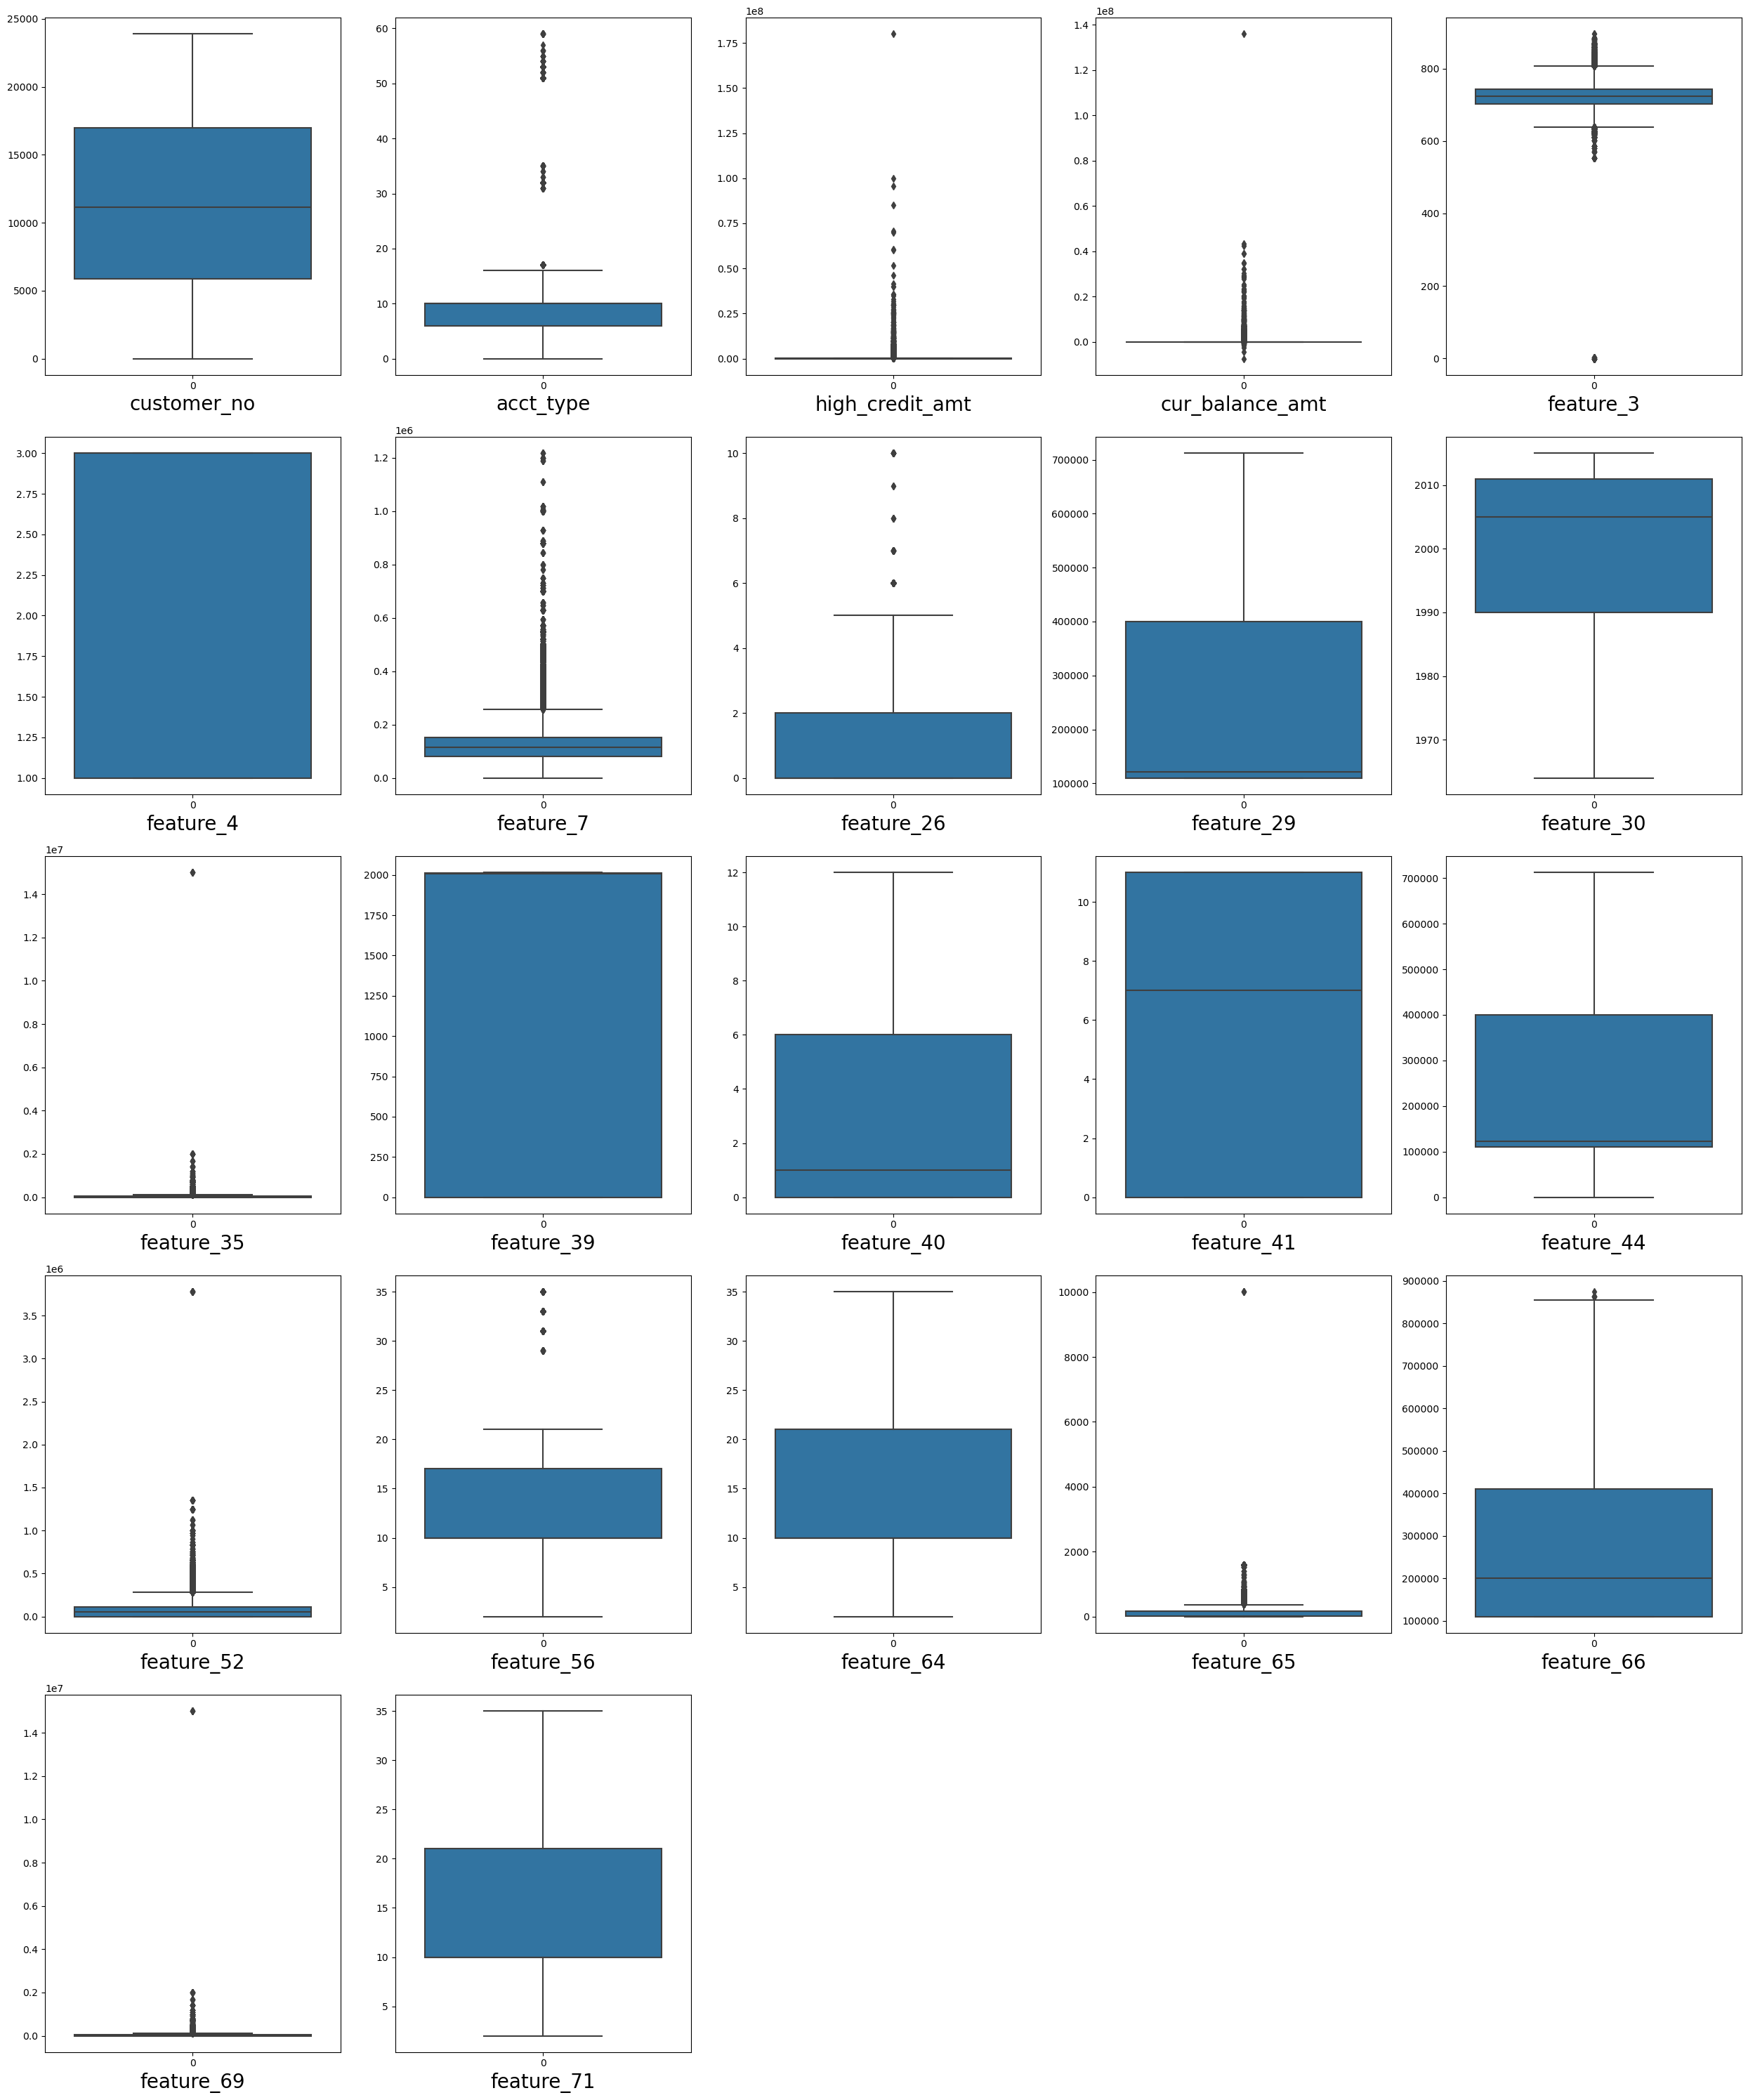

In [119]:
# checking outliers
plt.figure(figsize=(25,30))
plt_num  = 1
for columns in continuous_columns:
    if plt_num <= 22:
        plt.subplot(5,5,plt_num)
        sns.boxplot(continuous_columns[columns])
        plt.xlabel(columns,fontsize = 20)
    plt_num += 1
plt.tight_layout()

<Axes: >

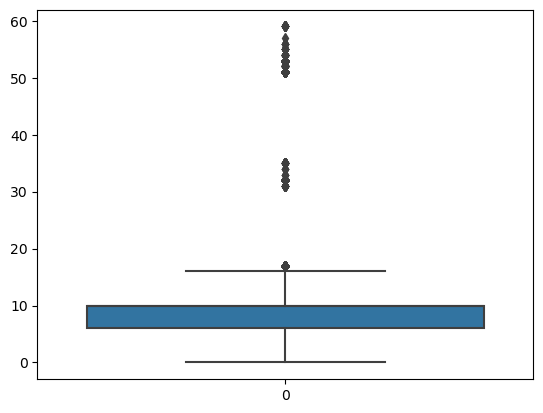

In [120]:
sns.boxplot(data2["acct_type"]) # check outliers

In [121]:
data2.acct_type.median() #find median

10.0

In [122]:
data2.loc[data2["acct_type"] >= 16,"acct_type"] = 10. # replace outliers

<Axes: >

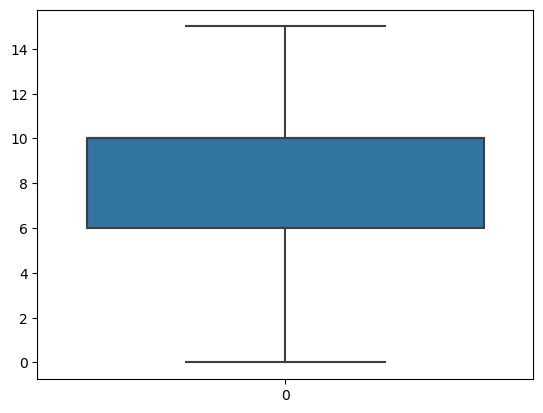

In [123]:
sns.boxplot(data2["acct_type"]) # check outliers

<Axes: >

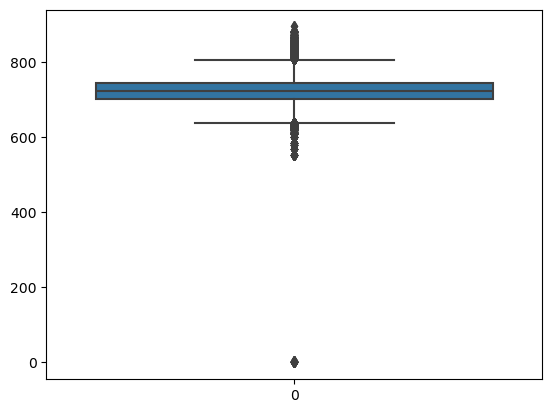

In [124]:
sns.boxplot(data2["feature_3"]) # check outliers

In [125]:
data2.feature_3.median()#find median

724.0

In [126]:
data2.loc[data2["feature_3"] >= 800,"feature_3"] = 724. # replace outliers

In [127]:
data2.loc[data2["feature_3"] <= 650,"feature_3"] = 724.0 # replace outliers

<Axes: >

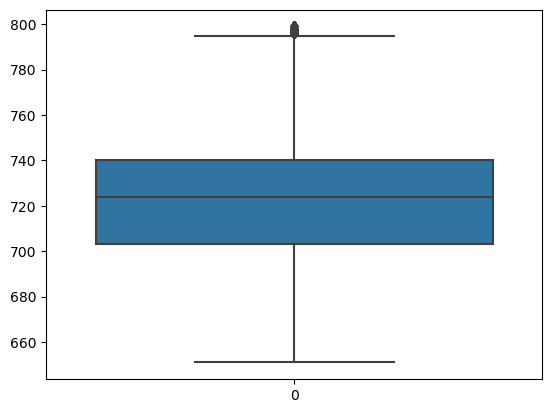

In [128]:
sns.boxplot(data2["feature_3"]) # check outliers

<Axes: >

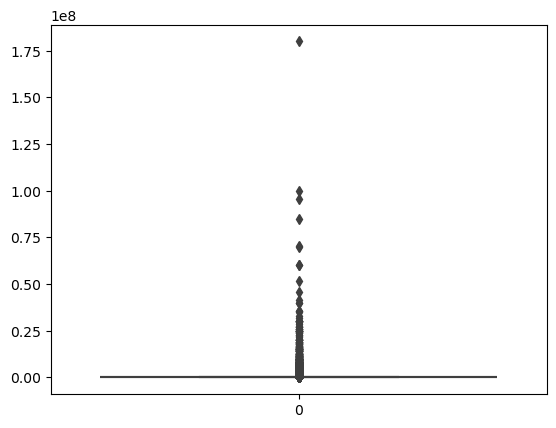

In [129]:
sns.boxplot(data2["high_credit_amt"]) # check outliers

<Axes: >

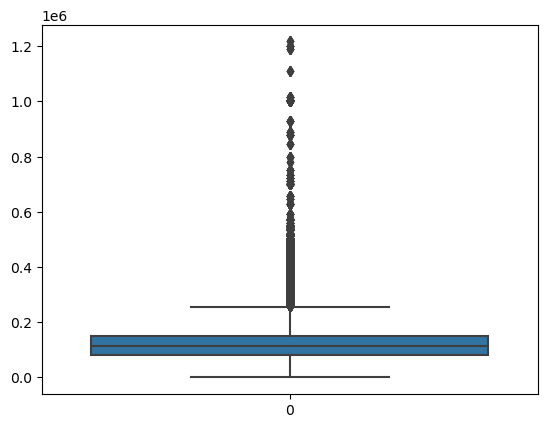

In [130]:
sns.boxplot(data2["feature_7"]) # check outliers

<Axes: >

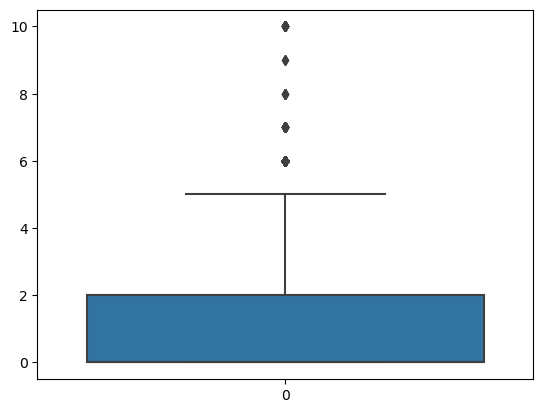

In [131]:
sns.boxplot(data2["feature_26"]) # check outliers

<Axes: >

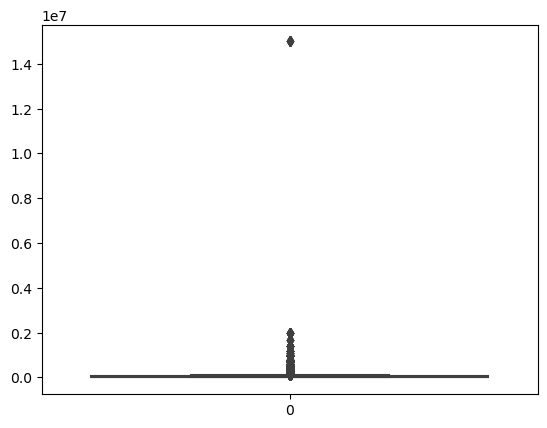

In [132]:
sns.boxplot(data2["feature_35"]) # check outliers

<Axes: >

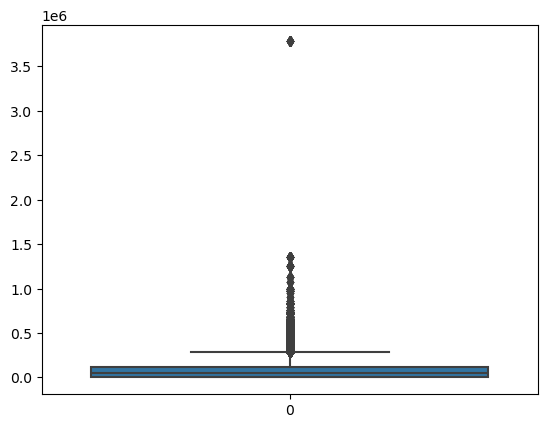

In [133]:
sns.boxplot(data2["feature_52"]) # check outliers

In [134]:
data2.feature_52.median()#find median

55000.0

In [135]:
data2.loc[data2["feature_52"] >= 2.0,"feature_52"] = 55000. # replace outliers

<Axes: >

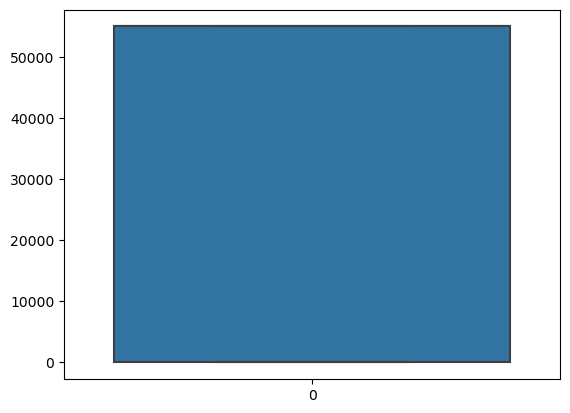

In [136]:
sns.boxplot(data2["feature_52"]) # check outliers

<Axes: >

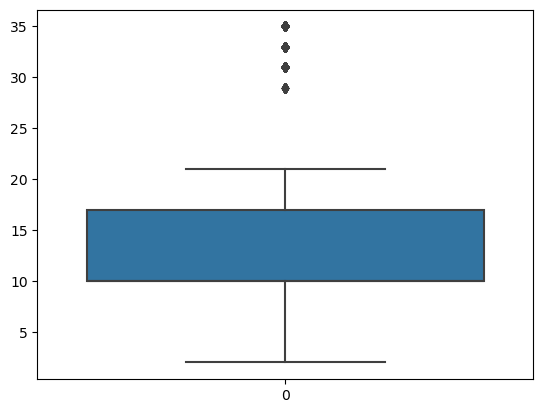

In [137]:
sns.boxplot(data2["feature_56"]) # check outliers

<Axes: >

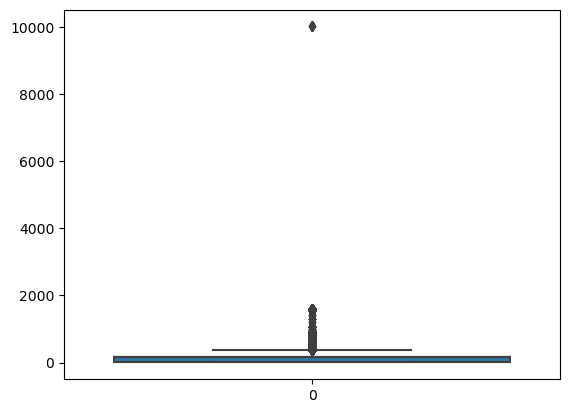

In [138]:
sns.boxplot(data2["feature_65"]) # check outliers

In [139]:
data2.feature_65.median()#find median

157.0

In [140]:
data2.loc[data2["feature_65"] >= 800,"feature_65"] = 157. # replace outliers

<Axes: >

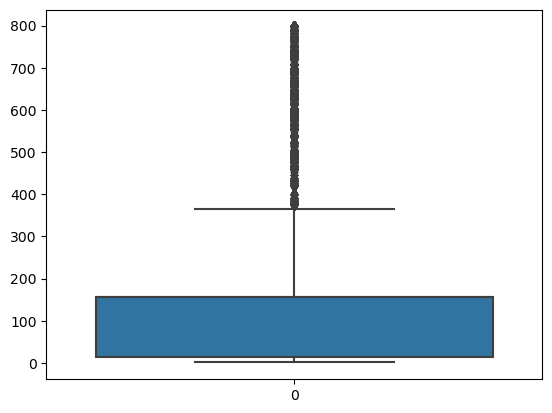

In [141]:
sns.boxplot(data2["feature_65"]) # check outliers

<Axes: >

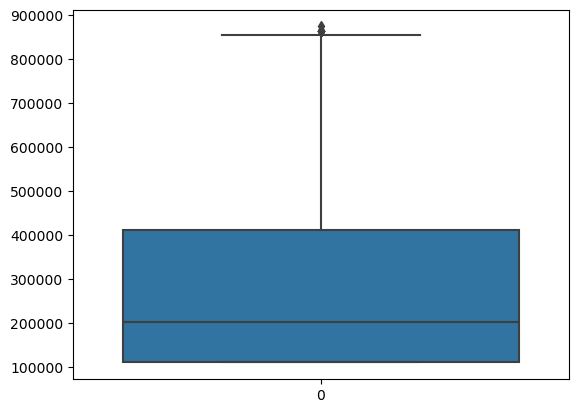

In [142]:
sns.boxplot(data2["feature_66"]) # check outliers

In [143]:
data2.feature_66.median#find median

<bound method Series.median of 0         110059.0
1         110059.0
2         110059.0
3         121003.0
4         121003.0
            ...   
186324    500017.0
186325    500017.0
186326    500017.0
186327    500017.0
186328    500017.0
Name: feature_66, Length: 186329, dtype: float64>

In [144]:
data2.loc[data2["feature_66"] >= 850000,"feature_66"] = 201001.0 # replace outliers

<Axes: >

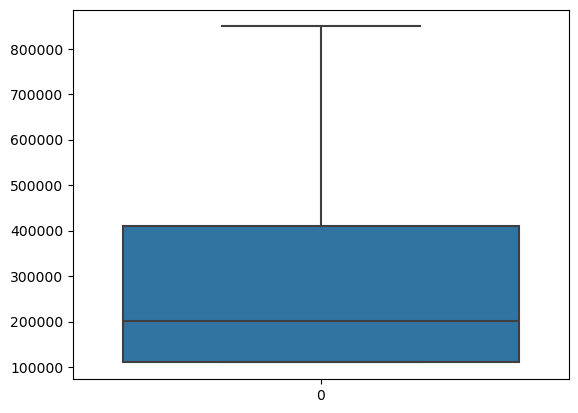

In [145]:
sns.boxplot(data2["feature_66"]) # check outliers

<Axes: >

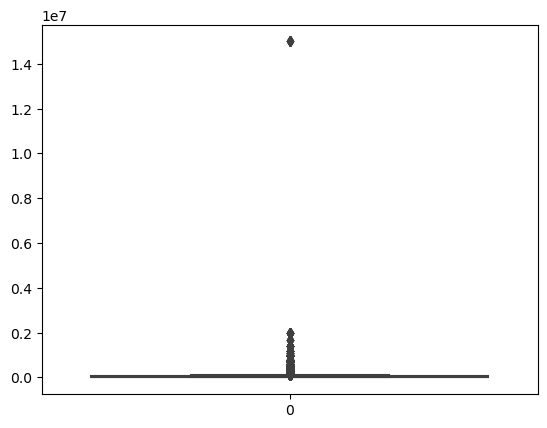

In [146]:
sns.boxplot(data2["feature_69"]) # check outliers

In [147]:
data2.head() #showing first 5 rows of data set

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_20,feature_21,feature_22,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_47,feature_50,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71,feature_72,feature_77,Bad_label
0,2015-11-10,12265,2015-10-20,6,2013-06-09,2014-06-30,2015-09-30,20900.0,0,2015-09-01,2014-07-01,2015-11-10,2015-10-15,Platinum Maxima,2015-10-15,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,ASWPKXXXXX,1984-06-15,88009XXXXX,@GMAIL.COM,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,ASWPKXXXXX,N,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,R,88009XXXXX,1
1,2015-11-10,12265,2015-10-20,10,2012-05-25,2015-09-06,2015-10-03,16201.0,10390,2015-10-01,2012-11-01,2015-11-10,2015-10-15,Platinum Maxima,2015-10-15,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,ASWPKXXXXX,1984-06-15,88009XXXXX,@GMAIL.COM,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,ASWPKXXXXX,N,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,R,88009XXXXX,1
2,2015-11-10,12265,2015-10-20,10,2012-03-22,2015-08-31,2015-09-30,41028.0,34420,2015-09-01,2012-10-01,2015-11-10,2015-10-15,Platinum Maxima,2015-10-15,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,ASWPKXXXXX,1984-06-15,88009XXXXX,@GMAIL.COM,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,ASWPKXXXXX,N,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,R,88009XXXXX,1
3,2015-07-20,15606,2015-07-09,10,2006-01-13,2015-03-05,2009-01-31,93473.0,0,2007-07-01,2006-02-01,2015-07-20,2015-07-06,Platinum Deligh,2015-07-06,687.0,3.0,125000.0,PD1,12,SA35,S001,AHRPMXXXXX,1980-06-20,88009XXXXX,@YAHOO.COM,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,Faridabad,121003.0,AHRPMXXXXX,N,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,R,XXXXX,1
4,2015-07-20,15606,2015-07-09,6,2015-01-18,2015-05-05,2015-05-31,20250.0,13500,2015-05-01,2015-01-01,2015-07-20,2015-07-06,Platinum Deligh,2015-07-06,687.0,3.0,125000.0,PD1,12,SA35,S001,AHRPMXXXXX,1980-06-20,88009XXXXX,@YAHOO.COM,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,Faridabad,121003.0,AHRPMXXXXX,N,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,R,XXXXX,1


In [148]:
#drop columns
data3 = data2.drop(["dt_opened_x","customer_no","upload_dt","last_paymt_dt","reporting_dt","paymt_str_dt","paymt_end_dt","dt_opened_y","entry_time","feature_2","feature_20","feature_21","feature_22","feature_24","feature_47","feature_50","feature_72","feature_77","cur_balance_amt"],axis=1)
data3

,acct_type,opened_dt,high_credit_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71,Bad_label
0,6,2013-06-09,20900.0,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1
1,10,2012-05-25,16201.0,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1
2,10,2012-03-22,41028.0,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1
3,10,2006-01-13,93473.0,Platinum Deligh,687.0,3.0,125000.0,PD1,12,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,Faridabad,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1
4,6,2015-01-18,20250.0,Platinum Deligh,687.0,3.0,125000.0,PD1,12,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,Faridabad,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,10,2007-05-02,24228.0,Titanium Deligh,746.0,3.0,138000.0,TD1,0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999.0,0.0,11.0,Hyderabad,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0
186325,10,2007-04-11,19584.0,Titanium Deligh,746.0,3.0,138000.0,TD1,0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999.0,0.0,11.0,Hyderabad,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0
186326,10,2006-11-20,50844.0,Titanium Deligh,746.0,3.0,138000.0,TD1,0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999.0,0.0,11.0,Hyderabad,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0
186327,10,2006-10-17,35587.0,Titanium Deligh,746.0,3.0,138000.0,TD1,0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,1999.0,0.0,11.0,Hyderabad,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0


In [149]:
# change data into datatime
data3["Year"] = pd.to_datetime(data3["opened_dt"]).dt.year
data3["Month"] = pd.to_datetime(data3["opened_dt"]).dt.month
data3["Day"] = pd.to_datetime(data3["opened_dt"]).dt.day

In [150]:
data3.head()

,acct_type,opened_dt,high_credit_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71,Bad_label,Year,Month,Day
0,6,2013-06-09,20900.0,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2013,6,9
1,10,2012-05-25,16201.0,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2012,5,25
2,10,2012-03-22,41028.0,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,Gurgaon,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2012,3,22
3,10,2006-01-13,93473.0,Platinum Deligh,687.0,3.0,125000.0,PD1,12,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,Faridabad,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1,2006,1,13
4,6,2015-01-18,20250.0,Platinum Deligh,687.0,3.0,125000.0,PD1,12,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,Faridabad,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1,2015,1,18


In [151]:
from sklearn.preprocessing import LabelEncoder #import label encoder
LE = LabelEncoder() # call label encoder

# Apply label encoder
data3["feature_12"] = LE.fit_transform(data3["feature_12"])
data3["feature_16"] = LE.fit_transform(data3["feature_16"])
data3["feature_15"] = LE.fit_transform(data3["feature_15"])
data3["feature_28"] = LE.fit_transform(data3["feature_28"])
data3["feature_32"] = LE.fit_transform(data3["feature_32"])
data3["feature_43"] = LE.fit_transform(data3["feature_43"])
data3["feature_36"] = LE.fit_transform(data3["feature_36"])
data3["feature_38"] = LE.fit_transform(data3["feature_38"])
data3["feature_37"] = LE.fit_transform(data3["feature_37"])
data3["feature_27"] = LE.fit_transform(data3["feature_27"])

In [152]:
data3.head() #showing first 5 rows of data set

,acct_type,opened_dt,high_credit_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71,Bad_label,Year,Month,Day
0,6,2013-06-09,20900.0,Platinum Maxima,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,110059.0,2006.0,2,35000.0,6,7,4509,2009.0,1.0,4.0,28,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2013,6,9
1,10,2012-05-25,16201.0,Platinum Maxima,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,110059.0,2006.0,2,35000.0,6,7,4509,2009.0,1.0,4.0,28,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2012,5,25
2,10,2012-03-22,41028.0,Platinum Maxima,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,110059.0,2006.0,2,35000.0,6,7,4509,2009.0,1.0,4.0,28,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2012,3,22
3,10,2006-01-13,93473.0,Platinum Deligh,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,121003.0,2009.0,4,100000.0,6,1,2019,2013.0,1.0,2.0,21,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1,2006,1,13
4,6,2015-01-18,20250.0,Platinum Deligh,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,121003.0,2009.0,4,100000.0,6,1,2019,2013.0,1.0,2.0,21,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1,2015,1,18


In [153]:
# get dummy values for feature 1
df = pd.get_dummies(data3["feature_1"],dtype=int,prefix="feature_1")
df

,feature_1_Golf Card,feature_1_Insignia,feature_1_Platinum Cricke,feature_1_Platinum Deligh,feature_1_Platinum Maxima,feature_1_RBL Bank Fun+,feature_1_Titanium Deligh
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
186324,0,0,0,0,0,0,1
186325,0,0,0,0,0,0,1
186326,0,0,0,0,0,0,1
186327,0,0,0,0,0,0,1


In [154]:
# concate the data
data4 = pd.concat([data3,df],axis=1)
data4

,acct_type,opened_dt,high_credit_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71,Bad_label,Year,Month,Day,feature_1_Golf Card,feature_1_Insignia,feature_1_Platinum Cricke,feature_1_Platinum Deligh,feature_1_Platinum Maxima,feature_1_RBL Bank Fun+,feature_1_Titanium Deligh
0,6,2013-06-09,20900.0,Platinum Maxima,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,110059.0,2006.0,2,35000.0,6,7,4509,2009.0,1.0,4.0,28,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2013,6,9,0,0,0,0,1,0,0
1,10,2012-05-25,16201.0,Platinum Maxima,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,110059.0,2006.0,2,35000.0,6,7,4509,2009.0,1.0,4.0,28,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2012,5,25,0,0,0,0,1,0,0
2,10,2012-03-22,41028.0,Platinum Maxima,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,110059.0,2006.0,2,35000.0,6,7,4509,2009.0,1.0,4.0,28,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2012,3,22,0,0,0,0,1,0,0
3,10,2006-01-13,93473.0,Platinum Deligh,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,121003.0,2009.0,4,100000.0,6,1,2019,2013.0,1.0,2.0,21,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1,2006,1,13,0,0,0,1,0,0,0
4,6,2015-01-18,20250.0,Platinum Deligh,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,121003.0,2009.0,4,100000.0,6,1,2019,2013.0,1.0,2.0,21,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1,2015,1,18,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,10,2007-05-02,24228.0,Titanium Deligh,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,500017.0,1995.0,4,45800.0,6,1,2629,1999.0,0.0,11.0,31,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0,2007,5,2,0,0,0,0,0,0,1
186325,10,2007-04-11,19584.0,Titanium Deligh,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,500017.0,1995.0,4,45800.0,6,1,2629,1999.0,0.0,11.0,31,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0,2007,4,11,0,0,0,0,0,0,1
186326,10,2006-11-20,50844.0,Titanium Deligh,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,500017.0,1995.0,4,45800.0,6,1,2629,1999.0,0.0,11.0,31,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0,2006,11,20,0,0,0,0,0,0,1
186327,10,2006-10-17,35587.0,Titanium Deligh,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,500017.0,1995.0,4,45800.0,6,1,2629,1999.0,0.0,11.0,31,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0,2006,10,17,0,0,0,0,0,0,1


In [155]:
data5 = data4.drop(["opened_dt","feature_1"],axis=1) # drop the columns
data5

,acct_type,high_credit_amt,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71,Bad_label,Year,Month,Day,feature_1_Golf Card,feature_1_Insignia,feature_1_Platinum Cricke,feature_1_Platinum Deligh,feature_1_Platinum Maxima,feature_1_RBL Bank Fun+,feature_1_Titanium Deligh
0,6,20900.0,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,110059.0,2006.0,2,35000.0,6,7,4509,2009.0,1.0,4.0,28,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2013,6,9,0,0,0,0,1,0,0
1,10,16201.0,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,110059.0,2006.0,2,35000.0,6,7,4509,2009.0,1.0,4.0,28,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2012,5,25,0,0,0,0,1,0,0
2,10,41028.0,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,110059.0,2006.0,2,35000.0,6,7,4509,2009.0,1.0,4.0,28,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0,1,2012,3,22,0,0,0,0,1,0,0
3,10,93473.0,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,121003.0,2009.0,4,100000.0,6,1,2019,2013.0,1.0,2.0,21,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1,2006,1,13,0,0,0,1,0,0,0
4,6,20250.0,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,121003.0,2009.0,4,100000.0,6,1,2019,2013.0,1.0,2.0,21,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0,1,2015,1,18,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,10,24228.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,500017.0,1995.0,4,45800.0,6,1,2629,1999.0,0.0,11.0,31,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0,2007,5,2,0,0,0,0,0,0,1
186325,10,19584.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,500017.0,1995.0,4,45800.0,6,1,2629,1999.0,0.0,11.0,31,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0,2007,4,11,0,0,0,0,0,0,1
186326,10,50844.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,500017.0,1995.0,4,45800.0,6,1,2629,1999.0,0.0,11.0,31,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0,2006,11,20,0,0,0,0,0,0,1
186327,10,35587.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,500017.0,1995.0,4,45800.0,6,1,2629,1999.0,0.0,11.0,31,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0,0,2006,10,17,0,0,0,0,0,0,1


In [156]:
for column in data5: # show columns
    print(column)

acct_type
high_credit_amt
feature_3
feature_4
feature_7
feature_12
feature_14
feature_15
feature_16
feature_26
feature_27
feature_28
feature_29
feature_30
feature_32
feature_35
feature_36
feature_37
feature_38
feature_39
feature_40
feature_41
feature_43
feature_44
feature_52
feature_56
feature_64
feature_65
feature_66
feature_69
feature_71
Bad_label
Year
Month
Day
feature_1_Golf Card
feature_1_Insignia
feature_1_Platinum Cricke
feature_1_Platinum Deligh
feature_1_Platinum Maxima
feature_1_RBL Bank Fun+
feature_1_Titanium Deligh


In [157]:
continous_col = data5.select_dtypes(include=["float64","int64"]) # getting numerical data
continous_col

,acct_type,high_credit_amt,feature_3,feature_4,feature_7,feature_26,feature_29,feature_30,feature_35,feature_39,feature_40,feature_41,feature_44,feature_52,feature_56,feature_64,feature_65,feature_66,feature_69,feature_71
0,6,20900.0,683.0,3.0,56000.0,0.0,110059.0,2006.0,35000.0,2009.0,1.0,4.0,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0
1,10,16201.0,683.0,3.0,56000.0,0.0,110059.0,2006.0,35000.0,2009.0,1.0,4.0,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0
2,10,41028.0,683.0,3.0,56000.0,0.0,110059.0,2006.0,35000.0,2009.0,1.0,4.0,122001.0,0.0,10.0,10.0,157.0,110059.0,35000.0,13.0
3,10,93473.0,687.0,3.0,125000.0,2.0,121003.0,2009.0,100000.0,2013.0,1.0,2.0,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0
4,6,20250.0,687.0,3.0,125000.0,2.0,121003.0,2009.0,100000.0,2013.0,1.0,2.0,121003.0,0.0,13.0,13.0,39.0,121003.0,100000.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,10,24228.0,746.0,3.0,138000.0,3.0,500017.0,1995.0,45800.0,1999.0,0.0,11.0,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0
186325,10,19584.0,746.0,3.0,138000.0,3.0,500017.0,1995.0,45800.0,1999.0,0.0,11.0,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0
186326,10,50844.0,746.0,3.0,138000.0,3.0,500017.0,1995.0,45800.0,1999.0,0.0,11.0,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0
186327,10,35587.0,746.0,3.0,138000.0,3.0,500017.0,1995.0,45800.0,1999.0,0.0,11.0,500003.0,0.0,2.0,2.0,14.0,500017.0,45800.0,2.0


## EDA:- Final Data Exploratory Data Analysis

## 1. Univarinat Analysis

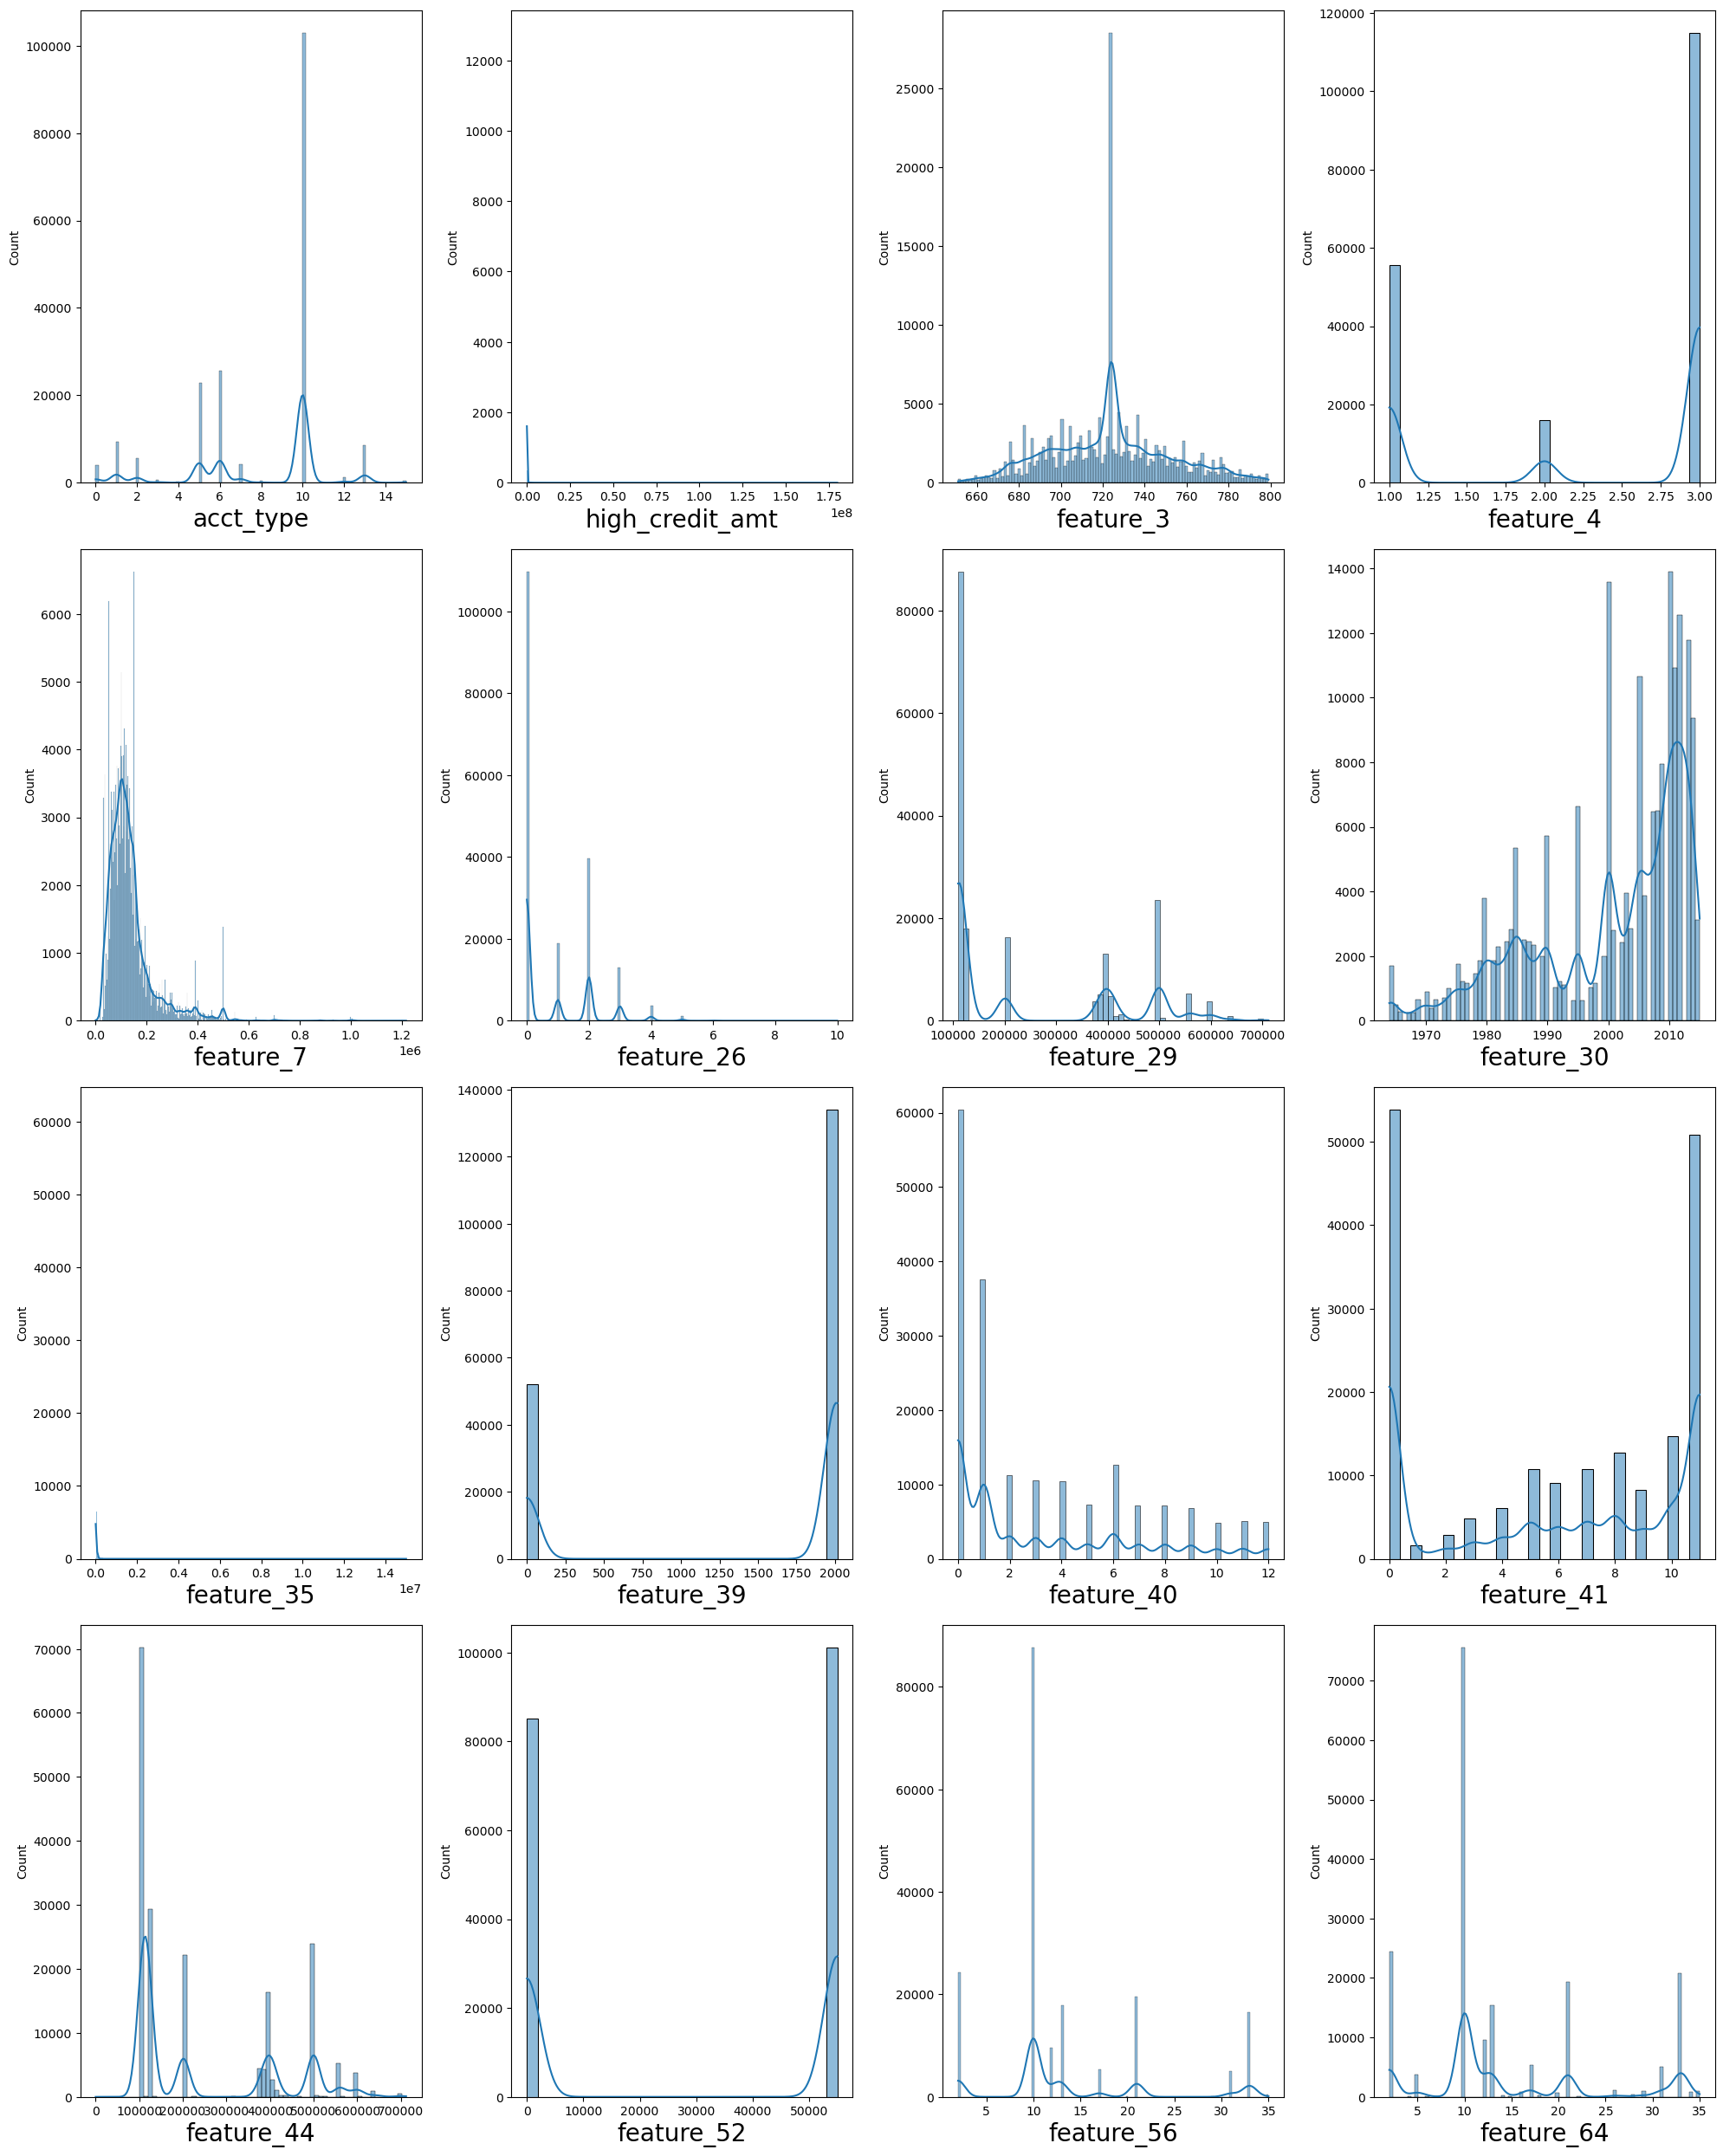

In [158]:
# Univarinat Analysis
plt.figure(figsize=(20,25))
plt_num = 1
for column in continous_col:
    if plt_num <= 16:
        plt.subplot(4,4,plt_num)
        sns.histplot(continous_col[column],kde=True)
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

### 2. Biavrainat Analysis

<Axes: xlabel='acct_type', ylabel='Bad_label'>

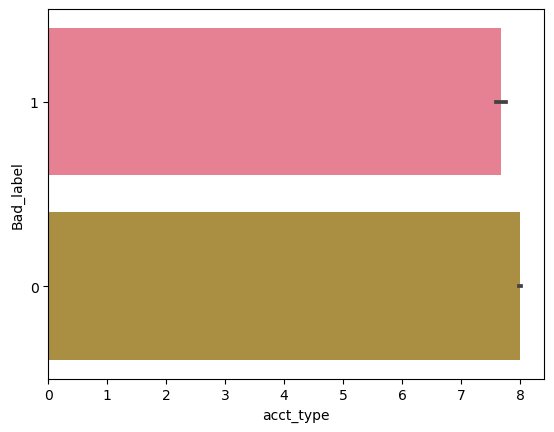

In [159]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.acct_type,y = data5.Bad_label, palette=palette)

<Axes: xlabel='high_credit_amt', ylabel='Bad_label'>

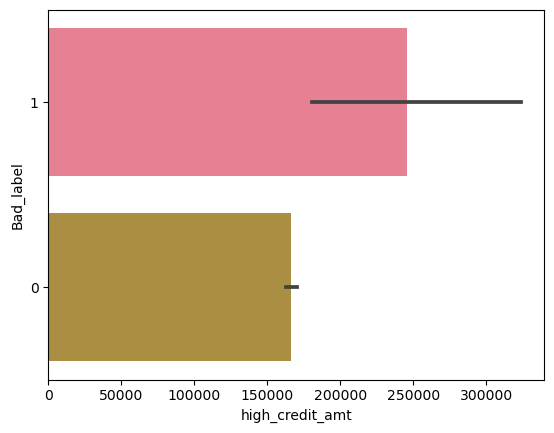

In [160]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.high_credit_amt,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_3', ylabel='Bad_label'>

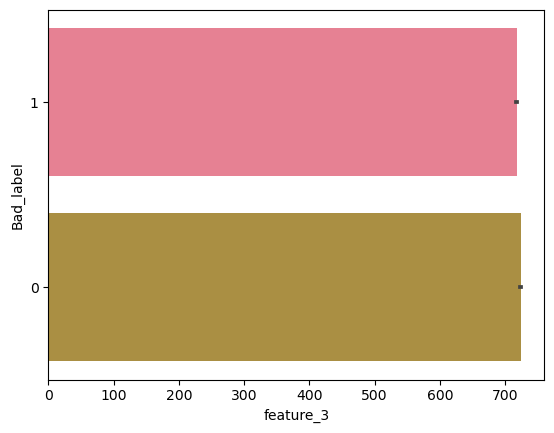

In [161]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_3,y = data5.Bad_label,palette=palette)

<Axes: xlabel='feature_4', ylabel='Bad_label'>

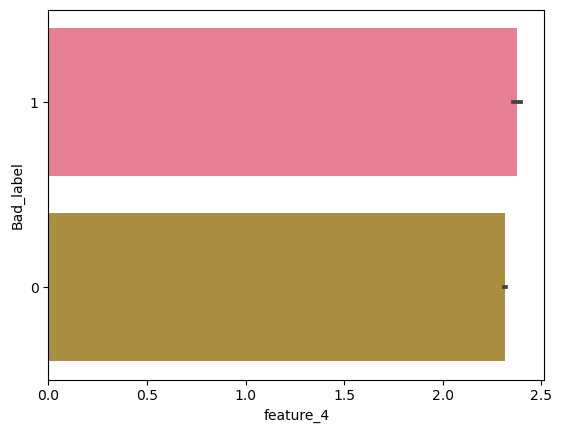

In [162]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_4,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_7', ylabel='Bad_label'>

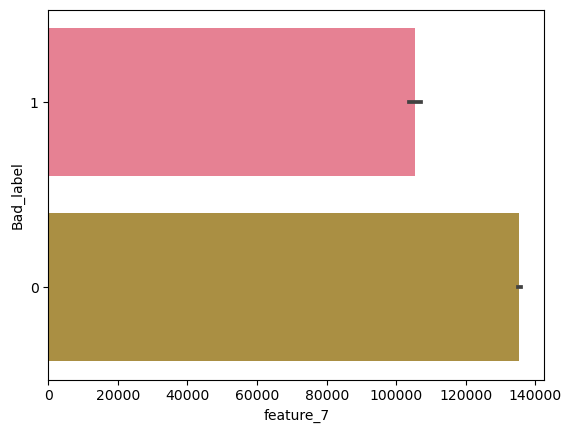

In [163]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_7,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_12', ylabel='Bad_label'>

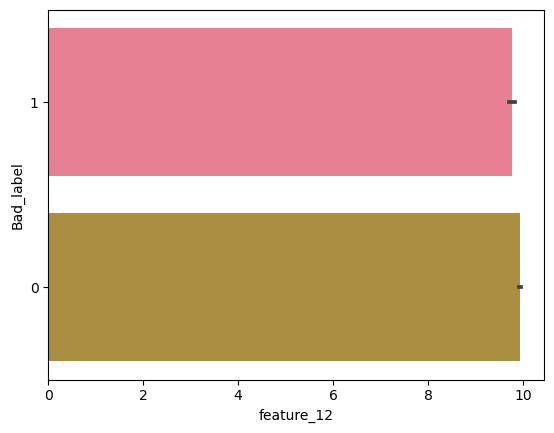

In [164]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_12,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_15', ylabel='Bad_label'>

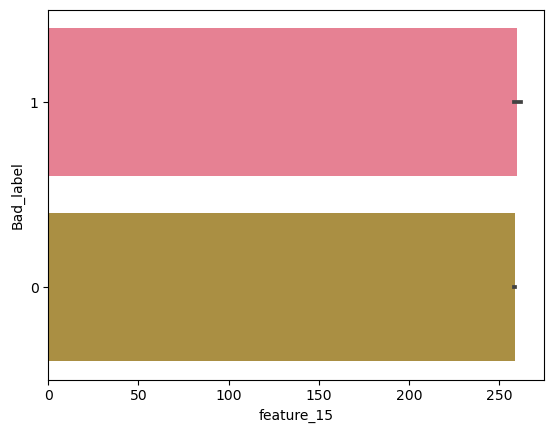

In [165]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_15,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_16', ylabel='Bad_label'>

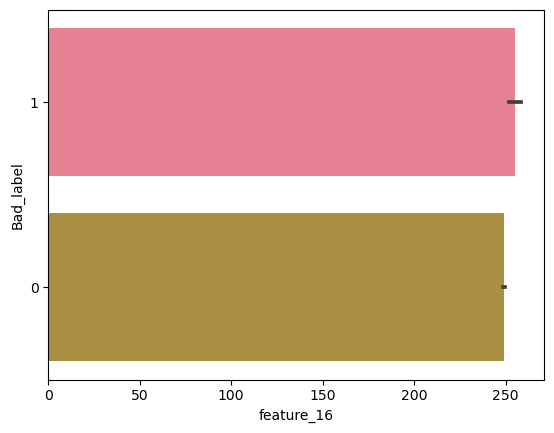

In [166]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_16,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_26', ylabel='Bad_label'>

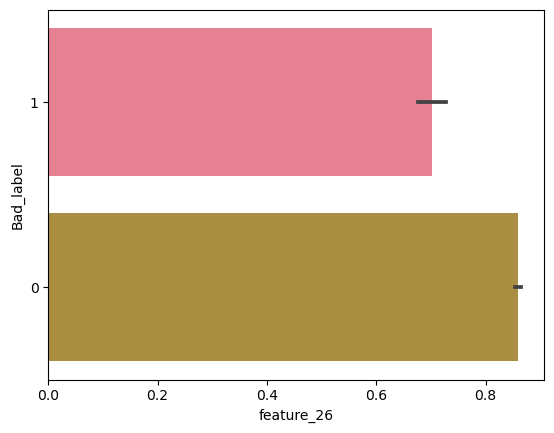

In [167]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_26,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_27', ylabel='Bad_label'>

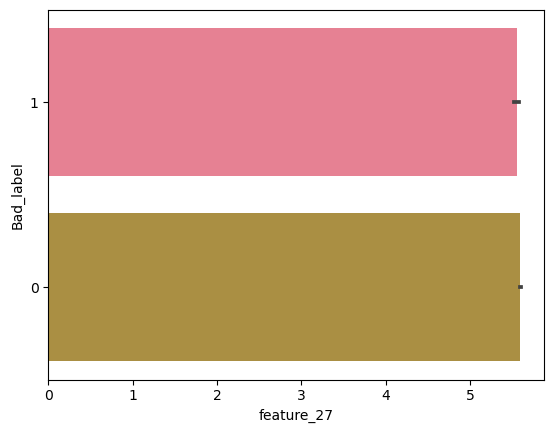

In [168]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_27,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_28', ylabel='Bad_label'>

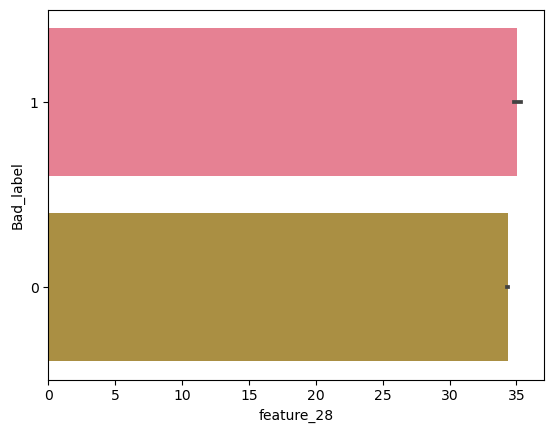

In [169]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_28,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_30', ylabel='Bad_label'>

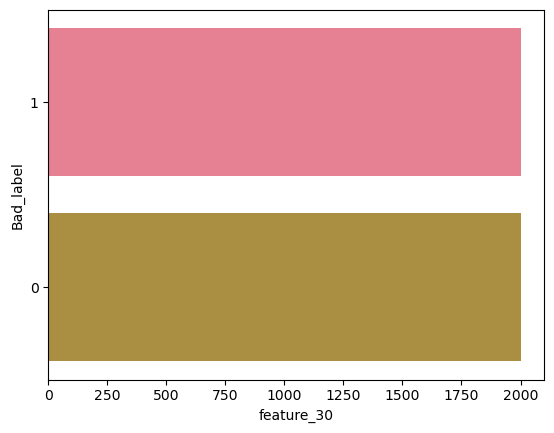

In [170]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_30,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_32', ylabel='Bad_label'>

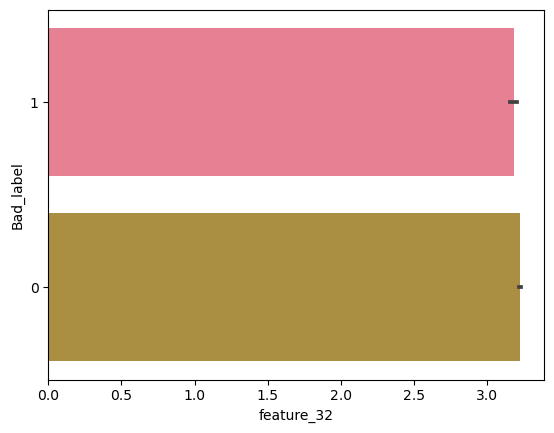

In [171]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_32,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_36', ylabel='Bad_label'>

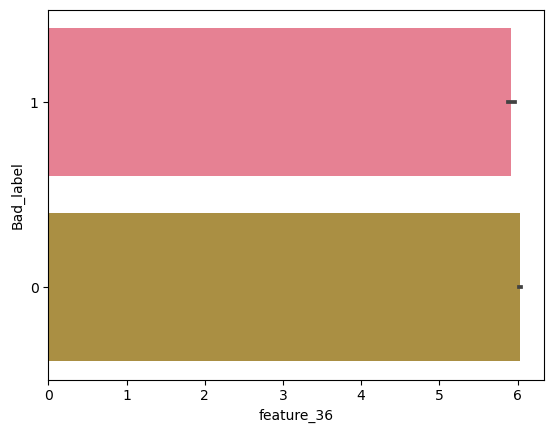

In [172]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_36,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_37', ylabel='Bad_label'>

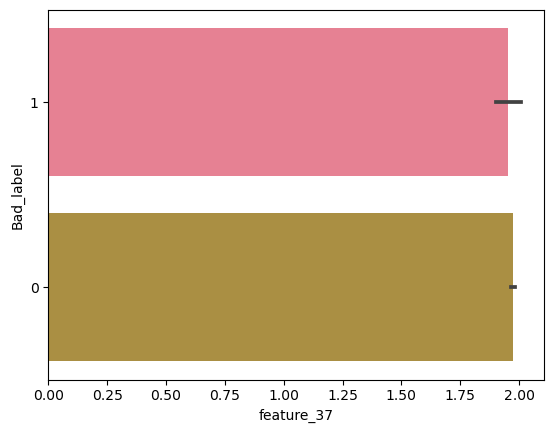

In [173]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_37,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_38', ylabel='Bad_label'>

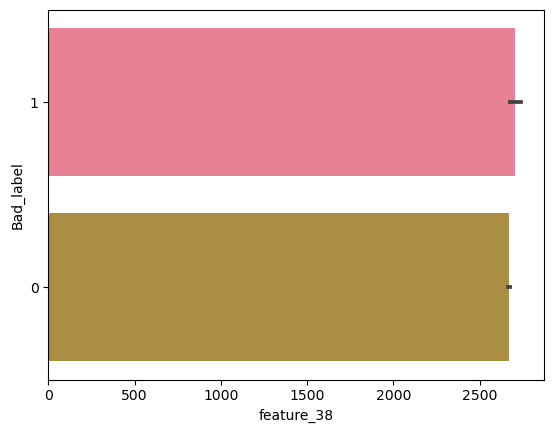

In [174]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_38,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_39', ylabel='Bad_label'>

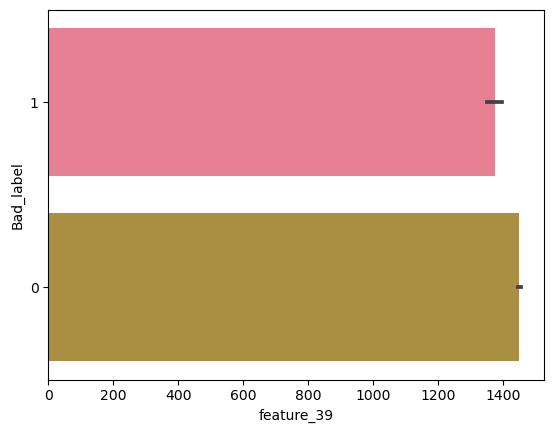

In [175]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_39,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_40', ylabel='Bad_label'>

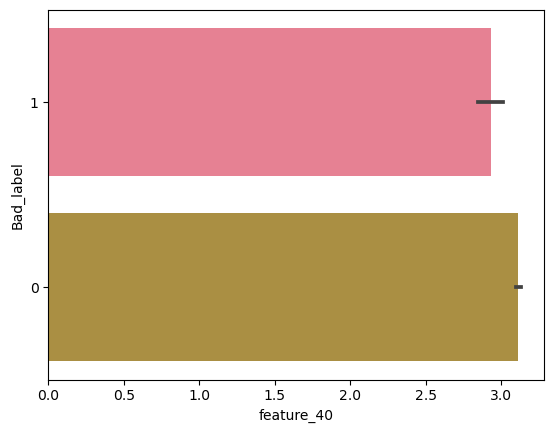

In [176]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_40,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_41', ylabel='Bad_label'>

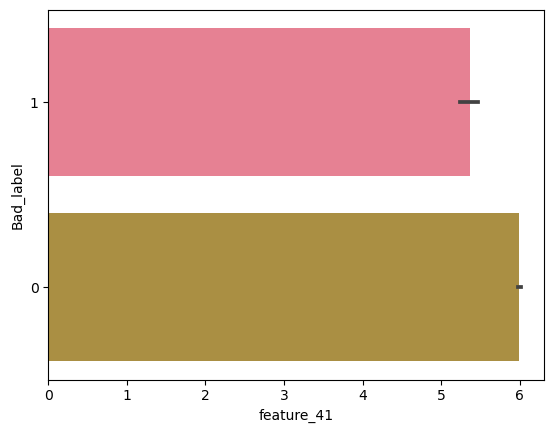

In [177]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_41,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_43', ylabel='Bad_label'>

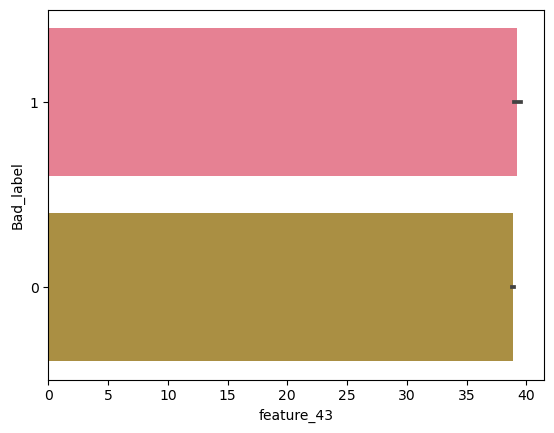

In [178]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_43,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_52', ylabel='Bad_label'>

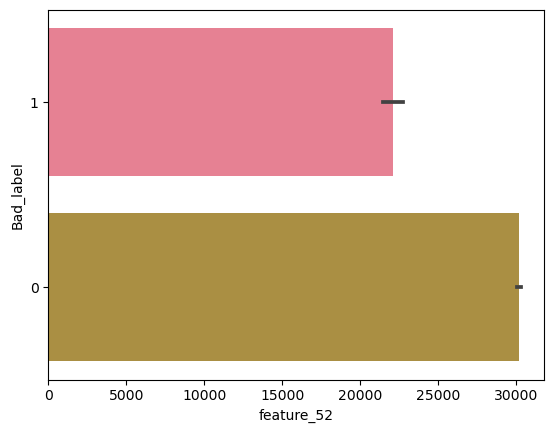

In [179]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_52,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_56', ylabel='Bad_label'>

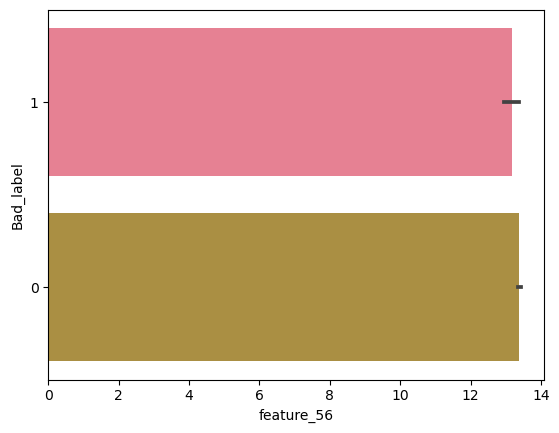

In [180]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_56,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_64', ylabel='Bad_label'>

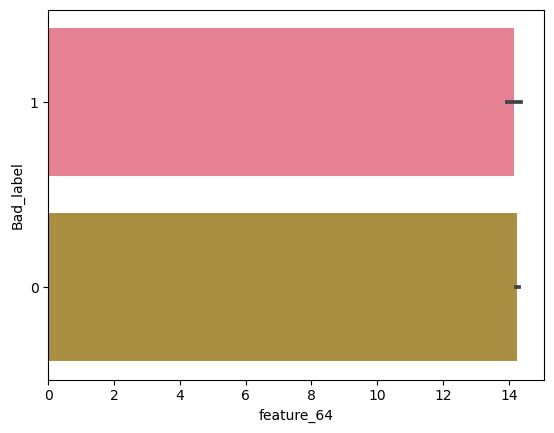

In [181]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_64,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_65', ylabel='Bad_label'>

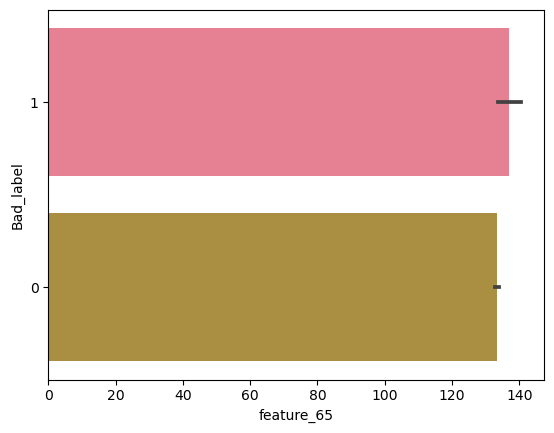

In [182]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_65,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_66', ylabel='Bad_label'>

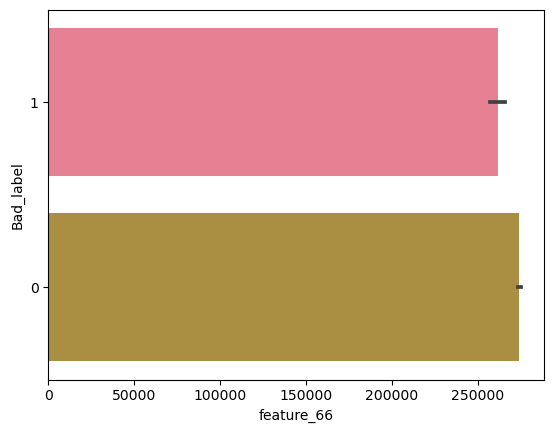

In [183]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_66,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_71', ylabel='Bad_label'>

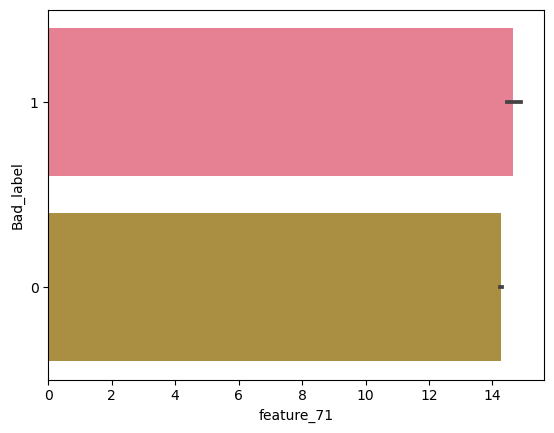

In [184]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.feature_71,y = data5.Bad_label, palette=palette)

<Axes: xlabel='Year', ylabel='Bad_label'>

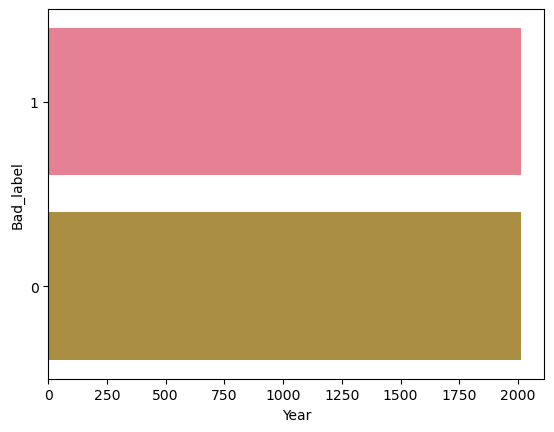

In [185]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.Year,y = data5.Bad_label, palette=palette)

<Axes: xlabel='Month', ylabel='Bad_label'>

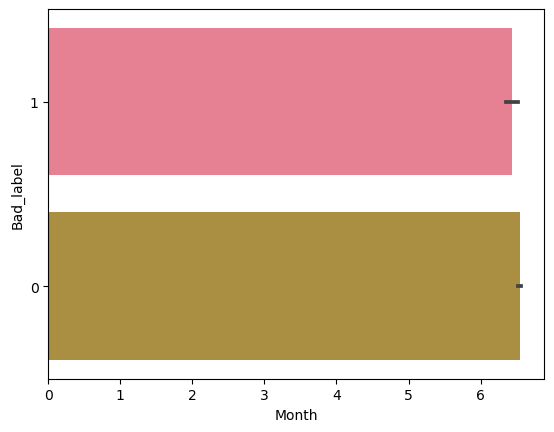

In [186]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.Month,y = data5.Bad_label, palette=palette)

<Axes: xlabel='Day', ylabel='Bad_label'>

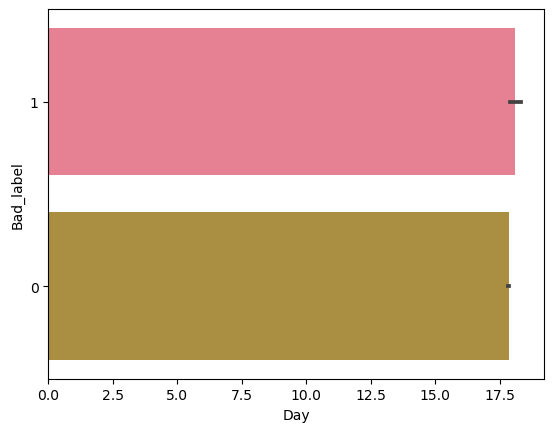

In [187]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5.Day,y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_1_Insignia', ylabel='Bad_label'>

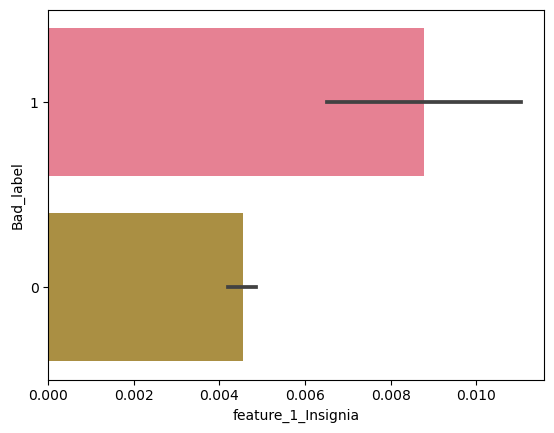

In [188]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5["feature_1_Insignia"],y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_1_Platinum Cricke', ylabel='Bad_label'>

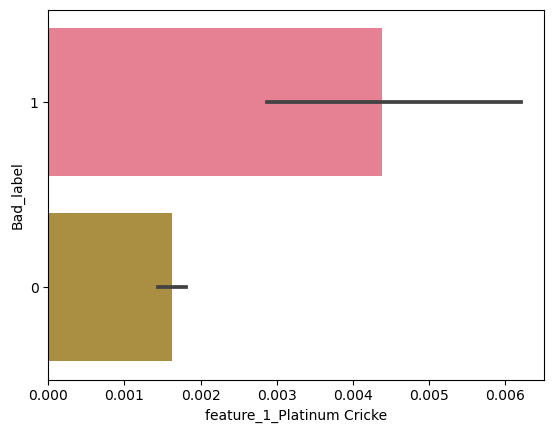

In [189]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5["feature_1_Platinum Cricke"],y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_1_Platinum Deligh', ylabel='Bad_label'>

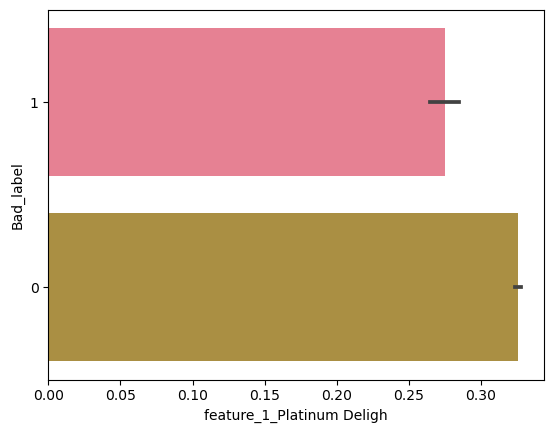

In [190]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5["feature_1_Platinum Deligh"],y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_1_Platinum Maxima', ylabel='Bad_label'>

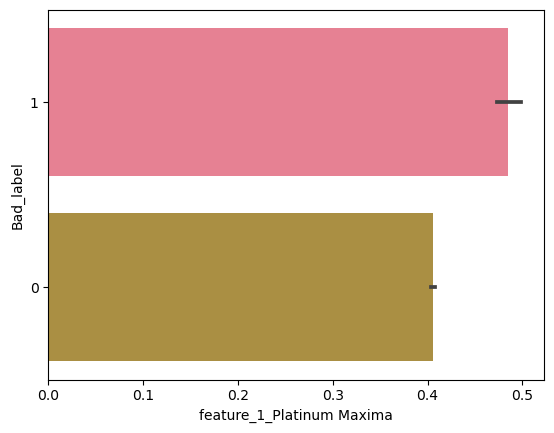

In [191]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5["feature_1_Platinum Maxima"],y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_1_RBL Bank Fun+', ylabel='Bad_label'>

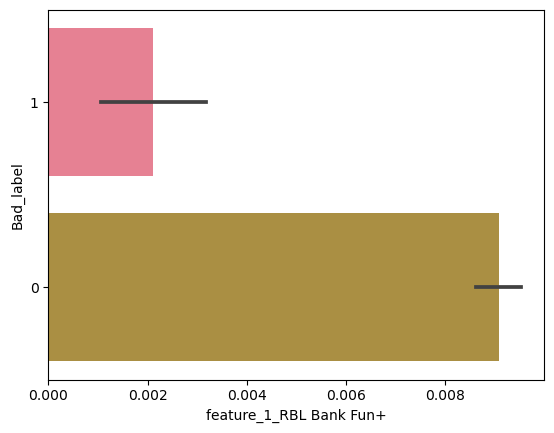

In [192]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5["feature_1_RBL Bank Fun+"],y = data5.Bad_label, palette=palette)

<Axes: xlabel='feature_1_Titanium Deligh', ylabel='Bad_label'>

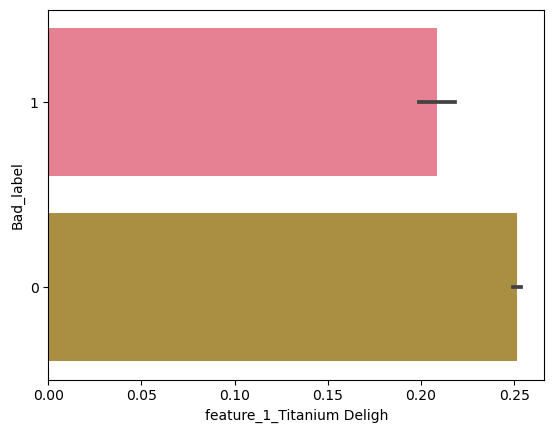

In [193]:
# show bar plot
palette = sns.color_palette("husl")
sns.barplot(x = data5["feature_1_Titanium Deligh"],y = data5.Bad_label, palette=palette)

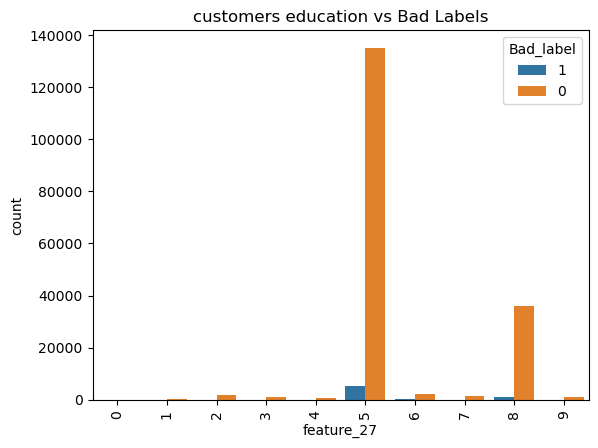

In [194]:
sns.countplot(x = data5.feature_27, hue = data5.Bad_label)#assign countplot between feature_27 and Bad Labels
plt.title("customers education vs Bad Labels")# assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

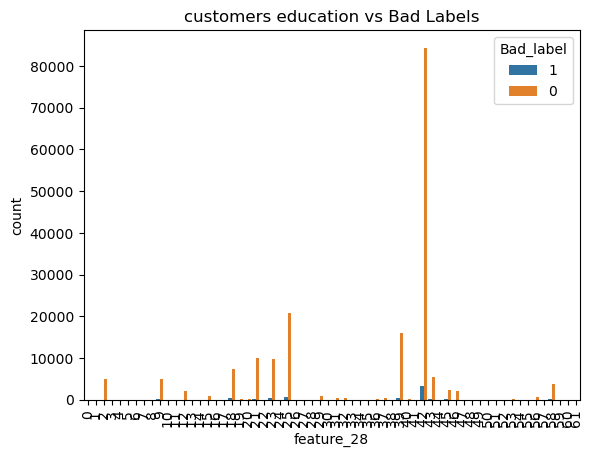

In [195]:
sns.countplot(x = data5.feature_28,hue = data5.Bad_label)#assign countplot between feature_27 and Bad Labels
plt.title("customers education vs Bad Labels")# assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

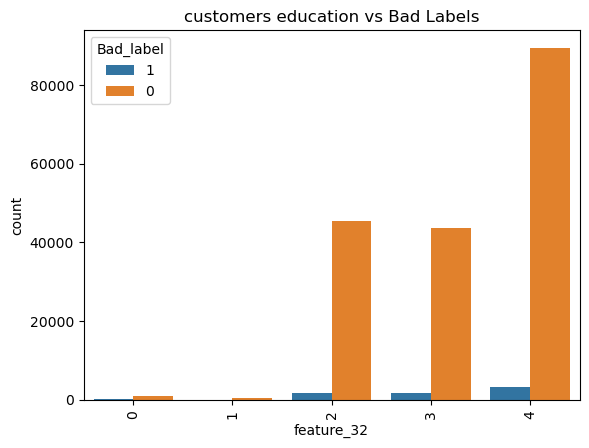

In [196]:
sns.countplot(x = data5.feature_32,hue = data5.Bad_label)#assign countplot between feature_27 and Bad Labels
plt.title("customers education vs Bad Labels")# assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

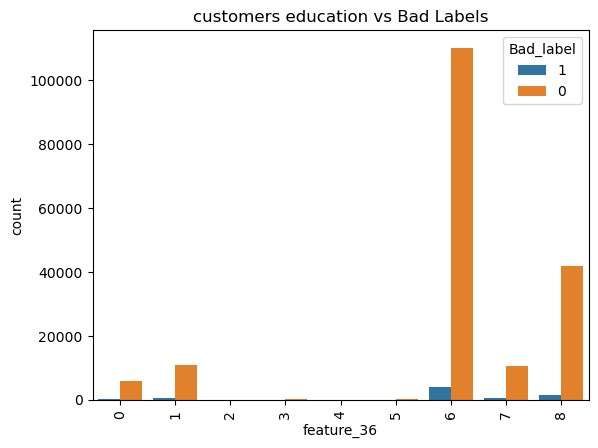

In [197]:
sns.countplot(x = data5.feature_36,hue = data.Bad_label)#assign countplot between feature_27 and Bad Labels
plt.title("customers education vs Bad Labels")# assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

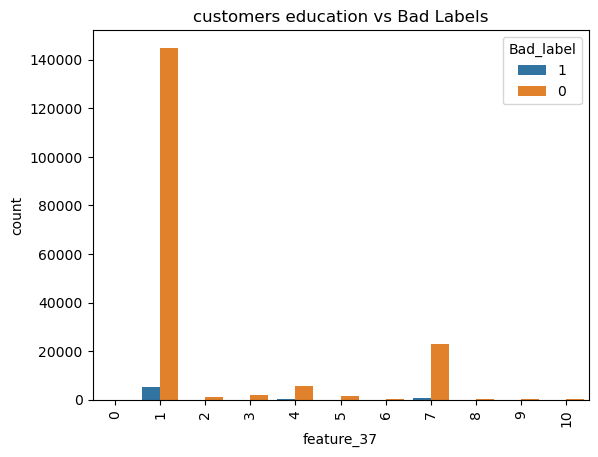

In [198]:
sns.countplot(x = data5.feature_37,hue = data5.Bad_label)#assign countplot between feature_27 and Bad Labels
plt.title("customers education vs Bad Labels")# assign title name of distributions
plt.xticks(rotation=90)#increasing font of x-axis and rorating 90 degree 
plt.show()# for showing graphs

### 3. Multivariant Analysis

* Here not visulize the the multivarinat analysis because it take a lot of time in run process.

### Final Conclusion of EDA

### 2. Feature Selection

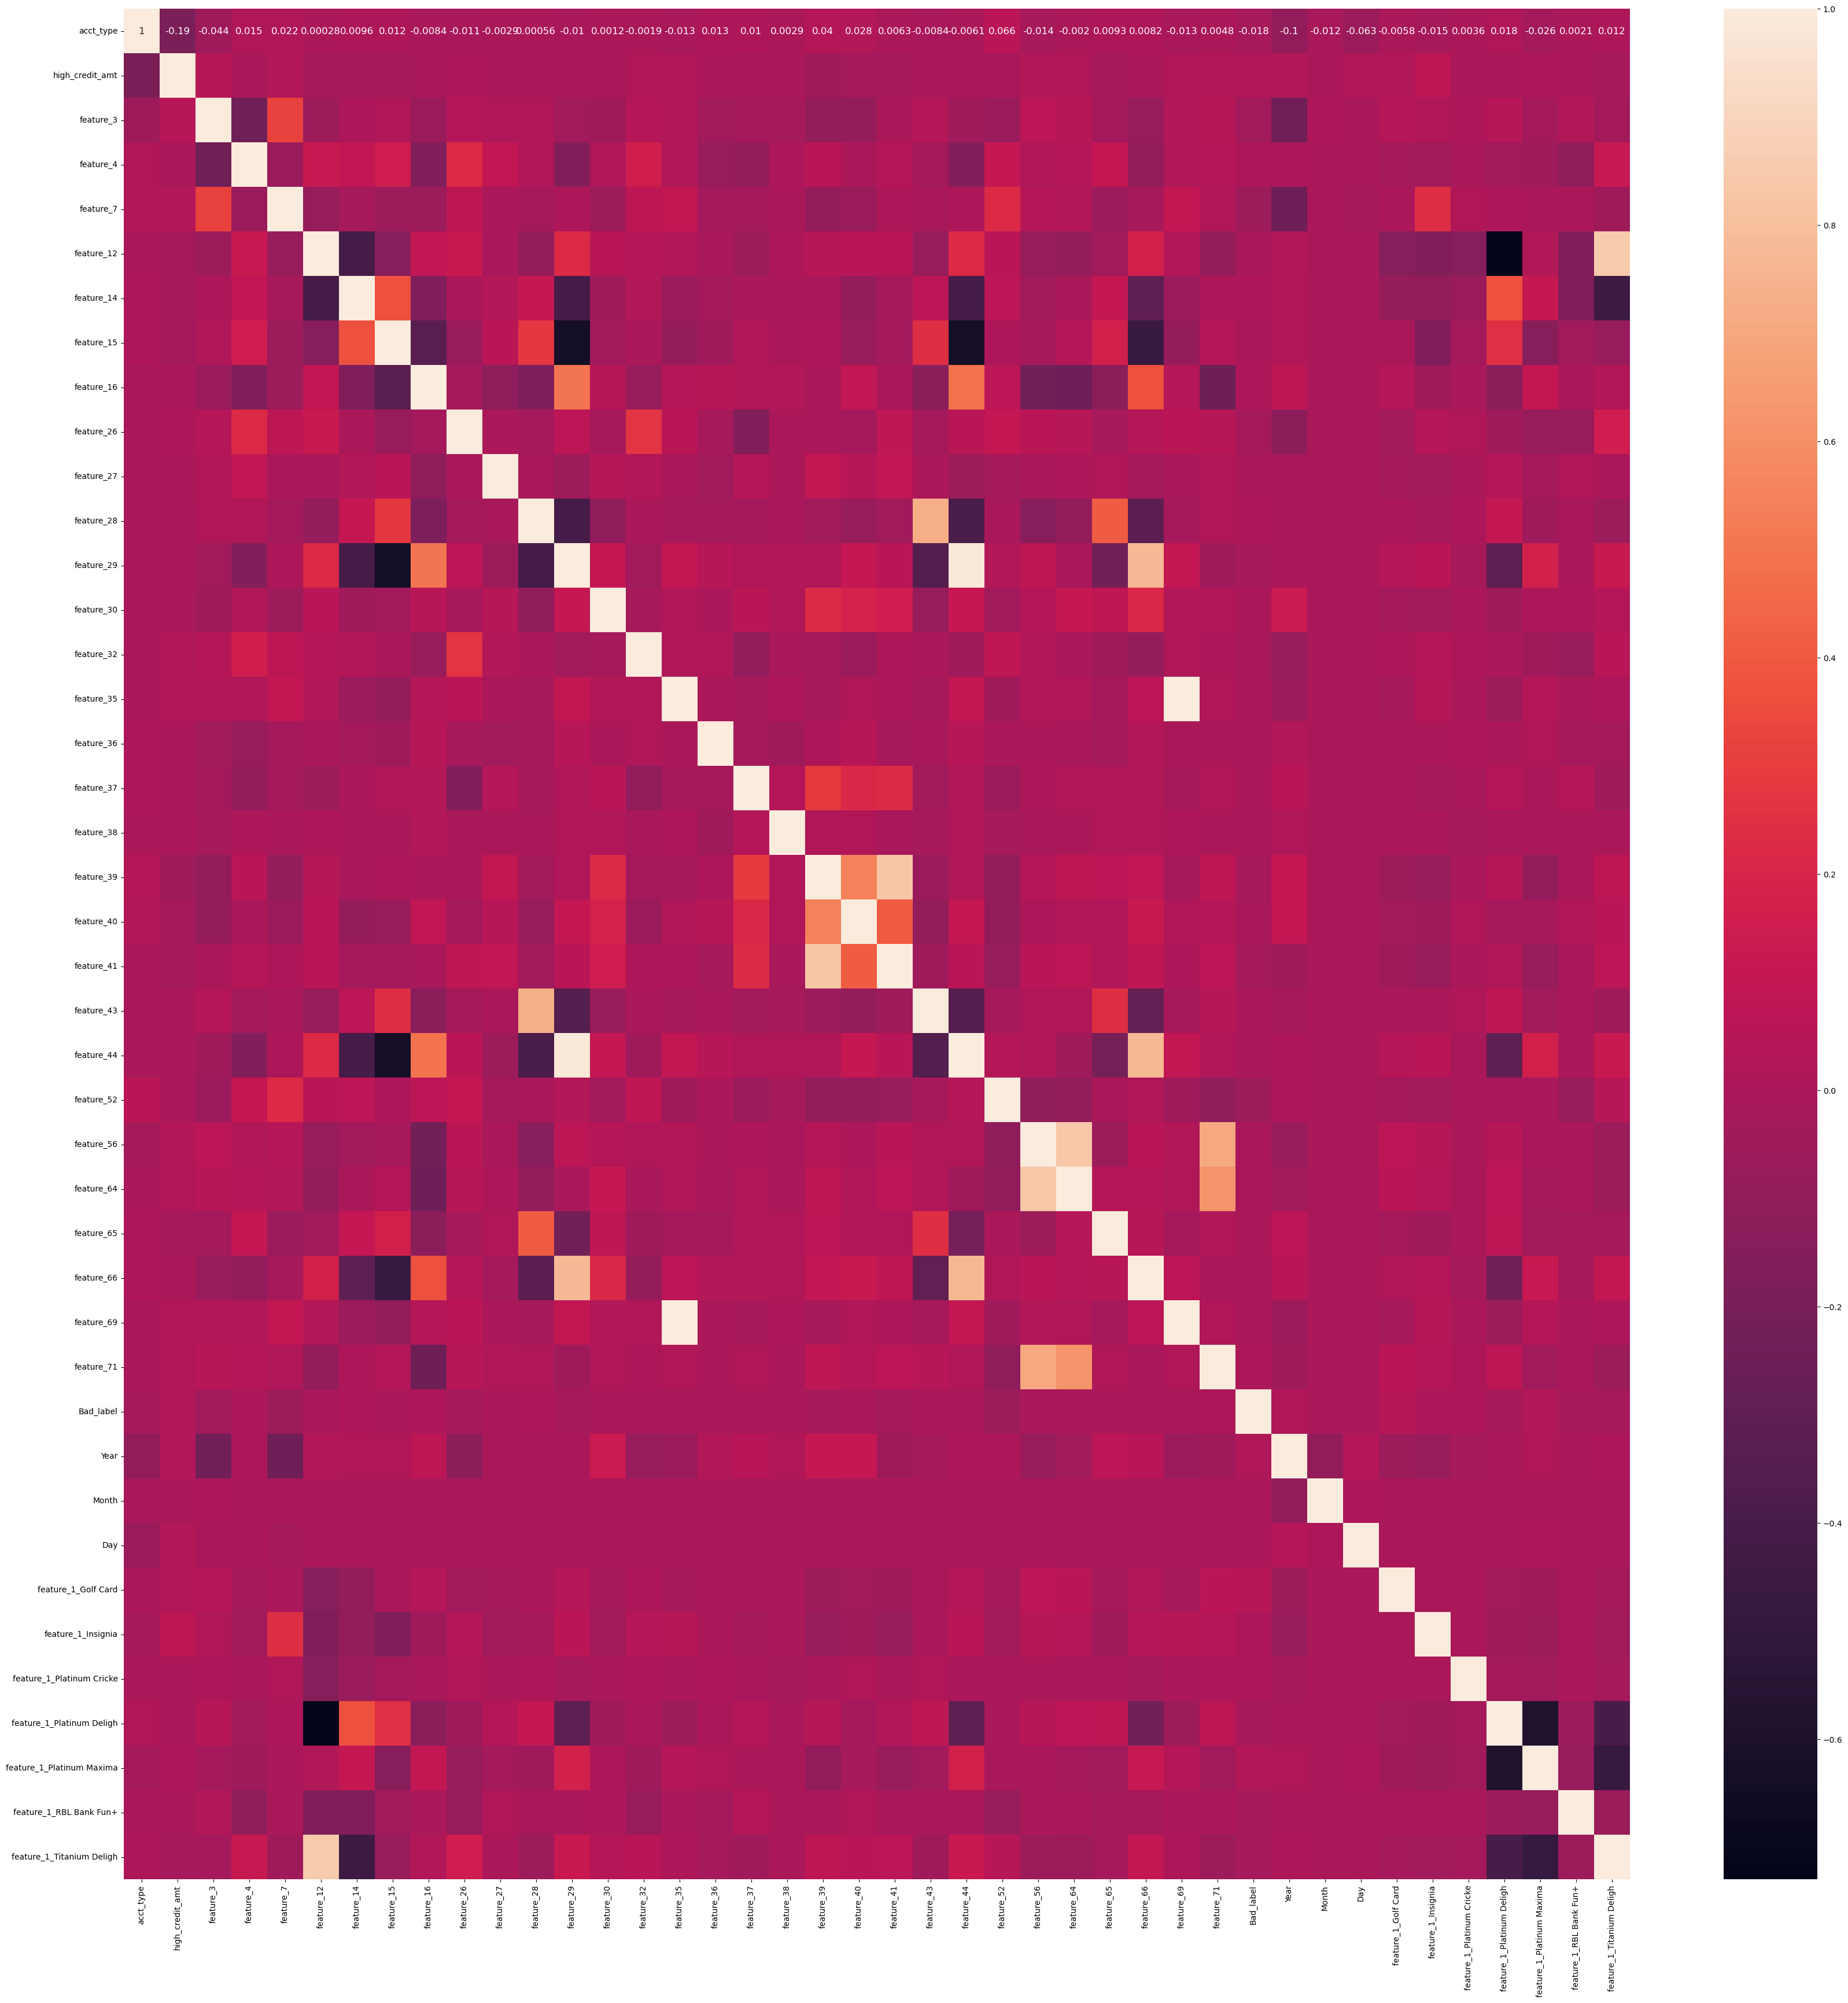

In [199]:
# Adjust figure size based on the number of columns (42 columns)
plt.figure(figsize=(42, 42))  # You can adjust the size based on your preference
sns.heatmap(data5.corr(), annot=True, annot_kws={"size": 12})
plt.show()

In [200]:
correlation_matrix=data5.corr() # calculation correlation matrix

In [201]:
for i in range(len(correlation_matrix.columns)):   # iterate over the correlation matrix and print coluns with correlation >0.50
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.90:
            col1=correlation_matrix.columns[i]
            col2=correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i,j]
            print(f"Correlation between {col1} and {col2} : {corr_value:.2f}")

Correlation between feature_44 and feature_29 : 0.99
Correlation between feature_69 and feature_35 : 1.00


In [202]:
data6 = data5.drop(["feature_35","feature_29","feature_44","feature_69"],axis=1) # drop columns
data6

,acct_type,high_credit_amt,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_30,feature_32,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_52,feature_56,feature_64,feature_65,feature_66,feature_71,Bad_label,Year,Month,Day,feature_1_Golf Card,feature_1_Insignia,feature_1_Platinum Cricke,feature_1_Platinum Deligh,feature_1_Platinum Maxima,feature_1_RBL Bank Fun+,feature_1_Titanium Deligh
0,6,20900.0,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,2006.0,2,6,7,4509,2009.0,1.0,4.0,28,0.0,10.0,10.0,157.0,110059.0,13.0,1,2013,6,9,0,0,0,0,1,0,0
1,10,16201.0,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,2006.0,2,6,7,4509,2009.0,1.0,4.0,28,0.0,10.0,10.0,157.0,110059.0,13.0,1,2012,5,25,0,0,0,0,1,0,0
2,10,41028.0,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,2006.0,2,6,7,4509,2009.0,1.0,4.0,28,0.0,10.0,10.0,157.0,110059.0,13.0,1,2012,3,22,0,0,0,0,1,0,0
3,10,93473.0,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,2009.0,4,6,1,2019,2013.0,1.0,2.0,21,0.0,13.0,13.0,39.0,121003.0,13.0,1,2006,1,13,0,0,0,1,0,0,0
4,6,20250.0,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,2009.0,4,6,1,2019,2013.0,1.0,2.0,21,0.0,13.0,13.0,39.0,121003.0,13.0,1,2015,1,18,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,10,24228.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,1995.0,4,6,1,2629,1999.0,0.0,11.0,31,0.0,2.0,2.0,14.0,500017.0,2.0,0,2007,5,2,0,0,0,0,0,0,1
186325,10,19584.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,1995.0,4,6,1,2629,1999.0,0.0,11.0,31,0.0,2.0,2.0,14.0,500017.0,2.0,0,2007,4,11,0,0,0,0,0,0,1
186326,10,50844.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,1995.0,4,6,1,2629,1999.0,0.0,11.0,31,0.0,2.0,2.0,14.0,500017.0,2.0,0,2006,11,20,0,0,0,0,0,0,1
186327,10,35587.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,1995.0,4,6,1,2629,1999.0,0.0,11.0,31,0.0,2.0,2.0,14.0,500017.0,2.0,0,2006,10,17,0,0,0,0,0,0,1


## Model Creation

In [203]:
x = data6.drop("Bad_label",axis=1)    # create variable for independent variable
y = data6.Bad_label  # create variable for dependent variable

In [204]:
x

,acct_type,high_credit_amt,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_30,feature_32,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_52,feature_56,feature_64,feature_65,feature_66,feature_71,Year,Month,Day,feature_1_Golf Card,feature_1_Insignia,feature_1_Platinum Cricke,feature_1_Platinum Deligh,feature_1_Platinum Maxima,feature_1_RBL Bank Fun+,feature_1_Titanium Deligh
0,6,20900.0,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,2006.0,2,6,7,4509,2009.0,1.0,4.0,28,0.0,10.0,10.0,157.0,110059.0,13.0,2013,6,9,0,0,0,0,1,0,0
1,10,16201.0,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,2006.0,2,6,7,4509,2009.0,1.0,4.0,28,0.0,10.0,10.0,157.0,110059.0,13.0,2012,5,25,0,0,0,0,1,0,0
2,10,41028.0,683.0,3.0,56000.0,10,12.0,303,360,0.0,6,42,2006.0,2,6,7,4509,2009.0,1.0,4.0,28,0.0,10.0,10.0,157.0,110059.0,13.0,2012,3,22,0,0,0,0,1,0,0
3,10,93473.0,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,2009.0,4,6,1,2019,2013.0,1.0,2.0,21,0.0,13.0,13.0,39.0,121003.0,13.0,2006,1,13,0,0,0,1,0,0,0
4,6,20250.0,687.0,3.0,125000.0,7,12,322,427,2.0,8,18,2009.0,4,6,1,2019,2013.0,1.0,2.0,21,0.0,13.0,13.0,39.0,121003.0,13.0,2015,1,18,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,10,24228.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,1995.0,4,6,1,2629,1999.0,0.0,11.0,31,0.0,2.0,2.0,14.0,500017.0,2.0,2007,5,2,0,0,0,0,0,0,1
186325,10,19584.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,1995.0,4,6,1,2629,1999.0,0.0,11.0,31,0.0,2.0,2.0,14.0,500017.0,2.0,2007,4,11,0,0,0,0,0,0,1
186326,10,50844.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,1995.0,4,6,1,2629,1999.0,0.0,11.0,31,0.0,2.0,2.0,14.0,500017.0,2.0,2006,11,20,0,0,0,0,0,0,1
186327,10,35587.0,746.0,3.0,138000.0,14,0,119,287,3.0,8,25,1995.0,4,6,1,2629,1999.0,0.0,11.0,31,0.0,2.0,2.0,14.0,500017.0,2.0,2006,10,17,0,0,0,0,0,0,1


In [205]:
y

0         1
1         1
2         1
3         1
4         1
         ..
186324    0
186325    0
186326    0
186327    0
186328    0
Name: Bad_label, Length: 186329, dtype: object

## PCA:- Principle Components Analysis

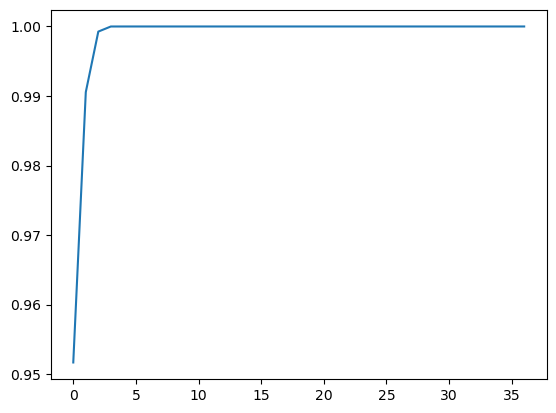

In [206]:
from sklearn.decomposition import PCA
pca = PCA()
principle_components = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [207]:
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.99)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36], dtype=int64),)

In [208]:
pca = PCA(n_components=37)
new_data = pca.fit_transform(x)

num_componets = 37

col_name = [f"Principle_components {i}" for i in range(1, num_componets + 1)]
principle_df = pd.DataFrame(data = new_data,columns=col_name)

In [209]:
principle_df

,Principle_components 1,Principle_components 2,Principle_components 3,Principle_components 4,Principle_components 5,Principle_components 6,Principle_components 7,Principle_components 8,Principle_components 9,Principle_components 10,Principle_components 11,Principle_components 12,Principle_components 13,Principle_components 14,Principle_components 15,Principle_components 16,Principle_components 17,Principle_components 18,Principle_components 19,Principle_components 20,Principle_components 21,Principle_components 22,Principle_components 23,Principle_components 24,Principle_components 25,Principle_components 26,Principle_components 27,Principle_components 28,Principle_components 29,Principle_components 30,Principle_components 31,Principle_components 32,Principle_components 33,Principle_components 34,Principle_components 35,Principle_components 36,Principle_components 37
0,-148538.392131,-162900.088980,-81466.377749,-23482.196411,1850.906379,461.369204,-52.002820,143.710259,24.594377,-35.721151,-9.676504,-1.224569,3.155286,-9.175953,10.829335,-4.070974,1.509179,0.968294,0.197851,2.530799,-1.839179,-2.492911,-1.188916,-3.397608,4.616680,1.355548,0.490230,-0.112776,-0.494918,0.964898,0.682544,-0.025047,-0.020229,0.002137,-0.004634,-0.002905,-3.155087e-12
1,-153237.370065,-162905.255033,-81453.163495,-23484.649820,1850.877216,461.183144,-52.015951,143.700210,24.590778,-35.753090,-9.665325,-1.315786,3.376201,6.699176,10.929315,-4.085092,1.566111,-0.321401,-2.550980,0.826869,1.110260,-3.517481,-1.055530,-3.221196,4.639300,1.313771,0.502268,-0.126034,-0.501987,0.964607,0.691755,-0.023876,-0.020073,0.002726,-0.005819,-0.002780,-2.995992e-12
2,-128410.486642,-162877.960380,-81522.980599,-23471.687411,1851.032742,462.159907,-51.966637,143.740086,24.632320,-35.772827,-9.666885,-1.302254,3.328130,3.681861,10.922183,-4.071707,1.563488,0.773526,-4.126731,0.620080,0.711156,-3.315131,-1.078862,-3.303091,4.653000,1.323977,0.500822,-0.138292,-0.503554,0.964209,0.692755,-0.023664,-0.020018,0.002726,-0.006040,-0.002800,-2.793654e-12
3,-75780.489449,-152599.310361,-12745.764024,-28502.392410,-651.163904,551.124506,-178.985517,163.858347,69.693175,-40.482781,-26.245847,4.587990,3.913097,-5.256031,-0.523753,1.127816,2.159230,-2.038144,-7.406359,-1.288470,-1.100574,-2.124242,-3.524440,-6.740479,-1.409883,-1.085886,2.669831,1.509290,-0.118903,-0.311513,-0.262286,0.100964,0.005798,-0.000364,-0.002591,-0.001585,8.892886e-14
4,-149003.145624,-152679.811272,-12539.850472,-28540.622759,-651.622046,548.246946,-179.125479,163.760703,69.586154,-40.590739,-26.334577,4.551702,4.279013,-0.003612,-0.478123,1.136592,2.325923,5.817558,-2.682270,1.016820,-2.031042,-3.160725,-2.998910,-4.920453,-1.655467,-1.131195,2.733440,1.758881,-0.062692,-0.286516,-0.277813,0.092569,0.000848,-0.001046,0.002091,-0.002488,-3.206324e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,-145393.021092,226179.239596,4273.736957,-31100.625241,-104.048885,371.430811,-126.725380,-56.914147,-81.561214,20.801239,3.407487,-25.743730,-3.152549,-15.966510,-3.388685,0.309129,-5.250575,-2.600386,-3.208153,-2.307772,-2.552203,-4.233176,1.633334,0.205093,-0.743633,-0.090595,2.597574,1.687650,0.106081,0.296408,-0.367423,0.032458,0.002864,-0.012860,0.011228,0.005348,-4.468870e-12
186325,-150036.999283,226174.134011,4286.796540,-31103.049936,-104.077803,371.247361,-126.736839,-56.921047,-81.566127,20.782749,3.408606,-25.795527,-3.004226,-6.976733,-3.342302,0.292367,-5.207016,-2.197025,-4.184186,-2.526048,-2.618236,-4.168250,1.607935,0.140157,-0.735951,-0.098517,2.599183,1.678243,0.106357,0.296768,-0.370631,0.032181,0.003196,-0.012768,0.010795,0.005355,-4.360678e-12
186326,-118777.146063,226208.501063,4198.888903,-31086.728833,-103.881904,372.475705,-126.677764,-56.872985,-81.510645,20.757939,3.419641,-25.868561,-2.891777,2.035503,-3.327230,0.241672,-5.215820,-6.828091,0.934799,-1.929704,-1.43330

### Scalling Technique

* Scaling is very important of continous features because some model give more priproty to that features which has higest values campare to another features. that's why we use Scaling to make all values into certain range.
 
* Basically there are 2 type of scaling.

1. **MinMax Scaling**
2. **Standardization Scaling**

* MinMax Scaling transform all data between 0 to 1  range.
* Standardization Scaling transform all data between -3 to +3 range. it use z-score to tranform data.

In [210]:
from sklearn.preprocessing import StandardScaler # import min-max scaling
SE = StandardScaler()# call scaling
df1 = SE.fit_transform(principle_df) # apply scaling
df1

array([[-0.15457601, -0.83870904, -0.88641269, ..., -0.09128548,
        -0.31914427, -0.58680606],
       [-0.15946598, -0.83873564, -0.88626891, ..., -0.11462971,
        -0.3054414 , -0.55721658],
       [-0.13362997, -0.83859511, -0.88702857, ..., -0.11897392,
        -0.30762454, -0.51958446],
       ...,
       [-0.12360506,  1.16465937,  0.04568693, ...,  0.21908227,
         0.60838382, -0.93277375],
       [-0.13948213,  1.16457301,  0.04615376, ...,  0.21756598,
         0.60655173, -0.91459264],
       [-0.14945877,  1.16451875,  0.04644711, ...,  0.20288752,
         0.62005288, -0.92338895]])

In [211]:
principle_df.columns # show columns anme

Index(['Principle_components 1', 'Principle_components 2',
       'Principle_components 3', 'Principle_components 4',
       'Principle_components 5', 'Principle_components 6',
       'Principle_components 7', 'Principle_components 8',
       'Principle_components 9', 'Principle_components 10',
       'Principle_components 11', 'Principle_components 12',
       'Principle_components 13', 'Principle_components 14',
       'Principle_components 15', 'Principle_components 16',
       'Principle_components 17', 'Principle_components 18',
       'Principle_components 19', 'Principle_components 20',
       'Principle_components 21', 'Principle_components 22',
       'Principle_components 23', 'Principle_components 24',
       'Principle_components 25', 'Principle_components 26',
       'Principle_components 27', 'Principle_components 28',
       'Principle_components 29', 'Principle_components 30',
       'Principle_components 31', 'Principle_components 32',
       'Principle_components 33',

In [212]:
# apply columns name to scaled data
x1 = pd.DataFrame(data = df1,columns=['Principle_components 1', 'Principle_components 2',
       'Principle_components 3', 'Principle_components 4',
       'Principle_components 5', 'Principle_components 6',
       'Principle_components 7', 'Principle_components 8',
       'Principle_components 9', 'Principle_components 10',
       'Principle_components 11', 'Principle_components 12',
       'Principle_components 13', 'Principle_components 14',
       'Principle_components 15', 'Principle_components 16',
       'Principle_components 17', 'Principle_components 18',
       'Principle_components 19', 'Principle_components 20',
       'Principle_components 21', 'Principle_components 22',
       'Principle_components 23', 'Principle_components 24',
       'Principle_components 25', 'Principle_components 26',
       'Principle_components 27', 'Principle_components 28',
       'Principle_components 29', 'Principle_components 30',
       'Principle_components 31', 'Principle_components 32',
       'Principle_components 33', 'Principle_components 34',
       'Principle_components 35', 'Principle_components 36',
       'Principle_components 37'])
x1

,Principle_components 1,Principle_components 2,Principle_components 3,Principle_components 4,Principle_components 5,Principle_components 6,Principle_components 7,Principle_components 8,Principle_components 9,Principle_components 10,Principle_components 11,Principle_components 12,Principle_components 13,Principle_components 14,Principle_components 15,Principle_components 16,Principle_components 17,Principle_components 18,Principle_components 19,Principle_components 20,Principle_components 21,Principle_components 22,Principle_components 23,Principle_components 24,Principle_components 25,Principle_components 26,Principle_components 27,Principle_components 28,Principle_components 29,Principle_components 30,Principle_components 31,Principle_components 32,Principle_components 33,Principle_components 34,Principle_components 35,Principle_components 36,Principle_components 37
0,-0.154576,-0.838709,-0.886413,-0.881763,1.324228,0.517504,-0.345652,1.183924,0.379305,-1.322661,-0.655618,-0.091308,0.263642,-1.035851,1.673491,-0.744528,0.307358,0.262403,0.058891,0.765432,-0.595337,-0.853851,-0.483434,-1.477254,2.291467,0.717429,0.377678,-0.096911,-0.611042,1.248589,1.193713,-0.137716,-0.244017,0.040434,-0.091285,-0.319144,-0.586806
1,-0.159466,-0.838736,-0.886269,-0.881856,1.324207,0.517296,-0.345739,1.183841,0.379249,-1.323844,-0.654861,-0.098110,0.282100,0.756254,1.688941,-0.747110,0.318953,-0.087098,-0.759302,0.250084,0.359388,-1.204778,-0.429197,-1.400551,2.302694,0.695319,0.386952,-0.108303,-0.619770,1.248212,1.209823,-0.131279,-0.242142,0.051592,-0.114630,-0.305441,-0.557217
2,-0.133630,-0.838595,-0.887029,-0.881369,1.324318,0.518391,-0.345411,1.184170,0.379890,-1.324575,-0.654966,-0.097101,0.278084,0.415636,1.687839,-0.744662,0.318418,0.209622,-1.228326,0.187541,0.230199,-1.135471,-0.438684,-1.436159,2.309494,0.700720,0.385838,-0.118837,-0.621705,1.247697,1.211571,-0.130113,-0.241474,0.051586,-0.118974,-0.307625,-0.519584
3,-0.078861,-0.785674,-0.138683,-1.070273,-0.465874,0.618180,-1.189679,1.349909,1.074837,-1.498972,-1.778251,0.342097,0.326961,-0.593341,-0.080937,0.206263,0.439747,-0.552328,-2.204512,-0.389693,-0.356252,-0.727578,-1.433100,-2.930708,-0.699788,-0.574710,2.056863,1.296959,-0.146802,-0.403101,-0.458717,0.555137,0.069934,-0.006890,-0.051029,-0.174160,0.016536
4,-0.155060,-0.786089,-0.136443,-1.071709,-0.466202,0.614952,-1.190609,1.349105,1.073187,-1.502970,-1.784262,0.339391,0.357535,-0.000408,-0.073886,0.207868,0.473695,1.576534,-0.798381,0.307534,-0.657442,-1.082585,-1.219410,-2.139375,-0.821683,-0.598689,2.105868,1.511437,-0.077402,-0.370754,-0.485873,0.508980,0.010232,-0.019795,0.041192,-0.273275,-0.059636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,-0.151303,1.164509,0.046501,-1.167838,-0.074442,0.416623,-0.842317,-0.468874,-1.257871,0.770216,0.230870,-1.919545,-0.263413,-1.802421,-0.523664,0.056536,-1.069327,-0.704694,-0.954911,-0.697978,-0.826140,-1.449912,0.664143,0.089173,-0.369099,-0.047948,2.001195,1.450228,0.130972,0.383555,-0.642592,0.178468,0.034542,-0.243346,0.221179,0.587505,-0.831152
186325,-0.156136,1.164482,0.046643,-1.167929,-0.074462,0.416417,-0.842393,-0.468931,-1.257947,0.769531,0.230945,-1.923407,-0.251020,-0.787586,-0.516496,0.053470,-1.060456,-0.595384,-1.245428,-0.763995,-0.847515,-1.427675,0.653815,0.060939,-0.365286,-0.052140,2.002435,1.442143,0.131312,0.384021,-0.648203,0.176942,0.038553,-0.241615,0.212633,0.588237,-0.811029
186326,-0.123605,1.164659,0.045687,-1.167316,-0.074322,0.417795,-0.842000,-0.468535,-1.257091,0.768613,0.231693,-1.928853,-0.241624,0.229783,-0.514167,0.044199,-1.062249,-1.850384,0.278244,-0.583633,-0.463956,-1.584866,0.655400,0.073334,-0.374029,-0.065556,1.998512,1.450910,0.128197,0.381102,-0.654849,0.181739,0.048342,-0.245749,0.219082,0.608384,-0.932774
186327,-0.139482,1.164573,0.046154,-1.167615,-0.074391,0.417122,-0.842195,-0.468738,-1.257514,0.769408

In [213]:
y1 = data6.Bad_label  # create variable for dependent variable

In [214]:
y1

0         1
1         1
2         1
3         1
4         1
         ..
186324    0
186325    0
186326    0
186327    0
186328    0
Name: Bad_label, Length: 186329, dtype: object

In [215]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=40)

In [216]:
x_train

,Principle_components 1,Principle_components 2,Principle_components 3,Principle_components 4,Principle_components 5,Principle_components 6,Principle_components 7,Principle_components 8,Principle_components 9,Principle_components 10,Principle_components 11,Principle_components 12,Principle_components 13,Principle_components 14,Principle_components 15,Principle_components 16,Principle_components 17,Principle_components 18,Principle_components 19,Principle_components 20,Principle_components 21,Principle_components 22,Principle_components 23,Principle_components 24,Principle_components 25,Principle_components 26,Principle_components 27,Principle_components 28,Principle_components 29,Principle_components 30,Principle_components 31,Principle_components 32,Principle_components 33,Principle_components 34,Principle_components 35,Principle_components 36,Principle_components 37
96437,-0.137237,-0.783013,-0.494956,1.089342,0.019009,0.739653,-0.368838,-0.987371,0.073244,-0.852237,-1.073994,-0.426072,-1.356495,-0.190218,-1.017256,0.569854,0.088858,-0.218126,-0.497689,-0.588161,2.080574,1.847616,0.196920,-0.467955,-0.770987,0.008859,0.686095,-1.720748,-1.940299,-0.992289,1.336767,-0.166515,-0.373159,0.135605,0.070558,0.126159,1.989110
114006,1.073066,0.644561,2.668996,0.270844,-0.065505,-1.379269,-1.052498,1.051086,-0.206736,0.806096,0.708099,1.460872,0.960836,-0.302017,0.945023,-0.386451,1.130337,0.745557,2.496434,1.045793,-0.513997,-0.149762,0.803795,-0.232469,0.244161,0.117866,-0.280399,-1.438056,-1.044065,0.333225,0.351051,0.143269,0.327486,-0.527672,0.246353,0.236675,0.482813
32908,0.136031,-0.840304,-0.298118,-1.026091,-0.051063,-1.644751,0.463218,-0.325183,0.134993,1.755640,0.220031,-0.684282,0.252507,0.118811,-0.092652,-0.091842,0.282343,-0.759553,1.381694,0.749887,-1.416713,0.891868,0.166636,-0.815309,0.171220,0.223126,-0.647317,-1.208296,-1.313743,0.022941,0.976727,0.013295,-0.196397,-0.011353,-0.067402,0.229072,0.740457
31886,-0.157068,-0.858040,3.204754,0.160404,-0.044280,-1.254467,0.307862,0.293476,-1.819666,-0.135089,0.677076,-0.743834,-1.557763,0.669378,-0.290634,-0.187086,-1.558167,1.160325,0.040937,-0.374342,0.842764,-0.412184,-0.652903,0.129486,0.042692,-0.050126,-0.385974,-1.293211,-1.282122,0.181175,1.227011,1.364544,0.170851,-0.680268,0.540872,0.935546,0.764089
126062,-0.145177,-0.839519,-0.767313,-0.911319,-0.047107,-1.689303,0.443989,-0.372422,0.069837,-2.086356,0.565807,-0.834324,-1.974391,-0.993674,-0.380410,-0.174652,0.491092,-0.089403,1.544859,0.427680,-0.061760,0.055742,-0.532694,0.572406,-0.276845,-0.139864,-0.248309,0.128053,1.423229,-0.163965,-1.093286,0.539128,0.228708,-0.122070,0.034191,-0.147778,-0.722096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56760,-0.161159,0.654397,-0.875800,-0.922733,-1.212668,0.445773,-0.039466,-2.387515,-0.389212,-0.757759,0.990349,0.220206,0.348583,1.466526,0.449931,-0.337279,1.019546,1.158871,-1.098677,0.261002,-0.873677,-0.687342,0.196737,-1.012111,-0.555699,0.905479,-0.620444,-0.736896,0.583083,0.845627,0.896871,-0.129303,0.144645,-0.158179,0.050492,0.344413,-0.746761
93176,-0.138762,-0.839659,-0.409307,1.069120,1.919397,0.704945,0.342921,-0.626500,-0.146286,0.282529,0.637238,-0.811977,-1.285927,-1.181133,-0.389120,-0.183984,0.202141,-0.339635,1.703463,0.663515,-0.213180,-0.476815,-0.040308,-0.965660,-0.513560,-0.099827,-0.577724,-0.259821,-1.019173,1.438489,1.493830,-0.167920,-0.151632,0.071748,0.053012,0.026877,-0.774120
30727,-0.032719,0.656972,-0.695041,-0.966854,-0.054446,0.437821,1.039294,0.505228,-0.308019,-0.871172,0.098515,0.940394,0.593501,0.782920,0.116274,0.059028,0.752334,0.108858,-0.377166,0.451303,0.940178,0.512822,1.258121,1.213548,-0.060425,-2.771658,-0.503373,0.997346,0.626472,-0.439784,1.159813,-0.087993,0.019028,0.001012,0.066018,0.320092,0.132912
112859,-0.145537,1.169500,-0.723994,1.096910,-0.045704,-1.712466,0.035314,-2.426909,-0.727723,-1.902869,-

In [217]:
x_test

,Principle_components 1,Principle_components 2,Principle_components 3,Principle_components 4,Principle_components 5,Principle_components 6,Principle_components 7,Principle_components 8,Principle_components 9,Principle_components 10,Principle_components 11,Principle_components 12,Principle_components 13,Principle_components 14,Principle_components 15,Principle_components 16,Principle_components 17,Principle_components 18,Principle_components 19,Principle_components 20,Principle_components 21,Principle_components 22,Principle_components 23,Principle_components 24,Principle_components 25,Principle_components 26,Principle_components 27,Principle_components 28,Principle_components 29,Principle_components 30,Principle_components 31,Principle_components 32,Principle_components 33,Principle_components 34,Principle_components 35,Principle_components 36,Principle_components 37
154411,-0.147924,2.925424,-0.794767,-1.001381,-0.102481,0.216489,4.641025,0.366430,0.784796,-1.449298,0.104276,-1.283425,-0.124855,-1.132036,-0.895792,1.197545,0.743383,0.396860,-1.313715,1.184125,0.296093,-1.294448,-0.105506,-0.783636,-0.041254,0.052158,-0.667043,-0.322232,0.585637,0.097804,1.032275,-0.229459,0.030958,-0.053375,0.051366,-0.184980,-0.633265
20390,-0.136534,-0.375887,0.468808,0.836384,0.412034,0.763684,0.729123,-0.500092,0.090323,0.118335,0.418090,-0.778221,0.770803,1.405694,-0.038162,0.486818,0.235460,1.411601,0.877464,2.059608,-0.610611,2.514207,-0.100153,0.167706,1.997185,0.605921,-0.636180,-0.042288,0.671434,0.948923,1.088534,-0.134503,-0.129897,0.033748,0.145359,-0.102436,-1.063614
123408,-0.129003,-0.842615,0.176395,0.922262,-0.011722,-1.461276,0.325391,-0.379773,-2.948557,1.085530,0.487562,0.568467,0.543985,-1.341262,1.520841,2.741254,0.916715,-0.770548,-0.049027,-1.520852,-0.092008,0.253485,0.403583,-0.464225,0.393062,0.142096,-0.526678,-1.109737,0.427213,-1.480493,0.744876,0.095439,0.175587,-0.225693,0.207938,0.583520,0.944403
103493,-0.137582,-0.842125,0.100691,0.941202,-0.010480,-1.466934,-0.129180,1.152776,0.432320,0.532635,-1.000277,0.868509,0.033040,0.117181,3.558869,1.568938,0.100996,0.730519,-0.853322,-1.243819,0.923500,-0.680184,0.654835,0.629573,0.059544,0.073222,-0.283459,-0.950114,-0.256461,1.698465,1.080211,-0.134674,-0.074748,0.270338,-0.304939,-0.341245,-0.998694
113725,-0.099890,-0.374520,0.304887,-1.192711,-0.043934,0.589944,-0.098024,-0.829328,0.430848,-0.240719,0.721744,2.168588,0.284521,1.368162,0.742687,-0.337260,0.639846,-0.730841,-1.823150,0.080904,0.080608,0.233952,-0.403246,0.161863,-0.941486,0.894808,-0.734779,-1.509393,-1.458127,-0.313755,-0.995010,0.392866,0.016599,-0.100424,-0.109975,0.559248,1.452483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43781,0.112798,1.165897,0.092997,-1.176510,-0.073426,0.434175,-1.384577,1.088795,0.137033,-0.758403,1.554527,-1.485907,-1.901188,1.161008,-2.365346,1.104026,1.352269,0.200451,-1.018460,-0.773605,-1.071967,2.065381,0.969719,0.422597,0.041797,-2.985176,1.861817,-0.014908,1.404720,0.038268,0.758512,-0.032414,0.140333,-0.114694,0.097009,0.094574,-0.912548
74234,-0.136781,-0.838331,-0.756619,1.156500,1.835617,0.684692,-0.312063,1.007681,0.256642,0.509176,0.559004,-0.265180,-1.231650,1.037974,-0.188237,-0.209736,0.192626,-0.304454,-1.622662,-0.551075,1.584200,0.970495,-0.454467,-1.151602,1.896752,1.545663,-0.398328,-0.425569,-0.873204,0.677072,1.270934,-0.280429,-0.324182,0.256819,-0.235823,-0.080618,0.090851
150028,-0.000009,1.146284,4.133154,-0.122854,-0.096540,-1.374666,-1.083458,1.308961,0.424864,-0.142959,-0.217493,-0.917739,1.320273,-1.443152,-0.035175,0.150675,-1.176635,-0.102046,-0.259584,-0.549033,0.211913,-0.365314,-0.803142,-0.310729,-0.167188,-0.111256,-0.181374,0.659577,-1.210444,-0.411906,1.201361,1.409384,0.344165,-0.634606,0.458682,0.563491,0.853776
4210,-0.128392,-0.385835,2.790818,0.252749,-0.050073,-1.325483,0.191208,-0.840034,0.576164,1.125248,0.664944

### Data Balancing Technique

* Data balancing techniques are methods used to address the issue of imbalanced datasets, where the classes (labels) are not represented equally.

**Resampling Techniques:**

* Oversampling: This involves increasing the number of instances in the minority class by duplicating existing samples or generating synthetic examples (e.g., using the SMOTE algorithm).
* Undersampling: This method reduces the number of instances in the majority class, which can be done randomly or by selecting representative samples.

In [218]:
from imblearn.over_sampling import SMOTE # assign SMOTE for handling unbalanced data
SM = SMOTE()
x_train_smote,y_train_smote = SM.fit_resample(x_train,y_train)  # balancing data 

In [219]:
from collections import Counter # checking data balanced or not
print("Before",Counter(y_test))
print("After",Counter(y_train_smote))

Before Counter({'0': 44946, '1': 1637})
After Counter({'0': 134770, '1': 134770})


## Model Selection Logistic Regression Algorithm

In [220]:
from sklearn.linear_model import LogisticRegression # import the model
LR = LogisticRegression() # call the model
LR.fit(x_train_smote,y_train_smote) #train the model

LogisticRegression()

In [221]:
y_lr = LR.predict(x_test)  # predict the test data

In [222]:
# import libraryies for model evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,recall_score,precision_score

In [223]:
a1 = accuracy_score(y_test,y_lr)  # check model performance for testing data
a1

0.5974926475323616

In [224]:
y_trlr = LR.predict(x_train)  # predict the training data

In [225]:
t1 = accuracy_score(y_train,y_trlr) # check model performance for training data
t1

0.5980421622085784

In [226]:
f1 = f1_score(y_test,y_lr,average="weighted") # check f1 score
f1

0.7182072640825335

In [227]:
y_test = y_test.astype(int) # change data type into int

In [228]:
y_lr = y_lr.astype(int) # change data type into int

In [229]:
r1 = recall_score(y_test,y_lr) # check recall score
r1

0.6450824679291387

In [230]:
p1 = precision_score(y_test,y_lr) # check precision score
p1

0.05492847854356307

In [231]:
print(classification_report(y_test,y_lr)) # show classification report

              precision    recall  f1-score   support

           0       0.98      0.60      0.74     44946
           1       0.05      0.65      0.10      1637

    accuracy                           0.60     46583
   macro avg       0.52      0.62      0.42     46583
weighted avg       0.95      0.60      0.72     46583



### Hyperparamter of Logisitic Regression

In [232]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

# Define the hyperparameters and the values to search
grid1 = {
    'C': [100,200,500],    # Regularization strength
    'penalty': ['l1', 'l2'],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] # Regularization types
}

# Set up GridSearchCV
rd1 = GridSearchCV(model, param_grid=grid1, cv=5, scoring='accuracy')
rd1.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [233]:
y_hylr = rd1.predict(x_test)   # predict the test data

In [234]:
y_hylr = y_hylr.astype(int) #change data type into int

In [235]:
accuracy_score(y_test,y_hylr)  # check model performance for testing data

0.5974926475323616

In [236]:
y_trhylr = rd1.predict(x_train) # predict the training data

In [237]:
y_trhylr = y_trhylr.astype(int) #change data type into int

In [238]:
y_train = y_train.astype(int) #change data type into int

In [239]:
accuracy_score(y_train,y_trhylr)  # check model performance for training data

0.5980206946889356

In [240]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test, y_hylr)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 24.084182360038863


In [241]:
accuracies = []

# Assuming x1 and y1 are your features and target variables
for random_state in range(1, 151):
    # Split the data with the current random_state
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=random_state)
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
    model.fit(x_train, y_train)  # Using x_train and y_train directly
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy and store it
    a10 = accuracy_score(y_test, y_pred)
    accuracies.append((random_state, a10))

# Find the best random_state with the highest accuracy
best_random_state, best_accuracy = max(accuracies, key=lambda x: x[1])

# Print the best random state and its accuracy
print(f"Best Random State: {best_random_state}, Best Accuracy: {best_accuracy:.4f}")

Best Random State: 94, Best Accuracy: 0.9663


In [242]:
y_rtrlr = model.predict(x_train) # predict the training data

In [243]:
t10 = accuracy_score(y_train,y_rtrlr)  # check model performance for training data
t10

0.9647503327465544

## SVM:- Support Vectore Machine ALgorithm

**Note:-**
* We are not using the Support Vector Machine (SVM) algorithm because it has a high computational cost, especially with large datasets. SVM needs significant processing power and memory, which can slow down the training process. Additionally, it uses complex mathematical computations that increase runtime. For larger datasets or ones with many features, SVM becomes less efficient compared to other algorithms. Therefore, to save time and resources, We are opting for faster models.

## Desicion Tree Algorithm

In [244]:
from sklearn.tree import DecisionTreeClassifier  # import the model
DT = DecisionTreeClassifier() # call model
DT.fit(x_train_smote,y_train_smote) # train model

DecisionTreeClassifier()

In [245]:
y_dt = DT.predict(x_test) # predict the test data

In [246]:
y_test = y_test.astype(int) # change data type into int

In [247]:
y_dt = y_dt.astype(int) # change data type into int

In [248]:
accuracy_score(y_test,y_dt) # check model performance for testing data

0.9785758753193226

In [249]:
f1_score(y_test,y_dt,average="weighted") # check f1 score

0.9799817278411574

In [250]:
y_trdt = DT.predict(x_train)  # predict the training data

In [251]:
y_trdt = y_trdt.astype(int)

In [252]:
accuracy_score(y_train,y_trdt) # check model performance for training data

1.0

In [253]:
y_dt = y_dt.astype(int) # change data type into int

In [254]:
recall_score(y_test,y_dt) # check recall score

0.8540012217470984

In [255]:
precision_score(y_test,y_dt) # check precision score

0.6481223922114048

In [256]:
print(classification_report(y_test,y_dt)) # show classification report

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     44946
           1       0.65      0.85      0.74      1637

    accuracy                           0.98     46583
   macro avg       0.82      0.92      0.86     46583
weighted avg       0.98      0.98      0.98     46583



### Hyperparmater of Desicion Tree Algorithm

In [257]:
# Apply hyper-parameter tunnign
from sklearn.model_selection import GridSearchCV # import grid seaarch cv

# Define the model
dt_model = DecisionTreeClassifier() # call model

# Set up the hyperparameter grid
grid1 = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search1 = GridSearchCV(estimator=dt_model, param_grid=grid1, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search1.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [258]:
y_hydt = grid_search1.predict(x_test) # predict the test data

In [260]:
a2 = accuracy_score(y_test,y_hydt) # check model performance for testing data
a2

0.9741751282656763

In [261]:
y_trhydt = grid_search1.predict(x_train)  # predict the training data

In [262]:
y_trhydt = y_trhydt.astype(int)

In [263]:
t2 = accuracy_score(y_train,y_trhydt) # check model performance for training data
t2

0.99814663747084

In [264]:
f2 = f1_score(y_test,y_hydt,average="weighted") # check f1 score
f2

0.976186073455079

In [265]:
r2 = recall_score(y_test,y_hydt) # check recall score
r2

0.8271227855833843

In [266]:
p2 = precision_score(y_test,y_hydt) # check precision score
p2

0.5954265611257695

In [267]:
print(classification_report(y_test,y_hydt)) # show classification report

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     44946
           1       0.60      0.83      0.69      1637

    accuracy                           0.97     46583
   macro avg       0.79      0.90      0.84     46583
weighted avg       0.98      0.97      0.98     46583



In [268]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_hydt)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 80.66537783302361


## KNN:- Nearest Neighbors Algorithm

In [269]:
from sklearn.neighbors import KNeighborsClassifier  # import the model
KNN = KNeighborsClassifier() # call model
KNN.fit(x_train_smote,y_train_smote)# train model

KNeighborsClassifier()

In [270]:
y_knn = KNN.predict(x_test) # predict the test data

In [271]:
a3 = accuracy_score(y_test,y_knn) # check model performance for testing data
a3

0.9687224953309147

In [272]:
y_trknn = KNN.predict(x_train)  # predict the training data

In [273]:
t3 = accuracy_score(y_train,y_trknn) # check model performance for training data
t3

0.9826757116482762

In [274]:
f3 = f1_score(y_test,y_knn,average="weighted") # check f1 score
f3

0.9728484987826022

In [275]:
print(classification_report(y_test,y_knn)) # show classification report

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     44946
           1       0.53      0.94      0.68      1637

    accuracy                           0.97     46583
   macro avg       0.76      0.95      0.83     46583
weighted avg       0.98      0.97      0.97     46583



In [276]:
y_knn = y_knn.astype(int) # change data type into int
y_test = y_test.astype(int)

In [277]:
r3 = recall_score(y_test,y_knn) # check recall score
r3

0.9401343921808186

In [278]:
p3 = precision_score(y_test,y_knn) # check precision score
p3

0.531055900621118

### Hyperparamter of KNN Algorithm

In [279]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
model1 = KNeighborsClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_neighbors': [1,5,10,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_dist,
    n_iter=50,               # Number of parameter settings sampled
    scoring='accuracy',      # Scoring metric
    cv=5,                    # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                # Use all available cores
)

# Fit the model
random_search.fit(x_train_smote,y_train_smote)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 5, 10, 20],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [280]:
y_hyknn = random_search.predict(x_test) # predict the test data

In [281]:
accuracy_score(y_test,y_hyknn) # check model performance for testing data

0.9512467624614216


In [282]:
y_hytrknn = random_search.predict(x_train) # predict the training data

In [283]:
accuracy_score(y_train,y_hytrknn) # check model performance for training data

0.9612457213451364


In [284]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_knn)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 90.98981086405702


## Bagging Algorithm

In [285]:
from sklearn.ensemble import BaggingClassifier  # import the model
BG = BaggingClassifier() # call model
BG.fit(x_train_smote,y_train_smote) # train model

BaggingClassifier()

In [286]:
y_bg = BG.predict(x_test) # predict the test data

In [287]:
y_bg = y_bg.astype(int) # change data type into int

In [288]:
a4 = accuracy_score(y_test,y_bg) # check model performance for testing data
a4

0.9936886847133074

In [289]:
y_trbg = BG.predict(x_train)  # predict the training data

In [290]:
t4 = accuracy_score(y_train,y_trbg) # check model performance for training data
t4

0.9999713766404763

In [291]:
f4 = f1_score(y_test,y_bg,average="weighted") # check f1 score
f4

0.993530088824475

In [292]:
y_bg = y_bg.astype(int) # change data type into int

In [293]:
r4 = recall_score(y_test,y_bg) # check recall score
r4

0.8607208307880269

In [294]:
p4 = precision_score(y_test,y_bg) # check precision score
p4

0.9552542372881356

In [295]:
print(classification_report(y_test,y_bg)) # show classification report

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44946
           1       0.96      0.86      0.91      1637

    accuracy                           0.99     46583
   macro avg       0.98      0.93      0.95     46583
weighted avg       0.99      0.99      0.99     46583



### Hyperparamter of Bagging Algorithm

In [296]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the base model
base_model = DecisionTreeClassifier()

# Define the Bagging model with base estimator
bagging_model = BaggingClassifier()

# Define the hyperparameter grid
param_dist2 = {
    'n_estimators': [100,200],            # Number of base models in the ensemble
    'max_samples': [0.5, 0.7, 1.0],              # Fraction of training samples to use
    'max_features': [0.5, 0.7, 1.0]  # Maximum depth of each base estimator
}

# Setup RandomizedSearchCV
random_search2= RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_dist2,
    n_iter=50,               # Number of parameter settings sampled
    scoring='accuracy',      # Scoring metric
    cv=5,                    # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                # Use all available cores
)

# Fit the model
random_search2.fit(x_train_smote,y_train_smote) 

In [297]:
y_hybg= random_search2.predict(x_test) # predict the test data

In [298]:
accuracy_score(y_test,y_hybg) # check model performance for testing data

0.9901420134795214


In [299]:
y_hytrbg = random_search2.predict(x_train) # predict the training data

In [300]:
accuracy_score(y_train,y_hytrbg) # check model performance for training data

0.9970435972013458


In [301]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_bg)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 85.92524020068228


## Random Forest Algorithm

In [302]:
from sklearn.ensemble import RandomForestClassifier  # import the model
RM = RandomForestClassifier() # call model 
RM.fit(x_train_smote,y_train_smote) # train model

RandomForestClassifier()

In [303]:
y_rm = RM.predict(x_test) # predict the test data

In [304]:
y_rm = y_rm.astype(int) # change data type into int

In [305]:
a5 = accuracy_score(y_test,y_rm) # check model performance for testing data
a5

0.9962217976515038

In [306]:
y_trrm = RM.predict(x_train)  # predict the training data

In [307]:
t5 = accuracy_score(y_train,y_trrm) # check model performance for training data
t5

1.0

In [308]:
f5 = f1_score(y_test,y_rm,average="weighted") # check f1 score
f5

0.9961439918075167

In [309]:
r5 = recall_score(y_test,y_rm) # check recall score
r5

0.9053145998778253

In [310]:
p5 = precision_score(y_test,y_rm) # check precision score
p5

0.9860279441117764

In [311]:
print(classification_report(y_test,y_rm)) # show classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44946
           1       0.99      0.91      0.94      1637

    accuracy                           1.00     46583
   macro avg       0.99      0.95      0.97     46583
weighted avg       1.00      1.00      1.00     46583



### Hyperparamter of RandomForest Algorithm

In [312]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_dist3 = {
    'n_estimators': [50,200,400],         # Number of trees in the forest
    'max_depth': [5,10,20,30],             # Maximum depth of each tree
    'min_samples_split': [5,10,20],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1,5,10,15],       # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider for each split
    'bootstrap': [True, False]                # Whether to sample with replacement
}

# Setup RandomizedSearchCV
random_search3 = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist3,
    n_iter=50,               # Number of parameter settings sampled
    scoring='accuracy',      # Scoring metric
    cv=5,                    # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                # Use all available cores
)
# Fit the model
random_search3.fit(x_train_smote,y_train_smote) 

In [313]:
y_hyrm = random_search3.predict(x_test) # predict the test data

In [314]:
accuracy_score(y_test,y_hyrm) # check model performance for testing data

0.9815731014931465


In [315]:
y_hytrrm = random_search3.predict(x_train) # predict the traning data

In [316]:
accuracy_score(y_train,y_hytrrm) # check model performance for traning data

0.999045201347851


In [317]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_rm)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 90.48473725383515


## Gradiant Boosting Algorithm

In [318]:
from sklearn.ensemble import GradientBoostingClassifier  # import the model
GB = GradientBoostingClassifier() # call model
GB.fit(x_train_smote,y_train_smote) # train model

GradientBoostingClassifier()

In [319]:
y_gb = GB.predict(x_test) # predict the test data

In [320]:
y_gb = y_gb.astype(int) # change data type into int

In [321]:
accuracy_score(y_test,y_gb) # check model performance for testing data

0.7153253332760878

In [322]:
y_trgb = GB.predict(x_train)  # predict the training data

In [323]:
accuracy_score(y_train,y_trgb) # check model performance for training data

0.7154122479355401

In [324]:
f6 = f1_score(y_test,y_gb,average="weighted") # check f1 score
f6

0.8050220541837492

In [325]:
r6 = recall_score(y_test,y_gb) # check recall score
r6

0.7152398299939283

In [326]:
p6 = precision_score(y_test,y_gb) # check precision score
p6

0.08432355046528275

In [327]:
print(classification_report(y_test,y_gb)) # show classification report

              precision    recall  f1-score   support

           0       0.99      0.72      0.83     44936
           1       0.08      0.72      0.15      1647

    accuracy                           0.72     46583
   macro avg       0.53      0.72      0.49     46583
weighted avg       0.95      0.72      0.81     46583



### Hyperparamter of Gradiant Boosting Algorithm

In [328]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the model
gb = GradientBoostingClassifier()

# Define the hyperparameter grid
param_dist4 = {
    'n_estimators': [50,100,300],              # Number of boosting stages
    'learning_rate': [0.01,0.02,0.3],           # Learning rate
    'max_depth': [2,5,10],                      # Maximum depth of each tree
    'min_samples_split': [2,5,10],           # Minimum samples required to split a node
    'min_samples_leaf': [2,5,13,18],           # Minimum samples required at a leaf node
    'subsample': [0.2,0.5,0.6],                # Fraction of samples used for fitting each tree
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider for each split
}

# Setup RandomizedSearchCV
random_search4 = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist4,
    n_iter=50,               # Number of parameter settings sampled
    scoring='accuracy',      # Scoring metric
    cv=5,                    # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                # Use all available cores
)

# Fit the model
random_search4.fit(x_train_smote,y_train_smote)

In [329]:
y_hygb = random_search4.predict(x_test) # predict the test data

In [330]:
a6=accuracy_score(y_test,y_hygb) # check model performance for testing data
a6

0.8249730120497524


In [331]:
y_hytrgb = random_search4.predict(x_train) # predict the training data

In [332]:
t6=accuracy_score(y_train,y_hytrgb) # check model performance for training data
t6

0.8501764015975432


In [333]:
accuracies = []

# Assuming x1 and y1 are your features and target variables
for random_state in range(1, 30):
    # Split the data with the current random_state
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=random_state)
    
    # Initialize and train the Logistic Regression model
    model1 = GradientBoostingClassifier()  # Increased max_iter to ensure convergence
    model1.fit(x_train, y_train)  # Using x_train and y_train directly
    
    # Predict on the test set
    y_pred = model1.predict(x_test)
    
    # Calculate accuracy and store it
    a11 = accuracy_score(y_test, y_pred)
    accuracies.append((random_state, a11))

# Find the best random_state with the highest accuracy
best_random_state, best_accuracy = max(accuracies, key=lambda x: x[1])

# Print the best random state and its accuracy
print(f"Best Random State: {best_random_state}, Best Accuracy: {best_accuracy:.4f}")

Best Random State: 23, Best Accuracy: 0.7023


In [334]:
y_rtrgb = GB.predict(x_train) # predict the training data

In [335]:
accuracy_score(y_train,y_rtrgb) # check model performance for training data

0.70231547264


In [336]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_gb)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 43.05682971472129


## Extreme Gradient Boosting Algorithm

In [337]:
y_train_sm = y_train_smote.astype(int) # change data type into int

In [338]:
from xgboost import XGBClassifier # import the model
XGB = XGBClassifier() # call model # train model
XGB.fit(x_train_smote,y_train_sm) # train model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [339]:
y_xgb = XGB.predict(x_test) # predict the test data

In [340]:
y_test = y_test.astype(int) # change data type into int

In [341]:
accuracy_score(y_test,y_xgb) # check model performance for testing data

0.9569370800506622

In [342]:
y_trxgb = XGB.predict(x_train)  # predict the training data

In [343]:
y_trxgb = y_trxgb.astype(int) # change data type into int

In [344]:
y_train_int = y_train.astype(int) # change data type into int

In [345]:
accuracy_score(y_train_int,y_trxgb) # check model performance for training data

0.9665106693572625

In [346]:
f1_score(y_test,y_xgb,average="weighted") # check f1 score

0.9634273089856259

In [347]:
recall_score(y_test,y_xgb) # check recall score

0.855222968845449

In [348]:
precision_score(y_test,y_xgb) # check precision score

0.4417797412432944

In [349]:
print(classification_report(y_test,y_xgb)) # show classification report

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     44946
           1       0.44      0.86      0.58      1637

    accuracy                           0.96     46583
   macro avg       0.72      0.91      0.78     46583
weighted avg       0.98      0.96      0.96     46583



### Hyperparamter of XGB Boosting Algorithm 

In [350]:
# Apply hyper-parameter tunnign
from sklearn.model_selection import GridSearchCV # import grid search cv
xgb_model = XGBClassifier() # call model

# Set up the hyperparameter grid
param_grid3 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search3 = GridSearchCV(estimator=xgb_model, param_grid=param_grid3, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search3.fit(x_train_smote, y_train_sm)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [351]:
y_hyxgb = grid_search3.predict(x_test) # predict the test data

In [352]:
a7 = accuracy_score(y_test,y_hyxgb) # check model performance for testing data
a7

0.9958783247107313

In [353]:
y_trhyxgb = grid_search3.predict(x_train)  # predict the training data

In [354]:
t7 = accuracy_score(y_train_int,y_trhyxgb) # check model performance for training data
t7

0.9997495456041675

In [355]:
f7 = f1_score(y_test,y_hyxgb,average="weighted") # check f1 score
f7

0.9958487611330262

In [356]:
r7 = recall_score(y_test,y_hyxgb) # check recall score
r7

0.9266951740989615

In [357]:
p7 = precision_score(y_test,y_hyxgb) # check precision score
p7

0.9546884833228445

In [358]:
print(classification_report(y_test,y_hyxgb)) # show classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44946
           1       0.95      0.93      0.94      1637

    accuracy                           1.00     46583
   macro avg       0.98      0.96      0.97     46583
weighted avg       1.00      1.00      1.00     46583



In [359]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_hyxgb)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 92.50932517921933


## AddaBoosting Algorithm

In [360]:
from sklearn.ensemble import AdaBoostClassifier # import the model
AD = AdaBoostClassifier() # call model
AD.fit(x_train_smote,y_train_smote) # train model

AdaBoostClassifier()

In [361]:
y_ad = AD.predict(x_test) # predict the test data

In [362]:
y_ad = y_ad.astype(int)

In [363]:
a8 = accuracy_score(y_test,y_ad) # check model performance for testing data
a8

0.6704162462700985

In [364]:
y_trad = AD.predict(x_train)  # predict the training data

In [365]:
t8 = accuracy_score(y_train,y_trad) # check model performance for training data
t8

0.6708814563565325

In [366]:
f8 = f1_score(y_test,y_ad,average="weighted") # check f1 score
f8

0.7733156091100232

In [367]:
print(len(y_test), len(y_ad))# print len 

46583 46583


In [368]:
r8 = recall_score(y_test,y_ad) # check recall score
r8

0.6272009714632666

In [369]:
p8 = precision_score(y_test,y_ad) # check precision score
p8

0.06549581536900836

In [370]:
print(classification_report(y_test,y_ad)) # show classification report

              precision    recall  f1-score   support

           0       0.98      0.67      0.80     44936
           1       0.07      0.63      0.12      1647

    accuracy                           0.67     46583
   macro avg       0.52      0.65      0.46     46583
weighted avg       0.95      0.67      0.77     46583



### Hyperparamter of Ada Boosting Algorithm

In [371]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the base estimator (weak learner)
base_estimator = DecisionTreeClassifier()

# Define the AdaBoost model with the base estimator
ada = AdaBoostClassifier(estimator=base_estimator)


# Define the hyperparameter grid
param_dist5 = {
    'n_estimators': [50, 100, 300],               # Number of boosting stages
    'learning_rate': [0.01, 0.02, 0.3],           # Learning rate
    'estimator__max_depth': [1, 4, 7, 10],        # Maximum depth of each weak learner (decision tree)
    'estimator__min_samples_split': [2, 5, 10, 14, 18], # Minimum samples required to split a node
    'estimator__min_samples_leaf': [1, 4, 7, 10]  # Minimum samples required at a leaf node
}


# Setup RandomizedSearchCV
random_search5 = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_dist5,
    n_iter=50,               # Number of parameter settings sampled
    scoring='accuracy',      # Scoring metric
    cv=5,                    # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                # Use all available cores
)

# Fit the model
random_search5.fit(x_train_smote,y_train_smote)

In [372]:
accuracies = []

# Assuming x1 and y1 are your features and target variables
for random_state in range(1, 30):
    # Split the data with the current random_state
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=random_state)
    
    # Initialize and train the Logistic Regression model
    model2 = AdaBoostClassifier()  # Increased max_iter to ensure convergence
    model2.fit(x_train, y_train)  # Using x_train and y_train directly
    
    # Predict on the test set
    y_pred = model2.predict(x_test)
    
    # Calculate accuracy and store it
    a12 = accuracy_score(y_test, y_pred)
    accuracies.append((random_state, a12))

# Find the best random_state with the highest accuracy
best_random_state, best_accuracy = max(accuracies, key=lambda x: x[1])

# Print the best random state and its accuracy
print(f"Best Random State: {best_random_state}, Best Accuracy: {best_accuracy:.4f}")

Best Random State: 10, Best Accuracy: 0.9659


In [373]:
y_rtrad = model2.predict(x_train) # predict the training data

In [374]:
t12 = accuracy_score(y_train,y_rtrad) # check model performance for training data
t12

0.964399696592389

In [375]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_ad)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 26.528839970076334


## ANN:- Artificial Neural Network Algorithm

In [376]:
from sklearn.neural_network import MLPClassifier # import the model
ANN = MLPClassifier() # call model
ANN.fit(x_train_smote,y_train_smote) # train model

MLPClassifier()

In [377]:
y_ann = ANN.predict(x_test) # predict the test data

In [378]:
y_ann = y_ann.astype(int) # change data type into int

In [379]:
a9 = accuracy_score(y_test,y_ann) # check model performance for testing data
a9

0.9863254835454994

In [380]:
y_trann = ANN.predict(x_train)   # predict the training data

In [381]:
y_trann = y_trann.astype(int)

In [382]:
t9 = accuracy_score(y_train,y_trann) # check model performance for training data
t9

0.9932735105119288

In [383]:
f9 = f1_score(y_test,y_ann,average="weighted") # check f1 score
f9

0.9870408983421652

In [384]:
r9 = recall_score(y_test,y_ann) # check recall score
r9

0.9279169211973122

In [385]:
p9 = precision_score(y_test,y_ann) # check precision score
p9

0.7453385672227674

In [386]:
print(classification_report(y_test,y_ann)) # show classification report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     44946
           1       0.75      0.93      0.83      1637

    accuracy                           0.99     46583
   macro avg       0.87      0.96      0.91     46583
weighted avg       0.99      0.99      0.99     46583



### Hyperparamter of ANN Algorithm

In [387]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the MLPClassifier model
mlp = MLPClassifier(max_iter=1000)

# Define the hyperparameter grid
param_dist6 = {
    'hidden_layer_sizes': [(32,), (64,), (32, 32), (64, 64), (128, 64)],  # Different layer configurations
    'activation': ['relu', 'tanh', 'logistic'],                           # Activation functions
    'solver': ['adam', 'sgd'],                                            # Optimizers
    'alpha': uniform(0.0001, 0.01),                                       # L2 regularization (penalty) parameter
    'learning_rate': ['constant', 'adaptive'],                            # Learning rate schedule
    'learning_rate_init': uniform(0.001, 0.1)                             # Initial learning rate
}

# Setup RandomizedSearchCV
random_search6 = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist6,
    n_iter=50,               # Number of parameter settings sampled
    scoring='accuracy',      # Scoring metric
    cv=5,                    # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                # Use all available cores
)

# Fit the model
random_search6.fit(x_train_smote, y_train_smote)

In [388]:
y_hyann = random_search6.predict(x_test) # predict the test data

In [389]:
accuracy_score(y_test,y_hyann) # check model performance for testing data

0.985049751204361


In [390]:
y_hytrann = random_search6.predict(x_train) # predict the training data

In [391]:
accuracy_score(y_train,y_hytrann) # check model performance for training data

0.9950491067514934


In [392]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_ann)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 91.63697312360253


## Model Comparison Report

In [393]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LogisticRegression","DecisionTreeClassifier","KNN Algorithm","Bagging Algorithm","RandomForestClassifier","GradiantBoosting Algorithm","XGBClassifirer Algorithm","AdaBoosting Algorithm","ANN_MLPClassifer Algorithm"],
                     "Accuracy_Score":[a10*100,a2*100,a3*100,a4*100,a5*100,a6*100,a7*100,a12*100,a9*100],
                      "Traning Accuracy_score":[t10*100,t2*100,t3*100,t4*100,t5*100,t6*100,t7*100,t12*100,t9*100],
                     "F1_Score":[f1*100,f2*100,f3*100,f4*100,f5*100,f6*100,f7*100,f8*100,f9*100],
                     "Recall_Score":[r1*100,r2*100,r3*100,r4*100,r5*100,r6*100,r7*100,r8*100,r9*100],
                     "Precision_Score":[p1*100,p2*100,p3*100,p4*100,p5*100,p6*100,p7*100,p8*100,p9*100]})
score

,Model,Accuracy_Score,Traning Accuracy_score,F1_Score,Recall_Score,Precision_Score
0,LogisticRegression,96.630000,96.475033,71.820726,64.508246,5.492847
1,DecisionTreeClassifier,97.417512,99.814663,97.618607,82.712278,59.542656
2,KNN Algorithm,96.872250,98.267571,97.284850,94.013439,53.105590
3,Bagging Algorithm,99.368868,99.997138,99.353009,86.072083,95.525424
4,RandomForestClassifier,99.622180,100.000000,99.614399,90.531460,98.602794
5,GradiantBoosting Algorithm,82.497301,85.017640,80.502205,71.523983,8.432355
6,XGBClassifirer Algorithm,99.587832,99.974954,99.584876,92.669517,95.468848
7,AdaBoosting Algorithm,96.590000,96.439960,77.331561,62.720097,6.549582
8,ANN_MLPClassifer Algorithm,98.632548,99.327351,98.704089,92.791692,74.533856


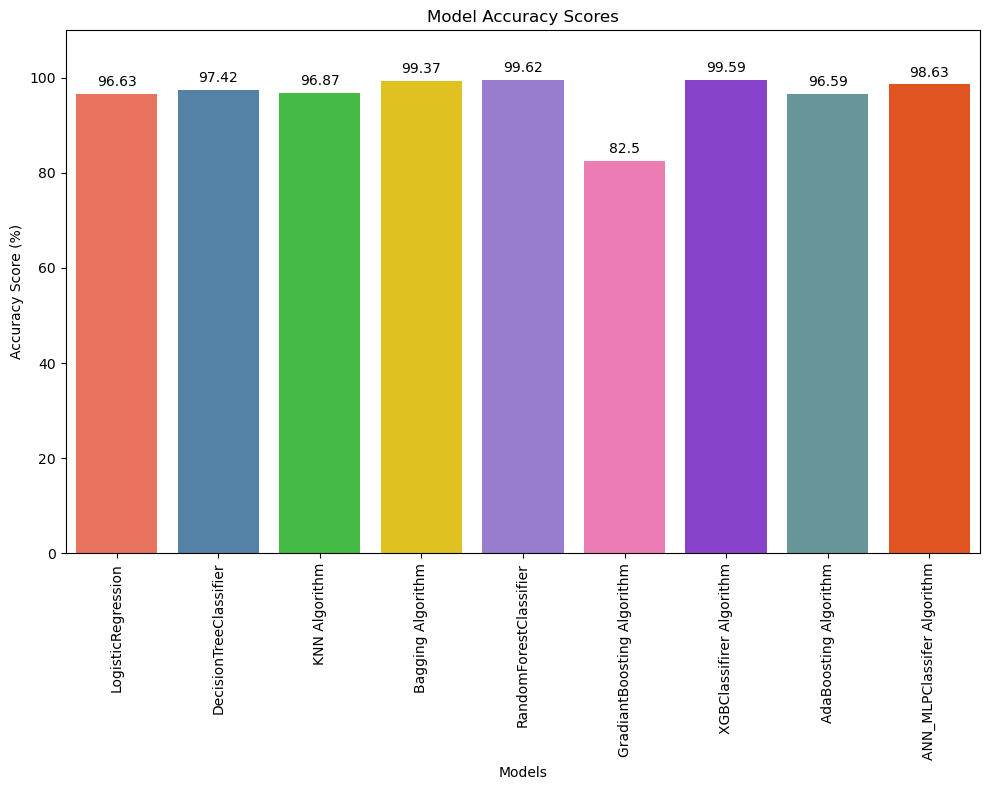

In [394]:
# Plotting the Accuracy Scores
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='Accuracy_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

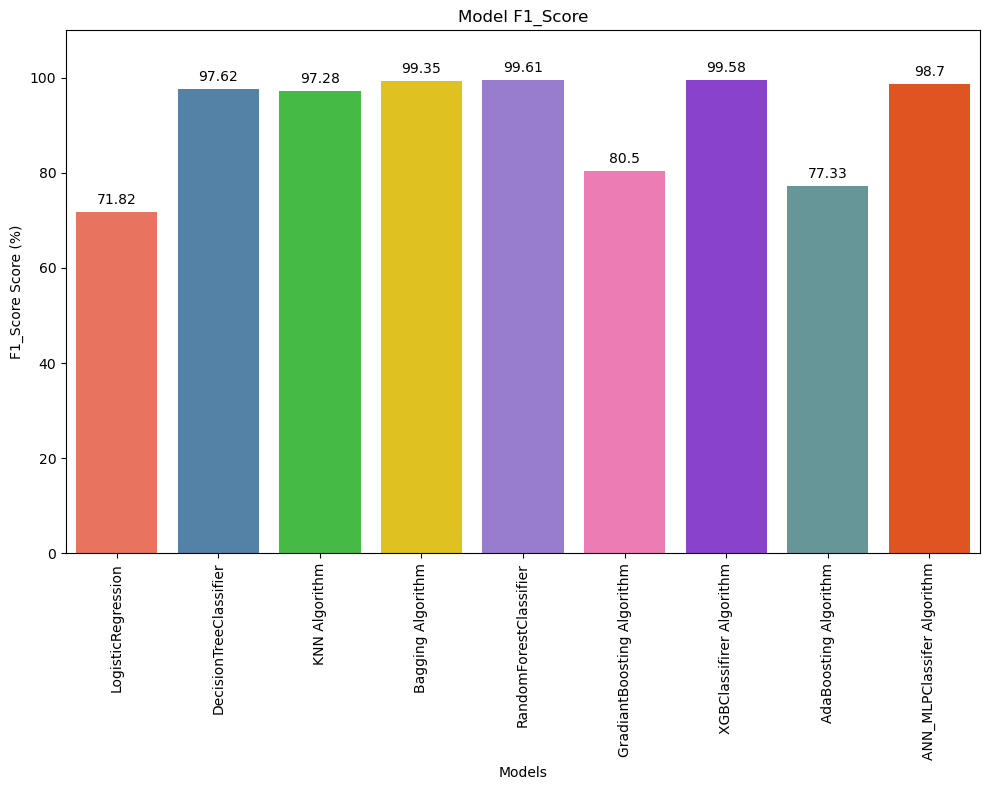

In [395]:
# Plotting the F1_Score
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='F1_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model F1_Score')
plt.xlabel('Models')
plt.ylabel('F1_Score Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

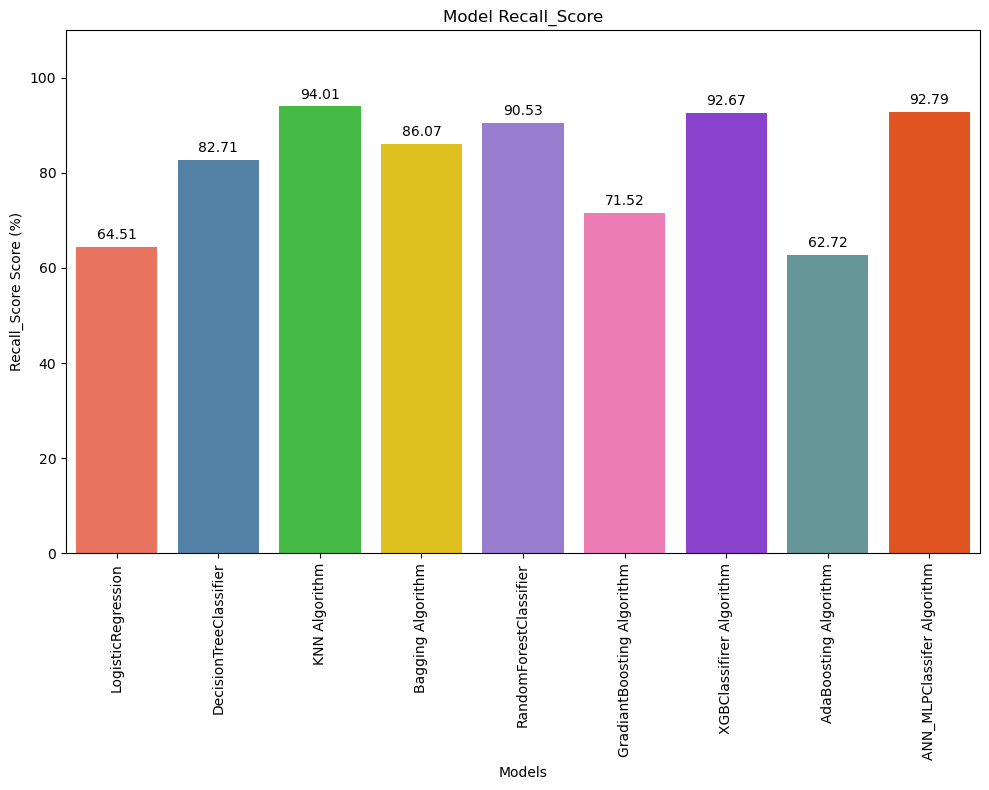

In [396]:
# Plotting the Recall_Score
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='Recall_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Recall_Score')
plt.xlabel('Models')
plt.ylabel('Recall_Score Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

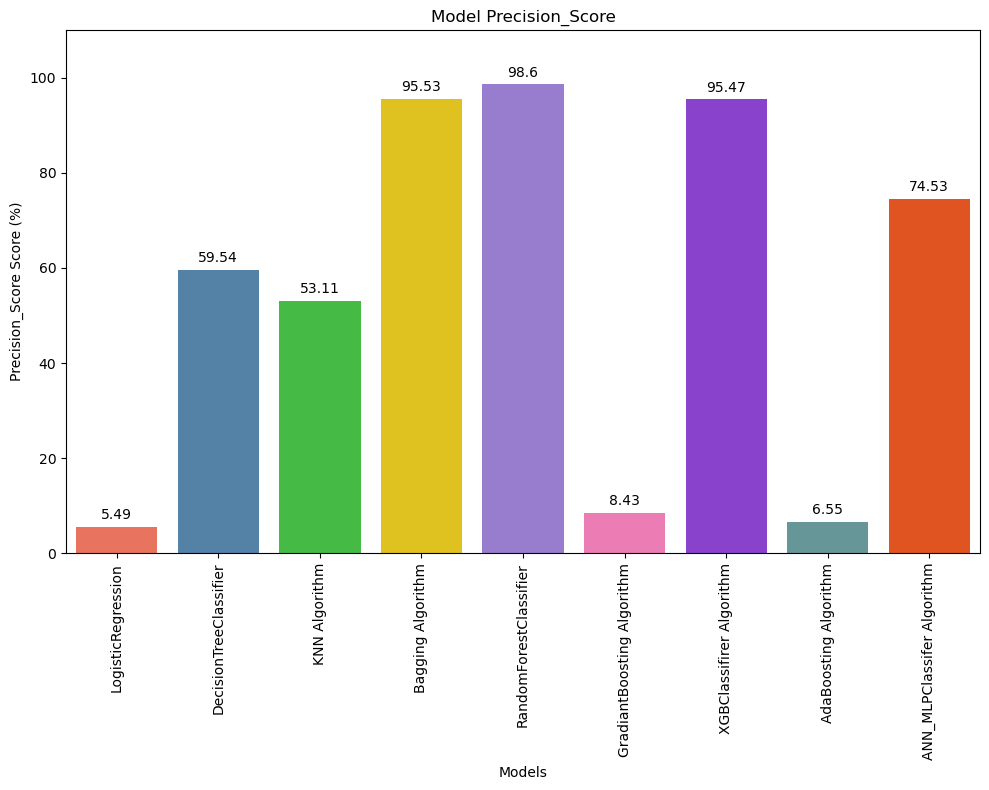

In [397]:
# Plotting the Precision_Score
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='Precision_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Precision_Score')
plt.xlabel('Models')
plt.ylabel('Precision_Score Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

## Cross Validation

In [398]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RM,x1,y1,scoring="accuracy",cv=5)
score

array([0.96468631, 0.96463264, 0.9642033 , 0.96455214, 0.96447068])

# Conclusion:

* **Logistic Regression:** This model performs similarly on both training and testing sets, indicating stability but struggles with distinguishing between positive and negative cases effectively. Its low precision suggests it may misclassify many negative cases as positives.

* **Decision Tree Classifier:** This model achieves high accuracy on the training data, but a slight drop in testing accuracy signals possible overfitting. It identifies positive cases well, though its precision isn’t ideal, meaning it could misclassify some negatives as positives.

* **K-Nearest Neighbors (KNN):** With strong accuracy in both training and testing, KNN effectively detects positive cases but has a lower precision, meaning it’s more suited when higher recall is desired, though some negative cases may be misclassified.

* **Bagging Algorithm:** Bagging shows consistently high accuracy in both sets. Its high precision and recall make it effective for identifying positives, though it could miss some cases, suggesting slight overfitting.

* **Random Forest Classifier:** This model is exceptionally balanced, achieving both high training and testing accuracy with strong precision and recall. Its reliability in identifying both positive and negative cases without overfitting makes it highly dependable.

* **Gradient Boosting Algorithm:** This model maintains consistent training and testing performance but has low precision and recall, indicating it may not be ideal for identifying positive cases.

* **XGBoost Classifier:** With high and balanced accuracy across training and testing, XGBoost demonstrates reliable precision and recall, making it well-suited for consistent positive and negative case identification.

* **AdaBoosting Algorithm:** This model’s moderate accuracy, along with lower precision and recall, suggests it may have limited effectiveness in distinguishing between cases accurately.

* **ANN MLP Classifier:** The MLP model provides stable and high accuracy across training and testing, with balanced precision and recall, making it a dependable option with minimal overfitting.
  
### Final Recommendation:

**The Random Forest Classifier is the top performer, with consistently high accuracy and a strong balance of precision and recall, making it the most reliable for general use. For applications where high recall is essential, KNN offers a good alternative, while ANN MLP Classifier provides balanced performance with low risk of overfitting.**

# Report on Challenges faced

* **Huge amount of data:** this dataset contains 3 tables after merging important tables rows goes to 1.9 lakhs and         columns goes to 105 which are huge because of this we faced more problem while doing work it was take more time for run     any cells.
  
* **Handling Missing Data:** Dealing with missing values across various features is critical to ensure that the dataset remains reliable and consistent, as gaps in data can undermine model accuracy
  
* **Selecting Relevant Features:** With numerous potential predictors, identifying the most informative features can be complex and essential for efficient model training. Removing irrelevant or redundant features without losing valuable information is a key step.
  
* **Addressing Class Imbalance:** In credit scoring, there’s often an imbalance between positive and negative classes. Without addressing this, the model could become biased toward predicting the majority class, leading to reduced accuracy for minority cases.
  
* **Multicollinearity:** Highly correlated features can complicate the model’s interpretability and reduce its effectiveness. Addressing these relationships is important to ensure the model remains stable and interpretable.
  
* **No EDA:** we can't do EDA in this dataset because 80% columns names are hide for security purposes and it's difficult   to get insights from data.because of this we got problem while doing EDA.


## Model Save

In [399]:
import pickle # use for save the model
with open("Credit_Card.pkl","wb") as f: # define the file save
    pickle.dump(RM,f) # call the rm model

In [400]:
with open("Credit_Card.pkl","rb") as f: # load the model file
    file = pickle.load(f) # call the file

In [401]:
x_train.tail() # show last 5 rows

,Principle_components 1,Principle_components 2,Principle_components 3,Principle_components 4,Principle_components 5,Principle_components 6,Principle_components 7,Principle_components 8,Principle_components 9,Principle_components 10,Principle_components 11,Principle_components 12,Principle_components 13,Principle_components 14,Principle_components 15,Principle_components 16,Principle_components 17,Principle_components 18,Principle_components 19,Principle_components 20,Principle_components 21,Principle_components 22,Principle_components 23,Principle_components 24,Principle_components 25,Principle_components 26,Principle_components 27,Principle_components 28,Principle_components 29,Principle_components 30,Principle_components 31,Principle_components 32,Principle_components 33,Principle_components 34,Principle_components 35,Principle_components 36,Principle_components 37
56760,-0.161159,0.654397,-0.875800,-0.922733,-1.212668,0.445773,-0.039466,-2.387515,-0.389212,-0.757759,0.990349,0.220206,0.348583,1.466526,0.449931,-0.337279,1.019546,1.158871,-1.098684,0.260977,-0.873681,-0.687331,0.196737,-1.012111,-0.555699,0.905480,-0.620444,-0.736897,0.583030,0.845663,0.896881,-0.129302,0.144640,-0.158175,0.050492,0.344423,0.620212
93176,-0.138762,-0.839659,-0.409307,1.069120,1.919397,0.704945,0.342921,-0.626500,-0.146286,0.282529,0.637238,-0.811977,-1.285927,-1.181133,-0.389120,-0.183984,0.202141,-0.339638,1.703450,0.663545,-0.213205,-0.476807,-0.040308,-0.965661,-0.513560,-0.099825,-0.577725,-0.259822,-1.019266,1.438413,1.493836,-0.167921,-0.151633,0.071747,0.053011,0.026883,0.169016
30727,-0.032719,0.656972,-0.695041,-0.966854,-0.054446,0.437821,1.039294,0.505228,-0.308019,-0.871172,0.098515,0.940394,0.593501,0.782920,0.116274,0.059028,0.752334,0.108860,-0.377168,0.451305,0.940181,0.512810,1.258121,1.213550,-0.060427,-2.771659,-0.503374,0.997346,0.626497,-0.439746,1.159813,-0.087995,0.019031,0.001010,0.066018,0.320094,0.386276
112859,-0.145537,1.169500,-0.723994,1.096910,-0.045704,-1.712466,0.035314,-2.426909,-0.727723,-1.902869,-0.056661,-1.643870,1.325124,-0.293077,-0.388706,0.252000,-1.515514,-0.893295,-0.903870,-0.853263,0.711326,-0.393310,0.117589,0.024937,0.269405,0.057027,-0.514601,-0.424200,1.293869,-0.238498,-1.094656,0.212263,0.078886,-0.166364,0.121873,0.017910,0.403807
142662,-0.107246,2.918616,-0.383636,0.966547,0.423093,0.388661,0.709229,-2.260532,1.741300,1.692306,-0.025088,-1.169556,0.401819,0.013841,0.135179,1.032170,0.894153,-0.980257,0.768434,1.391022,0.718343,-1.484581,0.090202,0.189897,-0.667728,-0.053356,-0.632361,0.774816,-0.171799,1.008600,1.262256,-0.309746,-0.009663,0.221633,-0.176026,-0.293733,-0.013398


In [402]:
y_train.tail(5) # show last 5 rows

56760     1
93176     0
30727     0
112859    0
142662    0
Name: Bad_label, dtype: object

In [403]:
# predict the data
file.predict([[0.400000	,0.000083,	0.317568,	1.0,	0.044371,	0.666667,	1.0,	0.630854,	0.023033,	0.0,	0.555556,	0.639344,	0.823529,	0.75,	1.000,	0.1,	0.178206,	0.997022,	0.083333,	0.636364,	0.623188,	0.0,	0.575758,	0.575758,	0.017566,	0.392605,	0.575758,	0.944444,	0.000000,	1.000000,	0.0,	0.0,	0.0	,0.0	,1.0,	0.0,	0.0]])

array(['0'], dtype=object)

                                                                ! Thank You !